# Importing Library

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns

from scipy import stats
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from scipy.spatial.distance import pdist

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

from sklearn.metrics import silhouette_samples,silhouette_score,accuracy_score,roc_auc_score,roc_curve,classification_report,\
confusion_matrix,f1_score

from sklearn.metrics.pairwise import paired_euclidean_distances

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

from imblearn.over_sampling import SMOTE


In [3]:
from yellowbrick.cluster import SilhouetteVisualizer

In [4]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['font.size'] = 15
plt.style.use("fivethirtyeight")

# Reading Dataset

In [5]:
df_online_shoppers_intention = pd.read_csv('online_shoppers_intention.csv')
df_online_shoppers_intention.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20        0.00        0.00   Feb                 1   
1         0.00       0.10        0.00        0.00   Feb                 2   
2         0.20       0.20        0.00        0.00   Feb                 4   
3         0.05       0.14        0.00        0.00   Feb                 3   
4         0.02       0.05        0.00        0.00   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

# EDA on Dataset

In [6]:
df_online_shoppers_intention.shape

(12330, 18)

In [7]:
df_online_shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df_online_shoppers_intention.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# There is no null values in the dataset

In [10]:
df_online_shoppers_intention.describe()

Administrative  Administrative_Duration  Informational  \
count        12330.00                 12330.00       12330.00   
mean             2.32                    80.82           0.50   
std              3.32                   176.78           1.27   
min              0.00                     0.00           0.00   
25%              0.00                     0.00           0.00   
50%              1.00                     7.50           0.00   
75%              4.00                    93.26           0.00   
max             27.00                  3398.75          24.00   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                12330.00        12330.00                 12330.00   
mean                    34.47           31.73                  1194.75   
std                    140.75           44.48                  1913.67   
min                      0.00            0.00                     0.00   
25%                      0.00            7.00                   184.14   
50%                      0.00           18.00                   598.94   
75%                      0.00           38.00                  1464.16   
max                   2549.38          705.00                 63973.52   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
count     12330.00   12330.00    12330.00    12330.00          12330.00   
mean          0.02       0.04        5.89        0.06              2.12   
std           0.05       0.05       18.57        0.20              0.91   
min           0.00       0.00        0.00        0.00              1.00   
25%           0.00       0.01        0.00        0.00              2.00   
50%           0.00       0.03        0.00        0.00              2.00   
75%           0.02       0.05        0.00        0.00              3.00   
max           0.20       0.20      361.76        1.00              8.00   

       Browser   Region  TrafficType  
count 12330.00 12330.00     12330.00  
mean      2.36     3.15         4.07  
std       1.72     2.40         4.03  
min       1.00     1.00         1.00  
25%       2.00     1.00         2.00  
50%       2.00     3.00         2.00  
75%       2.00     4.00         4.00  
max      13.00     9.00        20.00

In [11]:
df_online_shoppers_intention.describe(include='object')

Month        VisitorType
count   12330              12330
unique     10                  3
top       May  Returning_Visitor
freq     3364              10551

In [12]:
df_online_shoppers_intention = df_online_shoppers_intention.drop_duplicates(keep='first')
df_online_shoppers_intention.shape

(12205, 18)

In [13]:
df_online_shoppers_intention['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [14]:
# There were 125 duplicate entries present.

# EDA and Visualization on Numerical columns

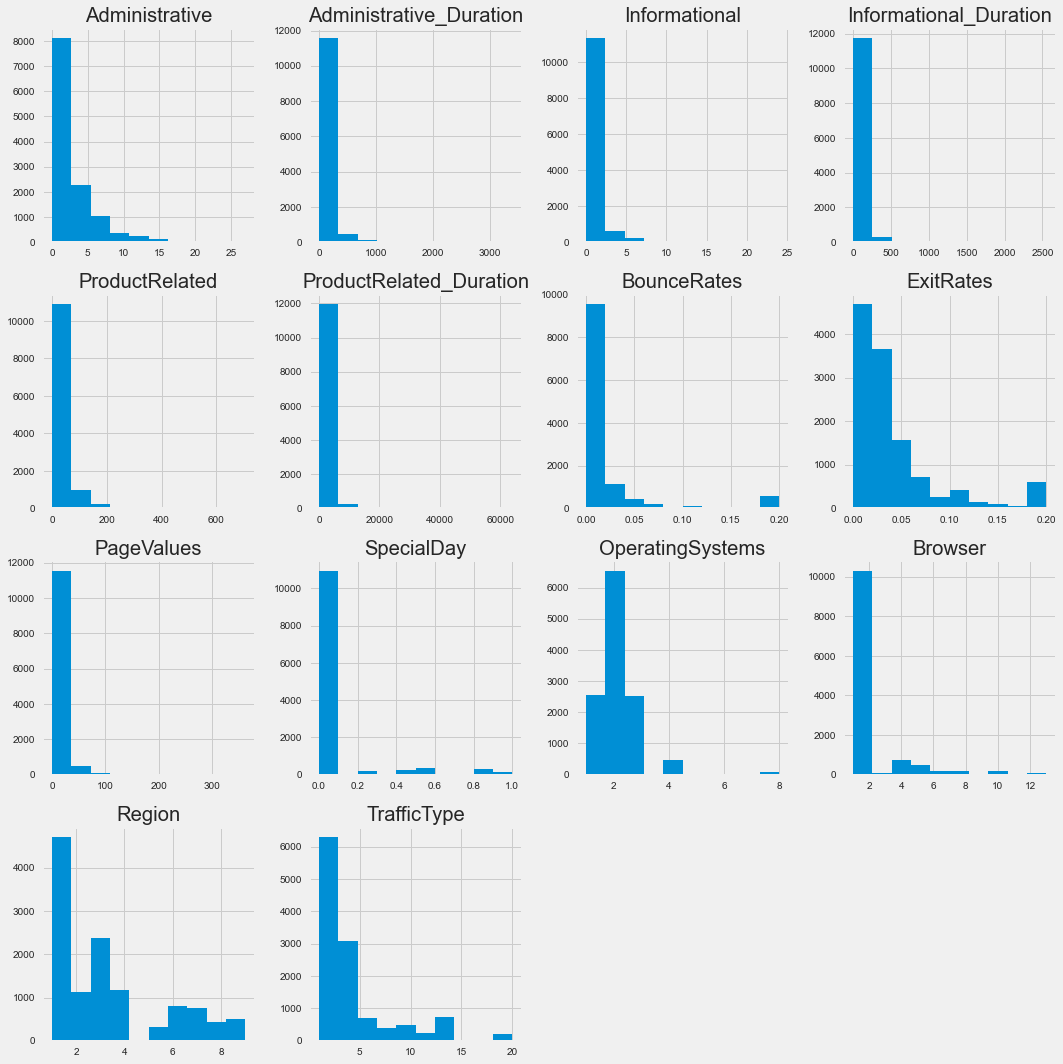

In [15]:
df_online_shoppers_intention.hist(figsize=(15,15))

plt.tight_layout()

plt.show()

In [16]:
df_online_shoppers_intention_num = df_online_shoppers_intention.iloc[:,0:10]
df_online_shoppers_intention_num.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

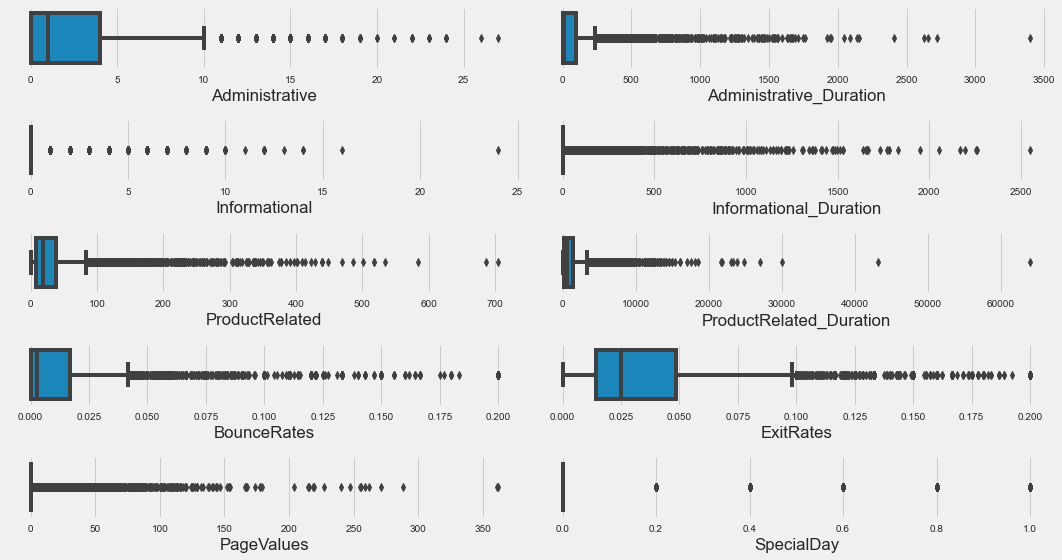

In [17]:
fig,ax = plt.subplots(nrows=5,ncols=2)

for var,subplot in zip(df_online_shoppers_intention_num.columns,ax.flatten()):
    sns.boxplot(df_online_shoppers_intention_num[var],ax=subplot)
plt.tight_layout()
plt.show()

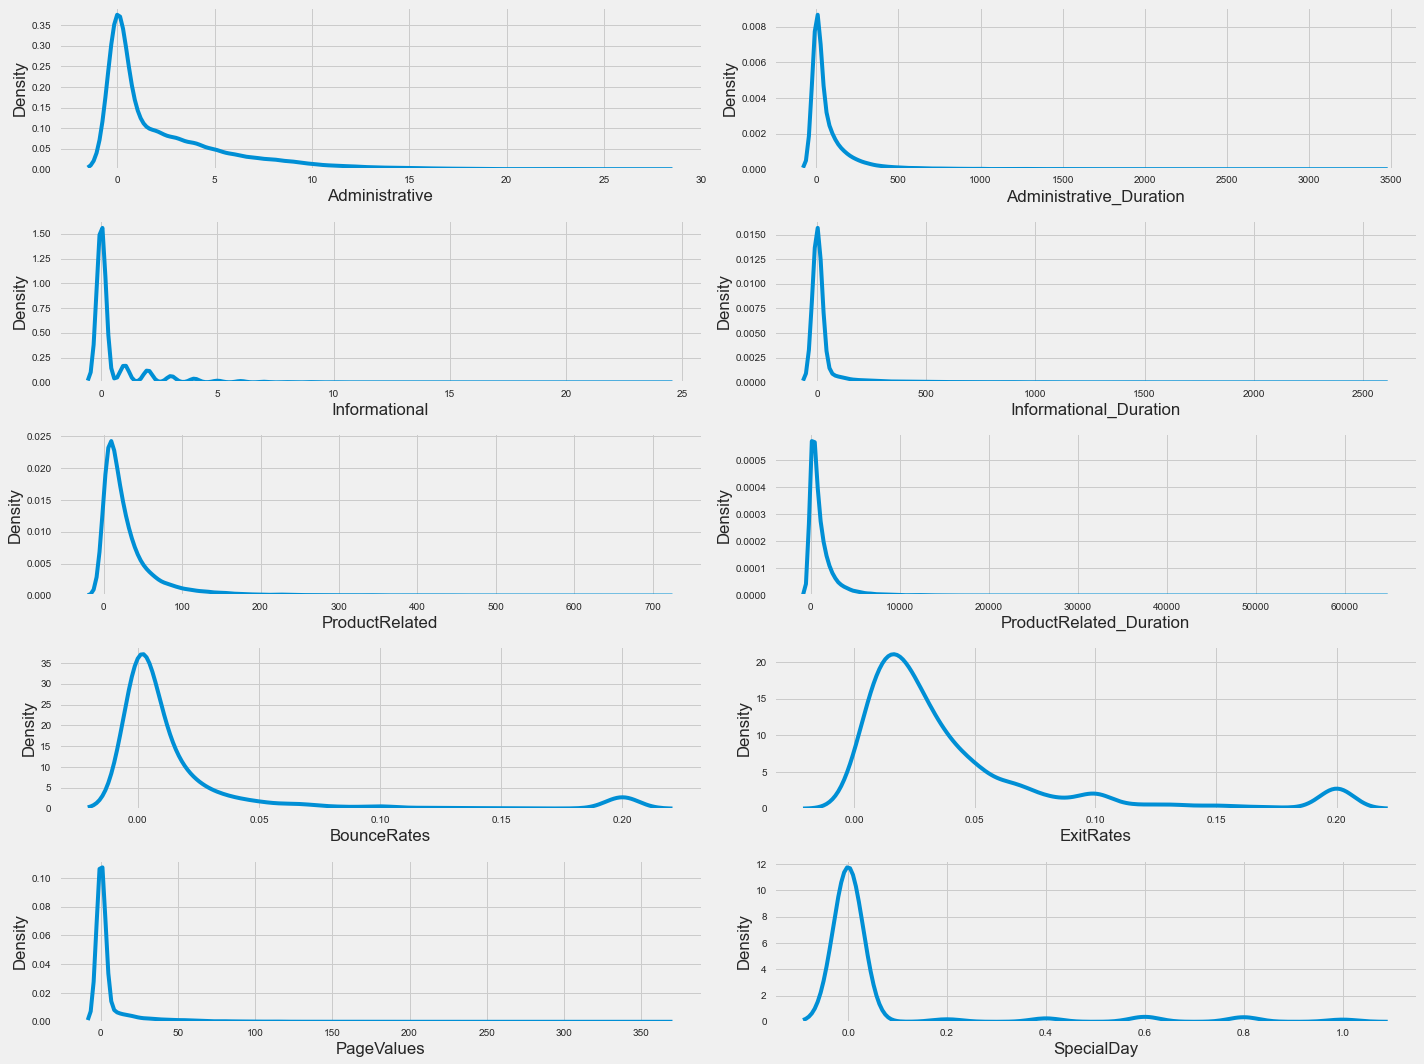

In [18]:
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(20,15))


for var,subplot in zip(df_online_shoppers_intention_num.columns,ax.flatten()):
    sns.distplot(df_online_shoppers_intention_num[var],ax=subplot,hist=False)
plt.tight_layout()
plt.show()

In [19]:
df_online_shoppers_intention_num.skew()

Administrative            1.95
Administrative_Duration   5.59
Informational             4.01
Informational_Duration    7.54
ProductRelated            4.33
ProductRelated_Duration   7.25
BounceRates               3.16
ExitRates                 2.23
PageValues                6.35
SpecialDay                3.29
dtype: float64

In [20]:
# From above diagram we can see that most of the columns have outliers and most of them are right skewness 
# which conclude that most of outliers are on higher side.

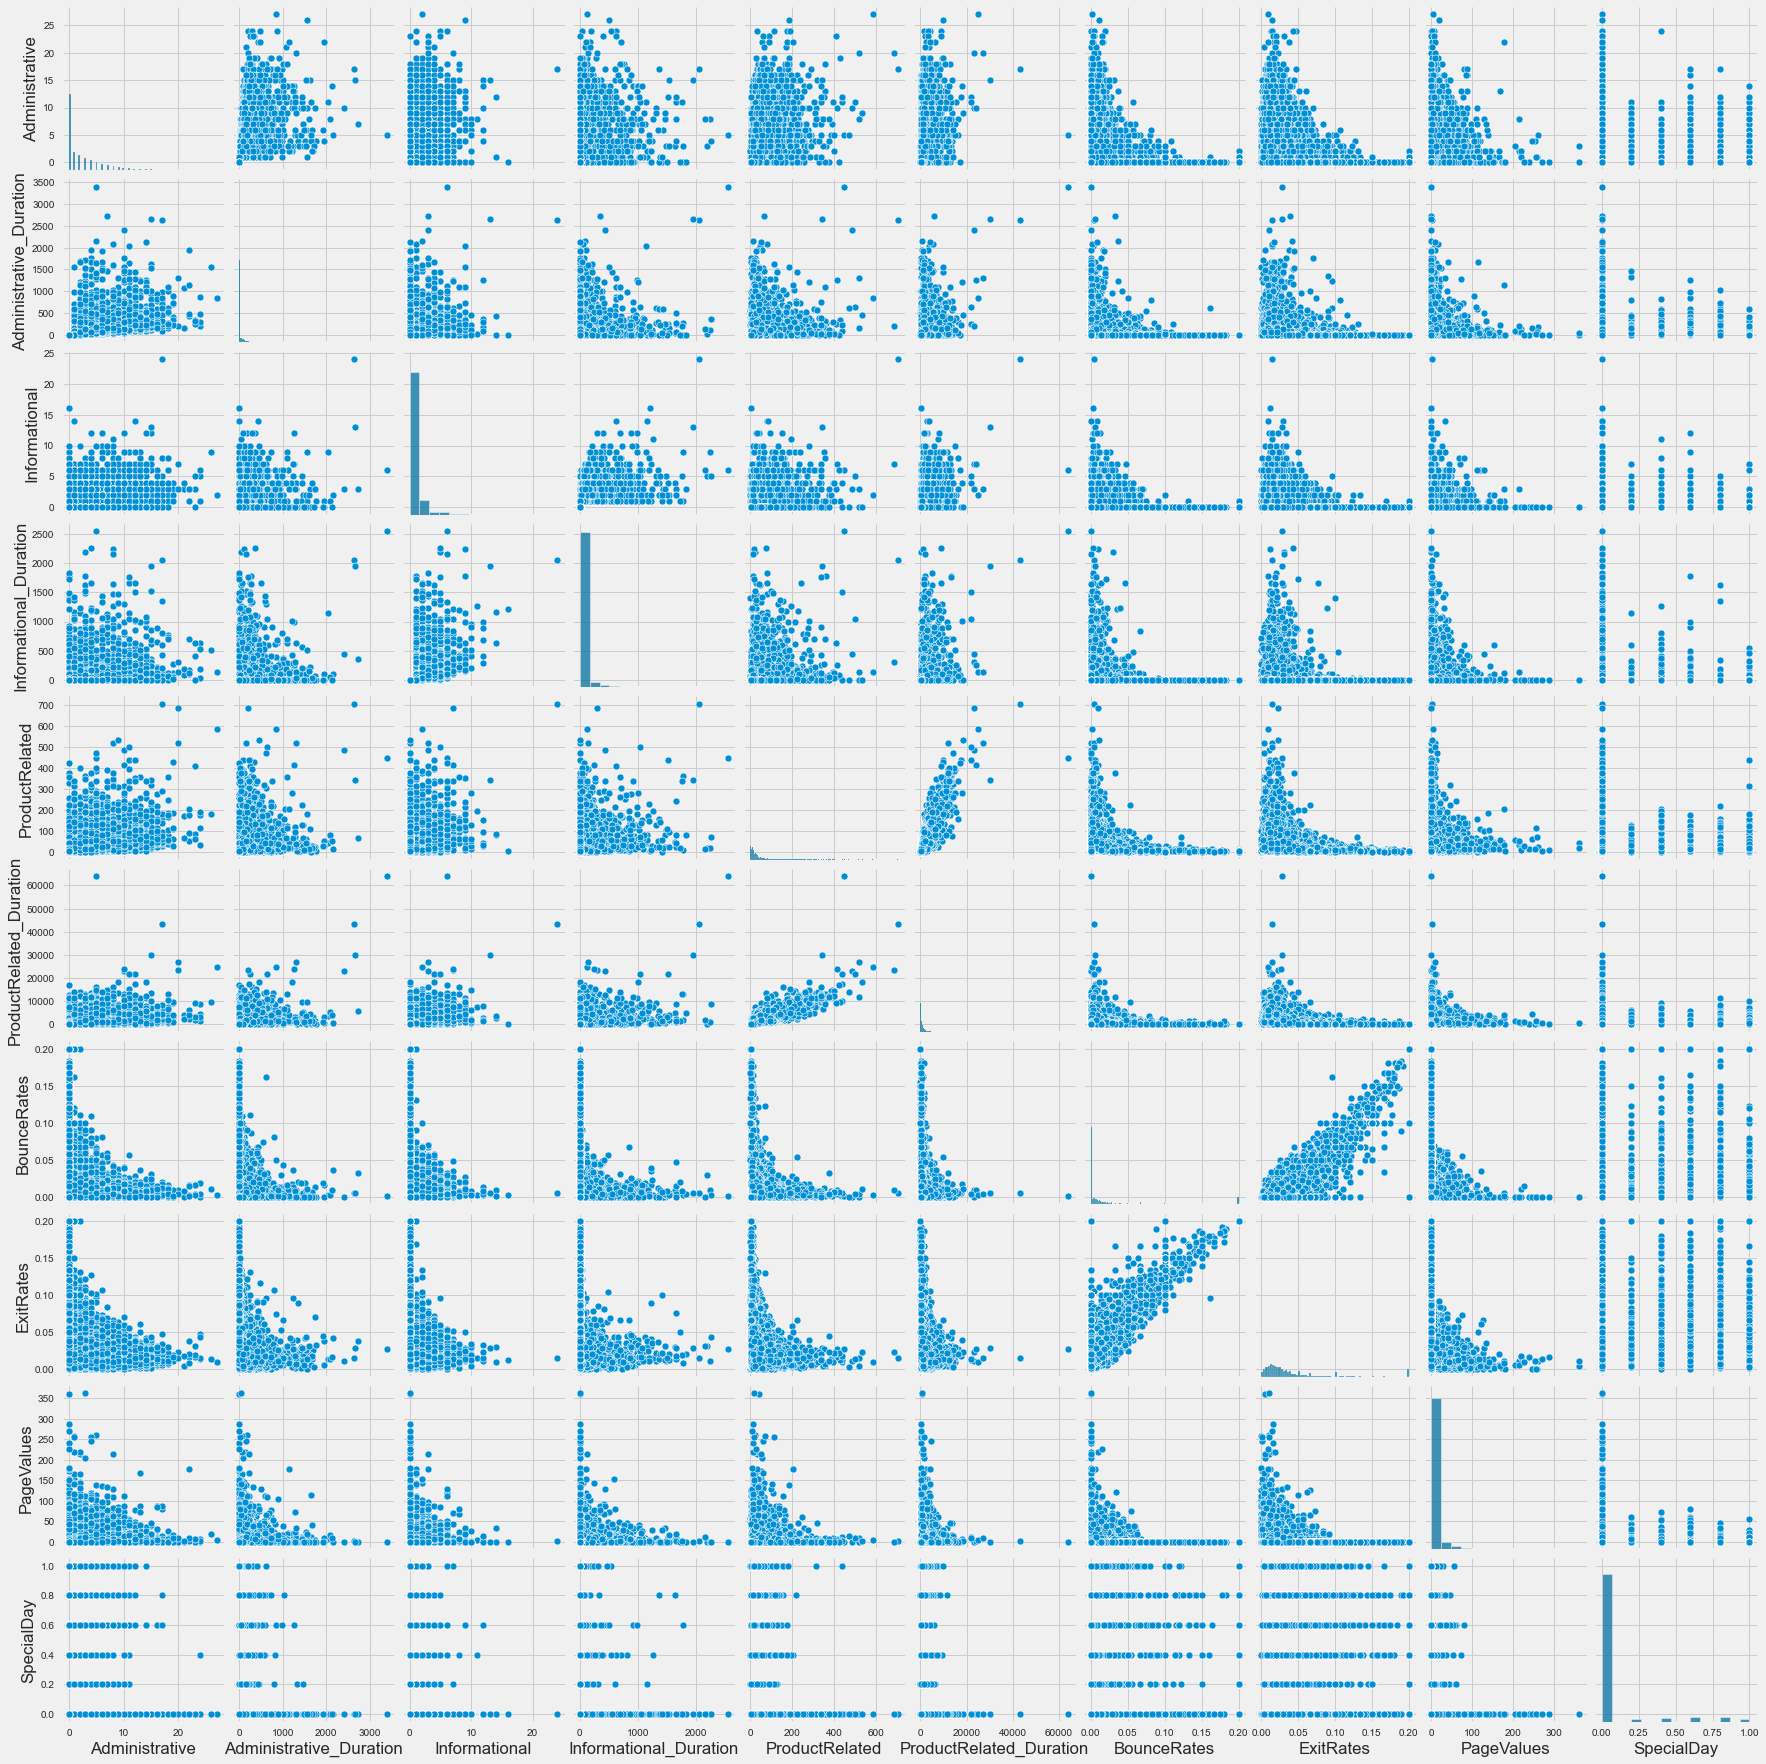

In [21]:
sns.pairplot(df_online_shoppers_intention_num)
plt.show()

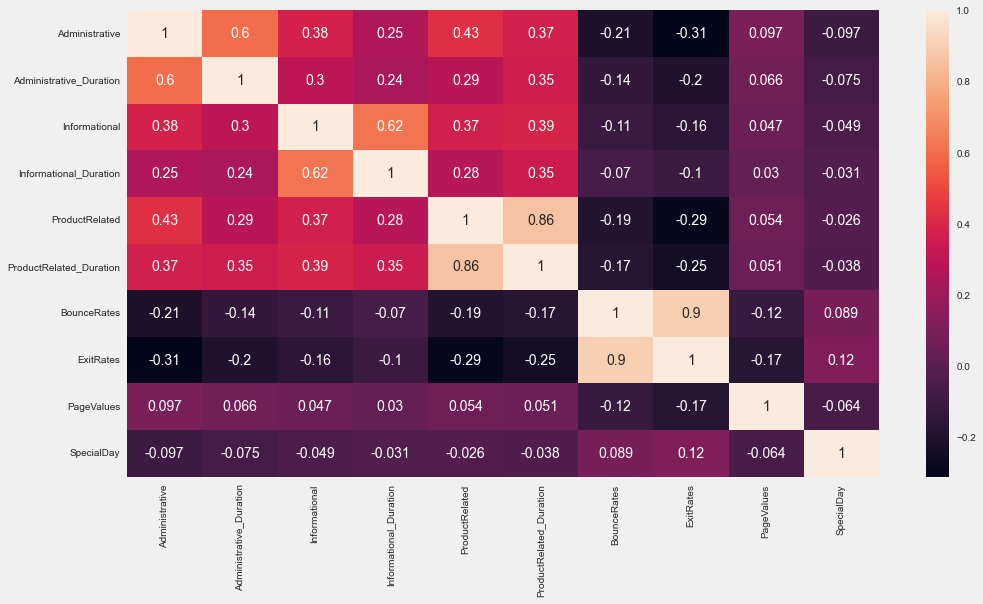

In [22]:
sns.heatmap(df_online_shoppers_intention_num.corr(),annot=True)
plt.show()

In [23]:
# We can see that below have strong positive relation.
# ExitRates and BounceRates 
# ProductRelated_Duration and ProductRelated_Duration

# Below columns have moderately high correlation
# Adminstrative_Duration and Adminstrative
# ProductRelated and Adminstrative
# Informational amd Informational_Duration

# Transformation of numerical

In [24]:
df_online_shoppers_intention_num_norm = np.power(df_online_shoppers_intention_num,1/8)
df_online_shoppers_intention_num_norm.head()

Administrative  Administrative_Duration  Informational  \
0            0.00                     0.00           0.00   
1            0.00                     0.00           0.00   
2            0.00                     0.00           0.00   
3            0.00                     0.00           0.00   
4            0.00                     0.00           0.00   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00            1.00                     0.00   
1                    0.00            1.09                     1.68   
2                    0.00            1.00                     0.00   
3                    0.00            1.09                     1.13   
4                    0.00            1.33                     2.24   

   BounceRates  ExitRates  PageValues  SpecialDay  
0         0.82       0.82        0.00        0.00  
1         0.00       0.75        0.00        0.00  
2         0.82       0.82        0.00        0.00  
3         0.69       0.78        0.00        0.00  
4         0.61       0.69        0.00        0.00

In [25]:
df_online_shoppers_intention_num_norm.skew()

Administrative            -0.09
Administrative_Duration    0.02
Informational              1.41
Informational_Duration     1.66
ProductRelated            -0.59
ProductRelated_Duration   -1.89
BounceRates               -0.01
ExitRates                 -1.70
PageValues                 1.42
SpecialDay                 2.64
dtype: float64

# EDA on Categorical columns

In [26]:
df_online_shoppers_intention_cat  =  df_online_shoppers_intention.iloc[:,10:]
df_online_shoppers_intention_cat.columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [27]:
# plot for categorical column

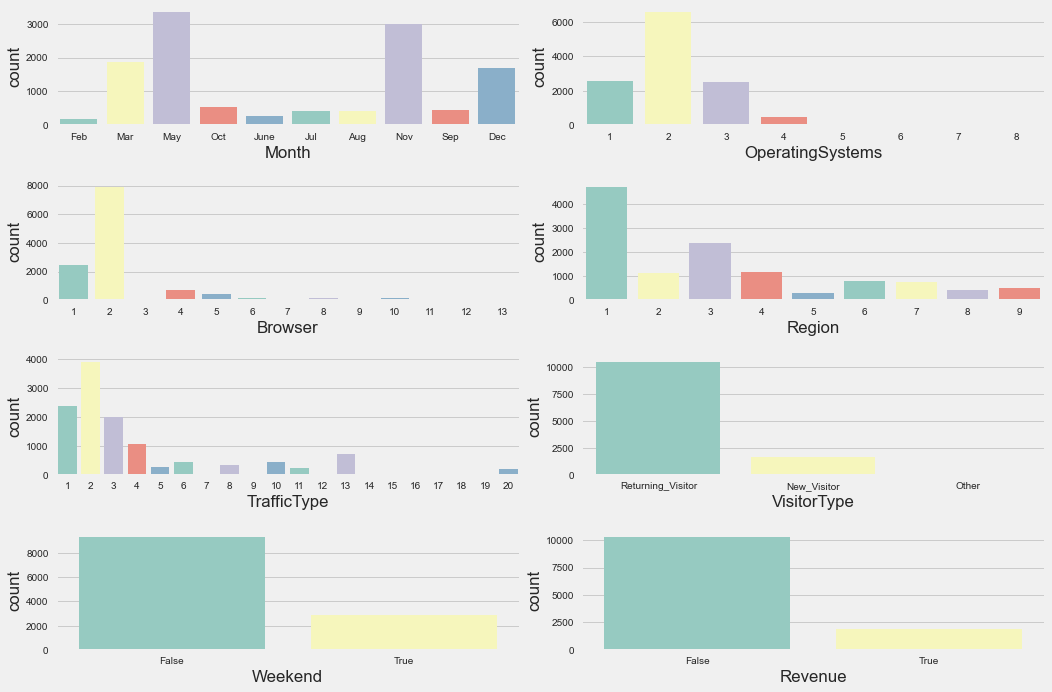

In [28]:
fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(15,10))

for var,subplot in zip(df_online_shoppers_intention_cat.columns,ax.flatten()):
    sns.countplot(df_online_shoppers_intention_cat[var],ax=subplot,palette=sns.color_palette("Set3",5))
plt.tight_layout(pad=1.5,h_pad=1.5,w_pad=0.5)
plt.show()

In [29]:
# We can encode the categorical column

In [30]:
df_online_shoppers_intention_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             12205 non-null  object
 1   OperatingSystems  12205 non-null  int64 
 2   Browser           12205 non-null  int64 
 3   Region            12205 non-null  int64 
 4   TrafficType       12205 non-null  int64 
 5   VisitorType       12205 non-null  object
 6   Weekend           12205 non-null  bool  
 7   Revenue           12205 non-null  bool  
dtypes: bool(2), int64(4), object(2)
memory usage: 949.3+ KB


In [31]:
df_object = df_online_shoppers_intention_cat.select_dtypes(exclude=np.number)
df_object.head()

Month        VisitorType  Weekend  Revenue
0   Feb  Returning_Visitor    False    False
1   Feb  Returning_Visitor    False    False
2   Feb  Returning_Visitor    False    False
3   Feb  Returning_Visitor    False    False
4   Feb  Returning_Visitor     True    False

In [32]:
df_object['Month'].value_counts()

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

In [33]:
df_object['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [34]:
ordinal1 = OrdinalEncoder(categories=[['Returning_Visitor','New_Visitor','Other']])
df_object['VisitorType'] = ordinal1.fit_transform(df_object['VisitorType'].values.reshape(-1,1))
df_object['VisitorType'].value_counts()

0.00    10431
1.00     1693
2.00       81
Name: VisitorType, dtype: int64

In [35]:
# list1 = df_object['Month'].value_counts().index.to_list()

ordinal2 = OrdinalEncoder(categories=[['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec']])

df_object['Month'] = ordinal2.fit_transform(df_object['Month'].values.reshape(-1,1))
df_object['Month'].value_counts()

2.00    3329
8.00    2982
1.00    1860
9.00    1706
7.00     549
6.00     448
5.00     433
4.00     432
3.00     285
0.00     181
Name: Month, dtype: int64

In [36]:
df_object['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [37]:
ordinal3 = OrdinalEncoder(categories=[[False,True]])
df_object['Revenue'] = ordinal3.fit_transform(df_object['Revenue'].values.reshape(-1,1))
df_object['Revenue'].value_counts()

0.00    10297
1.00     1908
Name: Revenue, dtype: int64

In [38]:
df_object['Weekend'].value_counts()

False    9346
True     2859
Name: Weekend, dtype: int64

In [39]:
ordinal4 = OrdinalEncoder(categories=[[False,True]])
df_object['Weekend'] = ordinal4.fit_transform(df_object['Weekend'].values.reshape(-1,1))
df_object['Weekend'].value_counts()

0.00    9346
1.00    2859
Name: Weekend, dtype: int64

In [40]:
df_num = df_online_shoppers_intention_cat.select_dtypes(np.number)
df_online_shoppers_intention_cat_encoded = pd.concat([df_num,df_object],axis=1)
df_online_shoppers_intention_cat_encoded.head()

OperatingSystems  Browser  Region  TrafficType  Month  VisitorType  \
0                 1        1       1            1   0.00         0.00   
1                 2        2       1            2   0.00         0.00   
2                 4        1       9            3   0.00         0.00   
3                 3        2       2            4   0.00         0.00   
4                 3        3       1            4   0.00         0.00   

   Weekend  Revenue  
0     0.00     0.00  
1     0.00     0.00  
2     0.00     0.00  
3     0.00     0.00  
4     1.00     0.00

# Scaling and  normilization the numerical columns

In [41]:
scaled = StandardScaler().fit_transform(df_online_shoppers_intention_num_norm)

df_online_shoppers_intention_num_scaled = pd.DataFrame(data=scaled,columns=df_online_shoppers_intention_num_norm.columns)
df_online_shoppers_intention_num_scaled.head()

Administrative  Administrative_Duration  Informational  \
0           -1.07                    -1.03          -0.52   
1           -1.07                    -1.03          -0.52   
2           -1.07                    -1.03          -0.52   
3           -1.07                    -1.03          -0.52   
4           -1.07                    -1.03          -0.52   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.49           -1.88                    -3.43   
1                   -0.49           -1.48                    -0.72   
2                   -0.49           -1.88                    -3.43   
3                   -0.49           -1.48                    -1.61   
4                   -0.49           -0.43                     0.18   

   BounceRates  ExitRates  PageValues  SpecialDay  
0         1.58       1.96       -0.53       -0.34  
1        -1.07       1.24       -0.53       -0.34  
2         1.58       1.96       -0.53       -0.34  
3         1.16       1.58       -0.53       -0.34  
4         0.91       0.57       -0.53       -0.34

In [42]:
df_online_shoppers_intention_num_scaled.skew()

Administrative            -0.09
Administrative_Duration    0.02
Informational              1.41
Informational_Duration     1.66
ProductRelated            -0.59
ProductRelated_Duration   -1.89
BounceRates               -0.01
ExitRates                 -1.70
PageValues                 1.42
SpecialDay                 2.64
dtype: float64

In [43]:
z = stats.zscore(df_online_shoppers_intention_num_scaled) 

In [44]:
df_online_shoppers_intention_num_scaled.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
dtype: int64

In [45]:
# remove the values with are not having zscore between -3 to 3

In [46]:
df_online_shoppers_intention_num_scaled_norm = df_online_shoppers_intention_num_scaled.copy()

In [47]:
df_online_shoppers_intention_num_scaled_norm = df_online_shoppers_intention_num_scaled_norm[~(z>3).any(axis=1)]
df_online_shoppers_intention_num_scaled_norm = df_online_shoppers_intention_num_scaled_norm[~(z<-3).any(axis=1)]
df_online_shoppers_intention_num_scaled_norm.shape

(11004, 10)

In [48]:
# df_online_shoppers_intention_num_scaled_norm.to_csv('Test2.csv')

In [49]:
df_online_shoppers_intention_num_scaled_norm.shape

(11004, 10)

In [50]:
df_online_shoppers_intention_num_scaled_norm.head()

Administrative  Administrative_Duration  Informational  \
1           -1.07                    -1.03          -0.52   
3           -1.07                    -1.03          -0.52   
4           -1.07                    -1.03          -0.52   
5           -1.07                    -1.03          -0.52   
9           -1.07                    -1.03          -0.52   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                   -0.49           -1.48                    -0.72   
3                   -0.49           -1.48                    -1.61   
4                   -0.49           -0.43                     0.18   
5                   -0.49            0.06                    -0.40   
9                   -0.49           -1.24                     0.25   

   BounceRates  ExitRates  PageValues  SpecialDay  
1        -1.07       1.24       -0.53       -0.34  
3         1.16       1.58       -0.53       -0.34  
4         0.91       0.57       -0.53       -0.34  
5         0.86      -0.06       -0.53       -0.34  
9        -1.07      -0.14       -0.53        2.83

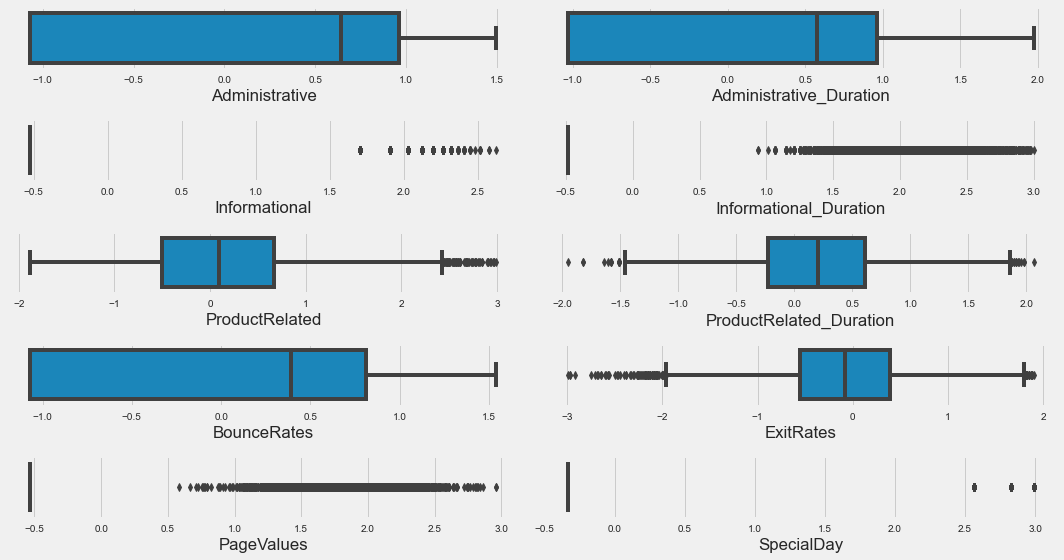

In [51]:
fig,ax = plt.subplots(nrows=5,ncols=2)

for var,subplot in zip(df_online_shoppers_intention_num_scaled_norm.columns,ax.flatten()):
    sns.boxplot(df_online_shoppers_intention_num_scaled_norm[var],ax=subplot)
plt.tight_layout()
plt.show()

In [52]:
df_online_shoppers_intention_num_scaled_norm.skew()

Administrative            -0.22
Administrative_Duration   -0.11
Informational              1.33
Informational_Duration     1.56
ProductRelated             0.27
ProductRelated_Duration   -0.08
BounceRates                0.03
ExitRates                 -0.08
PageValues                 1.32
SpecialDay                 3.54
dtype: float64

In [53]:
df_online_shoppers_intention_num_scaled_norm.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
dtype: int64

# Building the base model

### Kmeans without PCA

In [54]:
wcss = []

for k in range(2,21):
    kmeans = KMeans(n_clusters=k,random_state=10)
    kmeans.fit_predict(df_online_shoppers_intention_num_scaled_norm)
    wcss.append(kmeans.inertia_)
wcss    

[65074.05937464596,
 47153.54845589595,
 41370.72480190039,
 36430.426712804816,
 32360.317975631413,
 29149.74983678714,
 26106.007625188235,
 24034.07593952178,
 22024.550203969895,
 20776.96877198395,
 19658.166070001942,
 18408.16123471122,
 17320.72106316695,
 16729.7199795117,
 15526.958421845084,
 14954.759290673715,
 14098.930076459385,
 13638.323212393596,
 13393.665377383519]

### plotting elbow plot

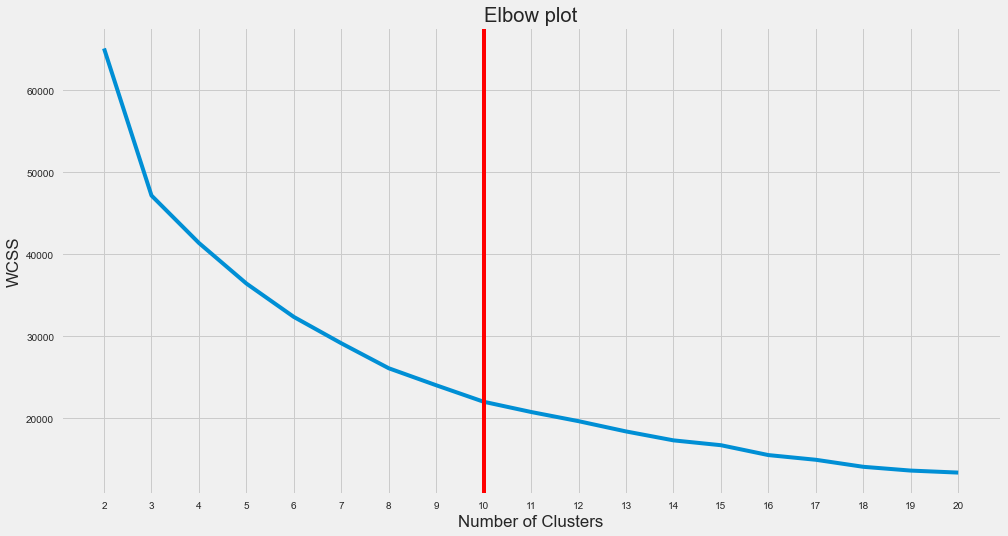

In [55]:
plt.plot(range(2,21),wcss)

plt.title('Elbow plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2,21))
plt.axvline(x=10,color='red')
plt.show()

### Silhoutte Score

In [56]:
scores = [] 

for k in range(2,21):
    kmeans = KMeans(n_clusters=k,random_state=10)
    kmeans.fit(df_online_shoppers_intention_num_scaled_norm)
    score = silhouette_score(df_online_shoppers_intention_num_scaled_norm,kmeans.labels_,random_state=10)
    scores.append(score)
scores    

[0.28546433784610714,
 0.33310898820993406,
 0.32691849998477174,
 0.3234538374512102,
 0.3434812558819591,
 0.3453955616681231,
 0.35621570343404324,
 0.37508320059513744,
 0.3875597807027216,
 0.3688385516993142,
 0.3716673163942266,
 0.37636157400092096,
 0.3761772771611349,
 0.3762502984275695,
 0.3704454342803084,
 0.3668071646495279,
 0.36019180457736283,
 0.3618564436400918,
 0.3511000186169119]

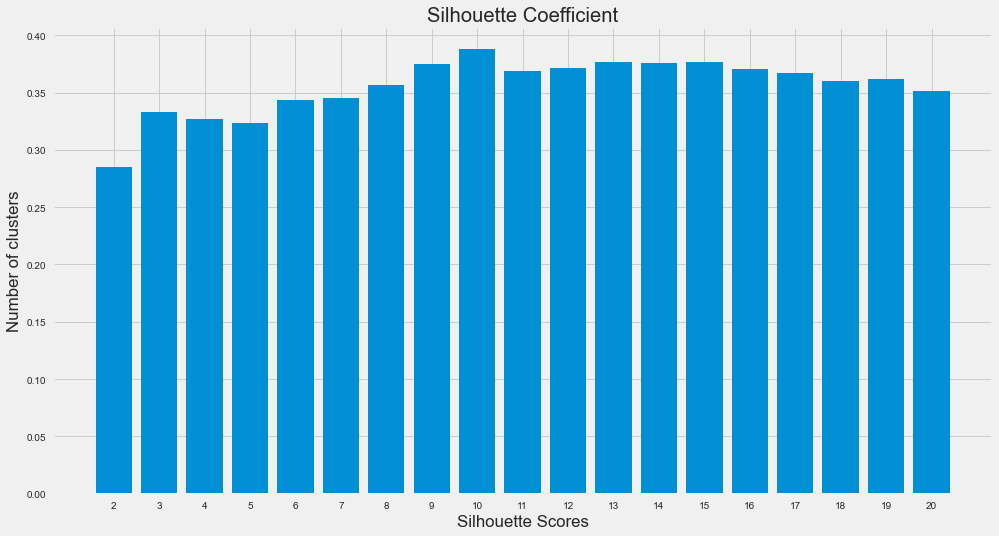

In [57]:

plt.bar(range(2,21),scores)

plt.title('Silhouette Coefficient')
plt.xlabel('Silhouette Scores')
plt.ylabel('Number of clusters')

plt.xticks(range(2,21))
plt.grid(True)
plt.show()

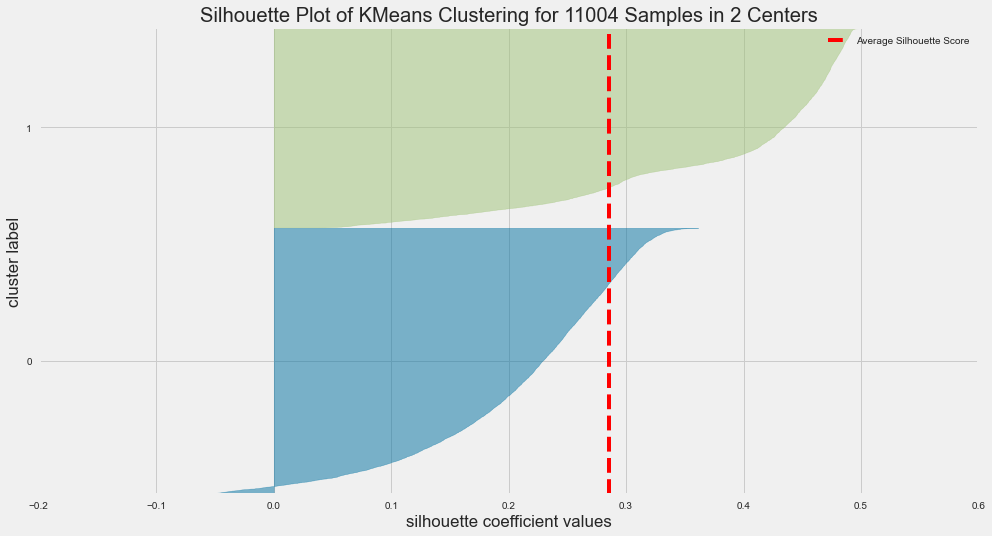

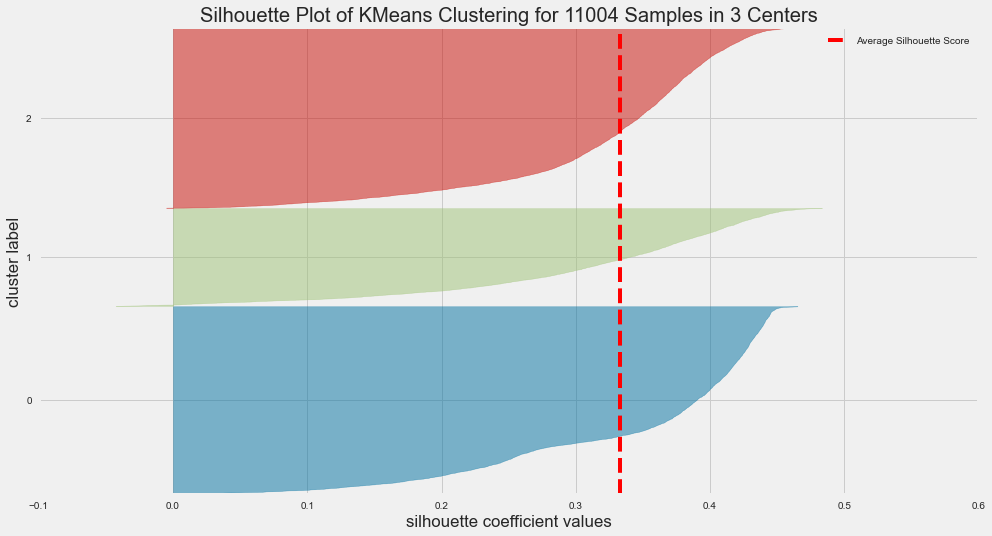

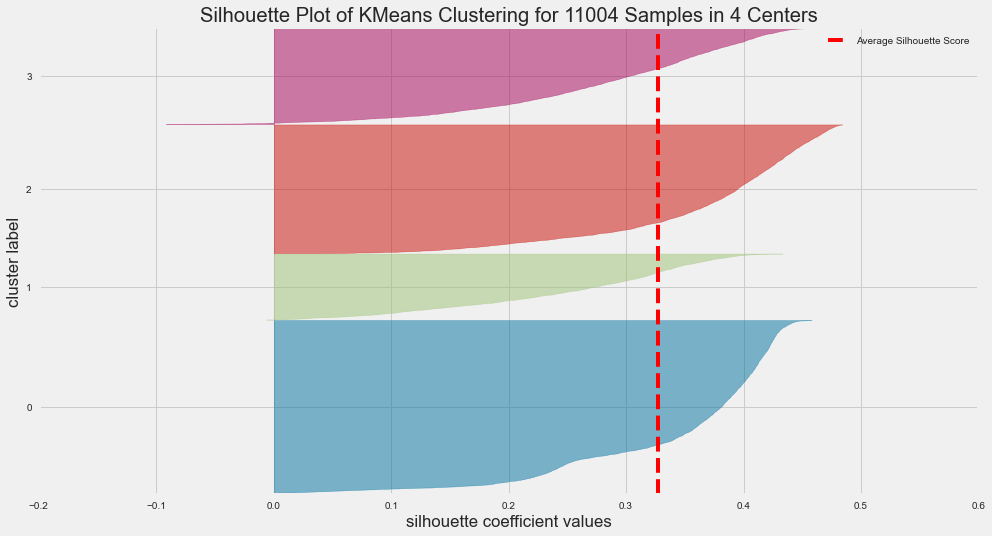

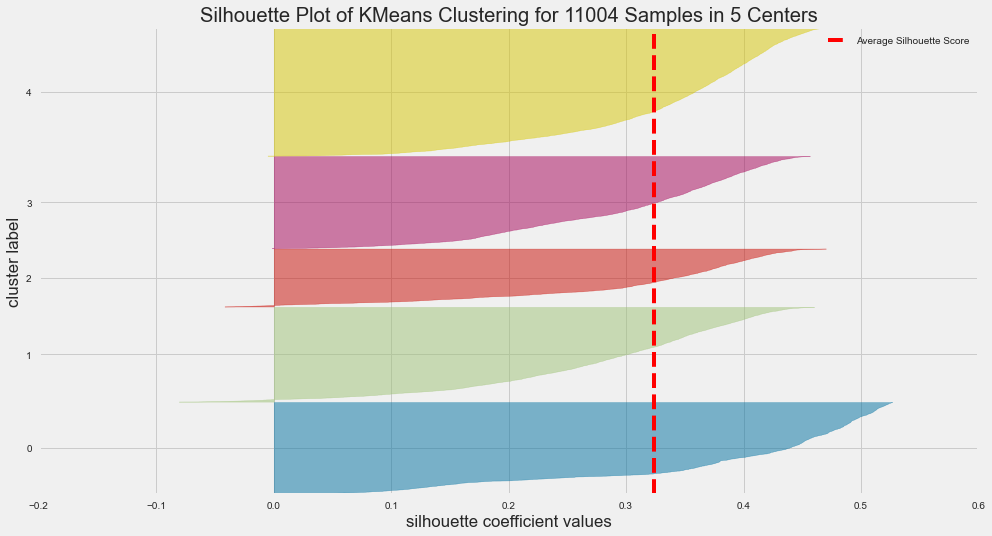

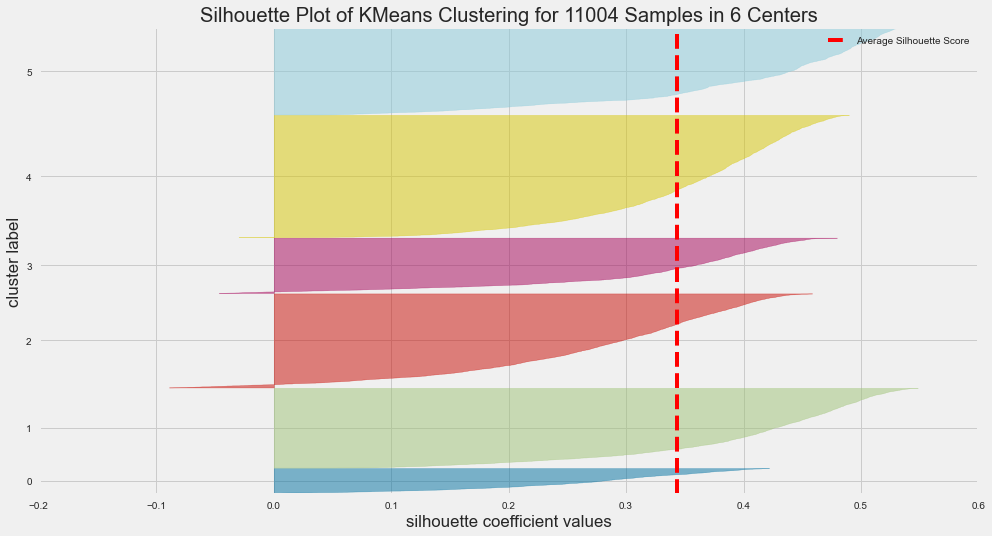

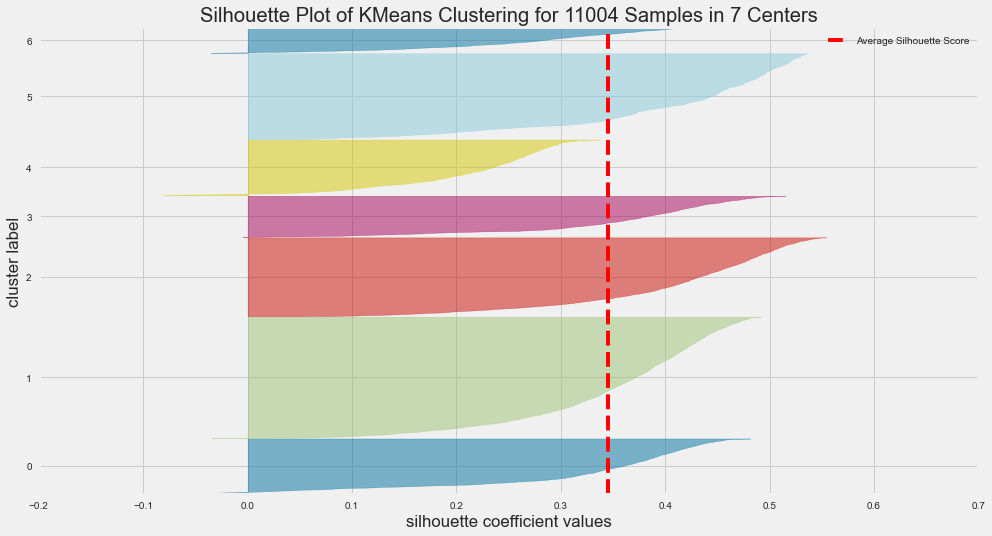

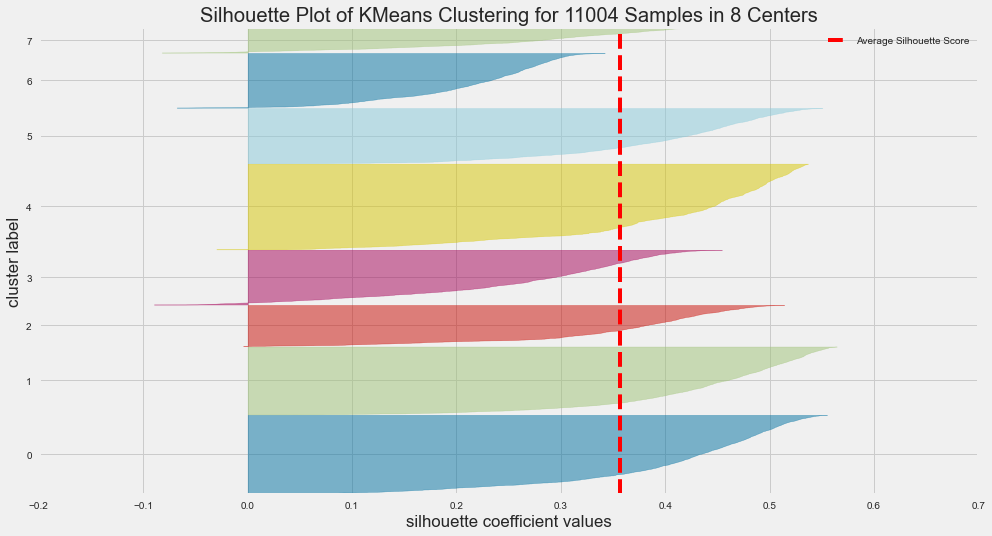

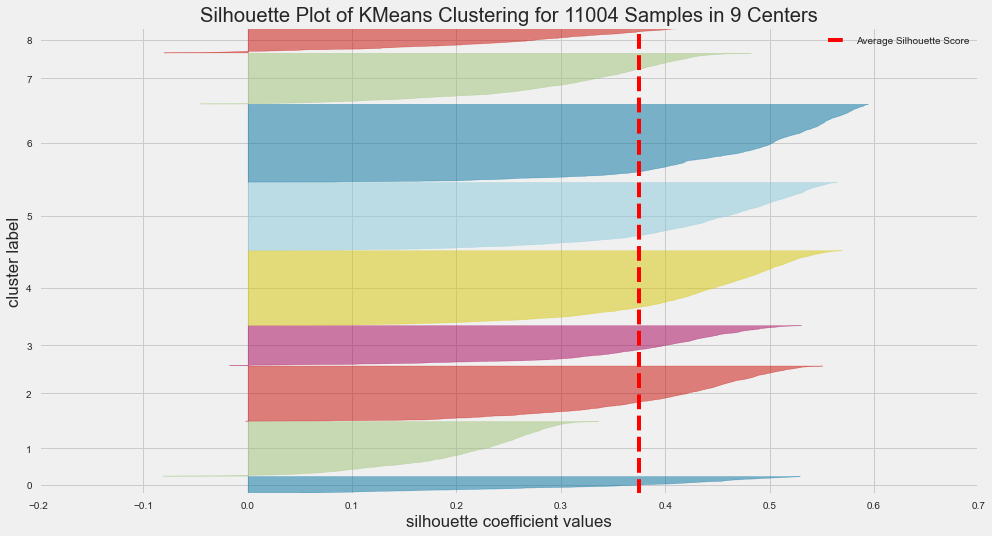

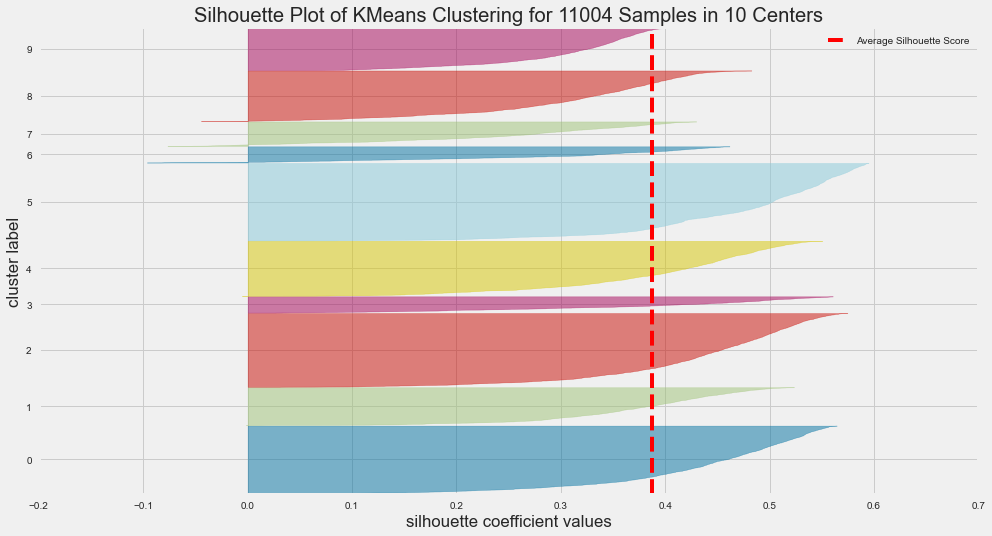

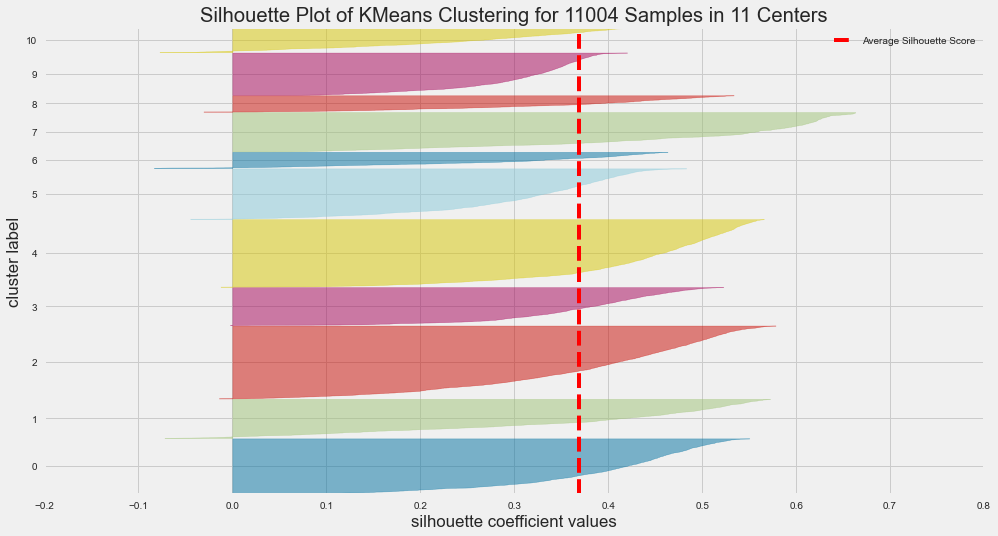

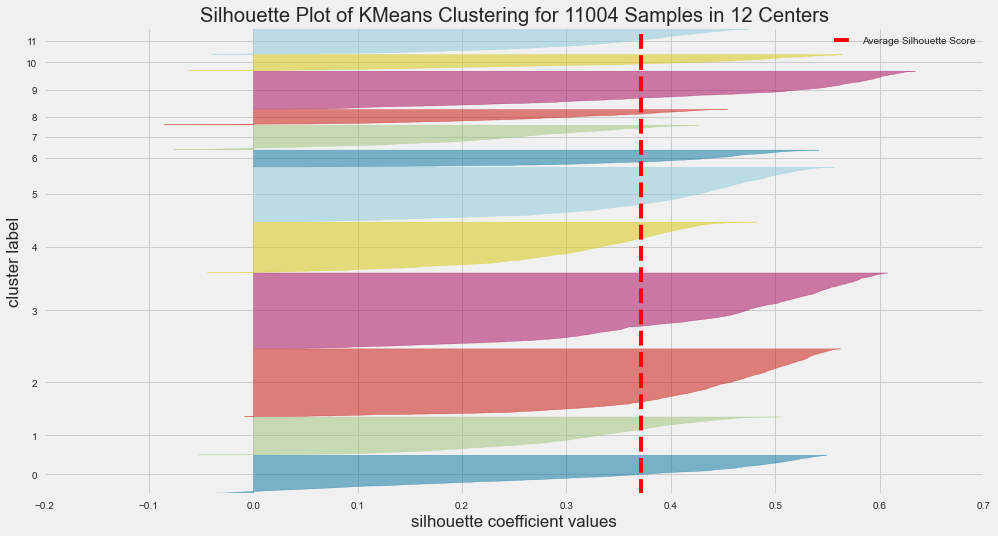

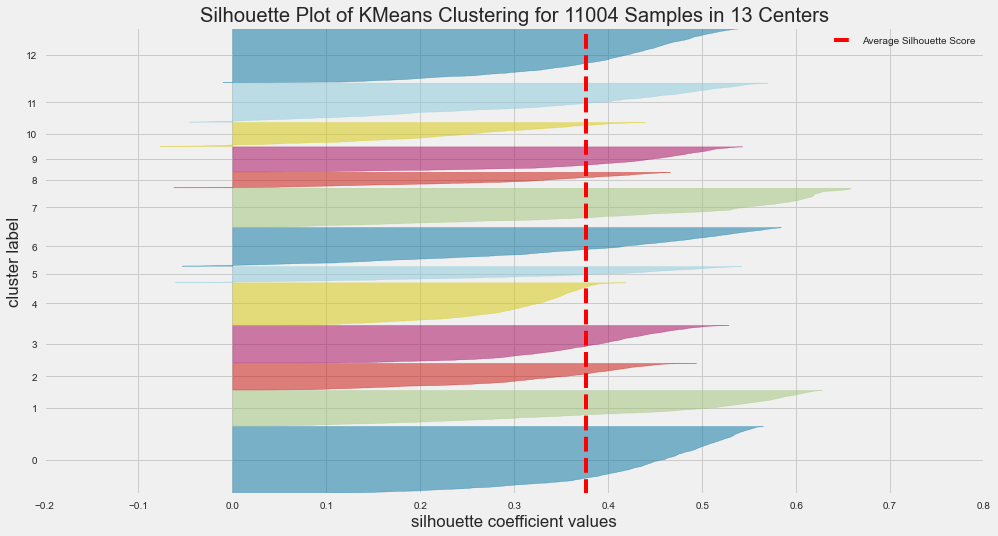

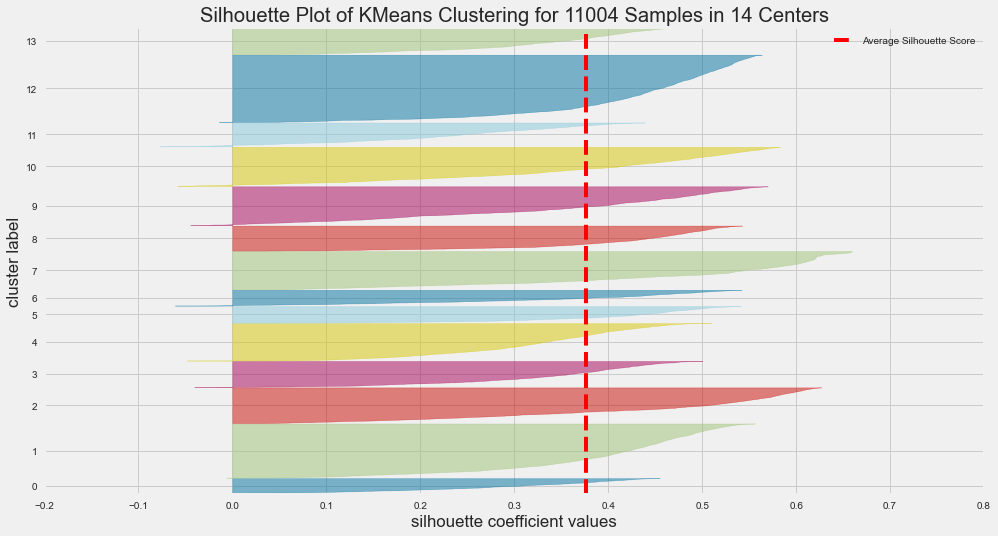

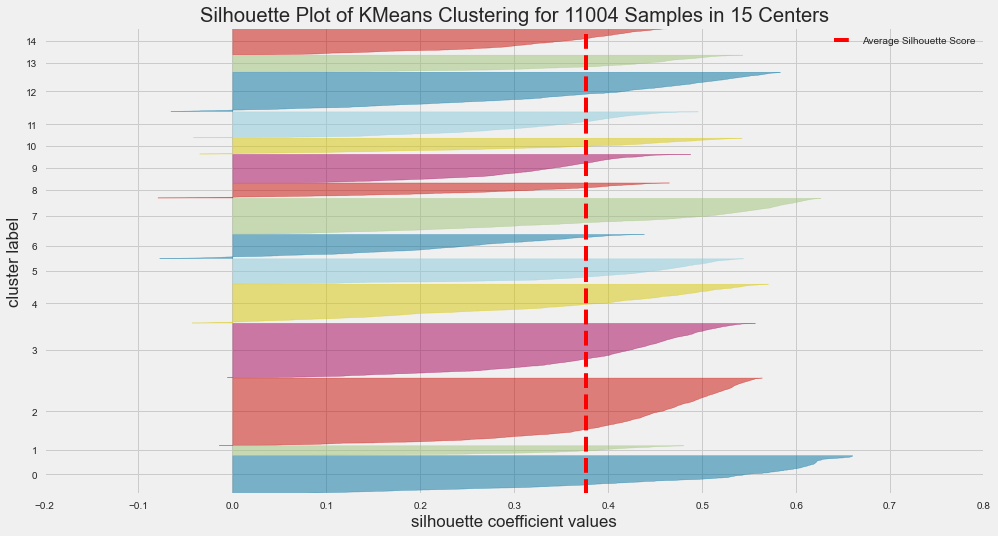

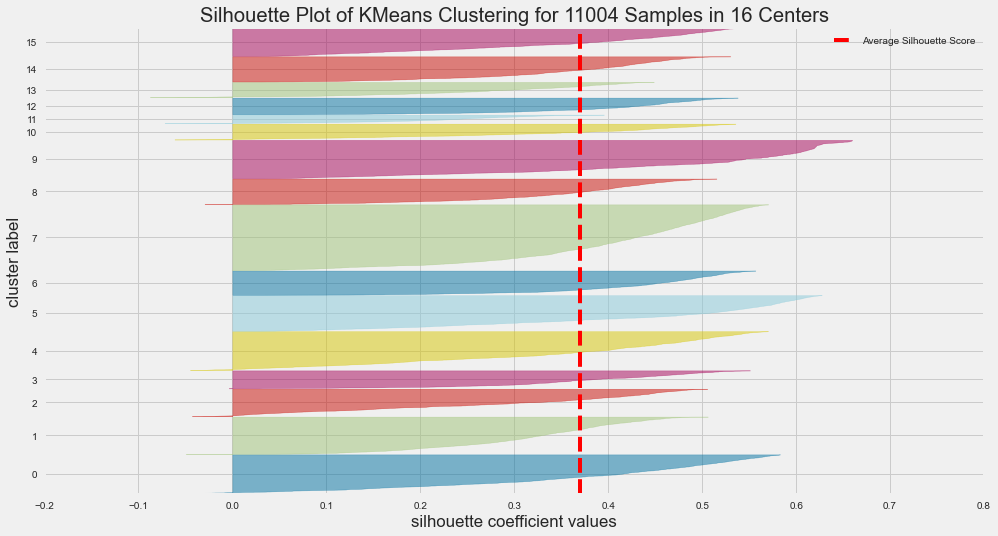

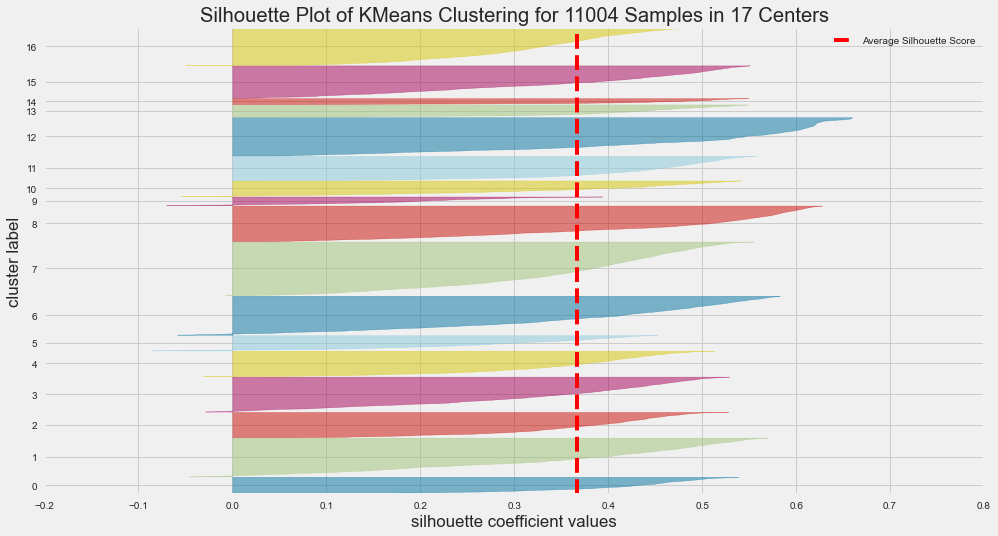

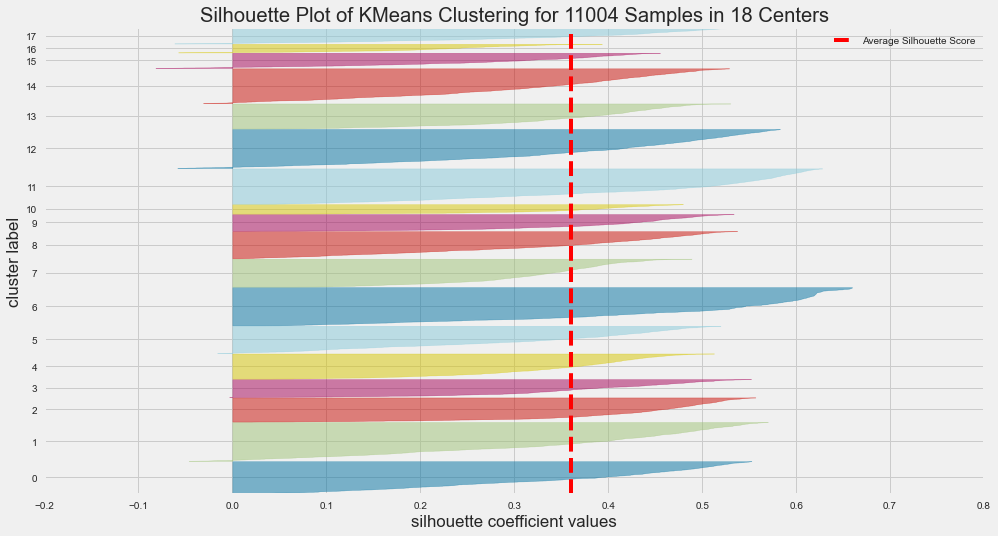

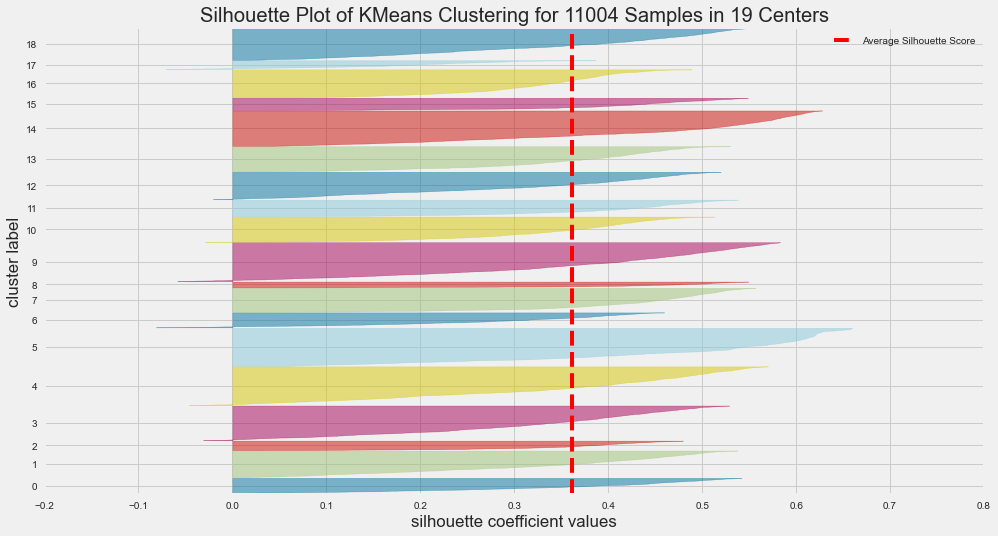

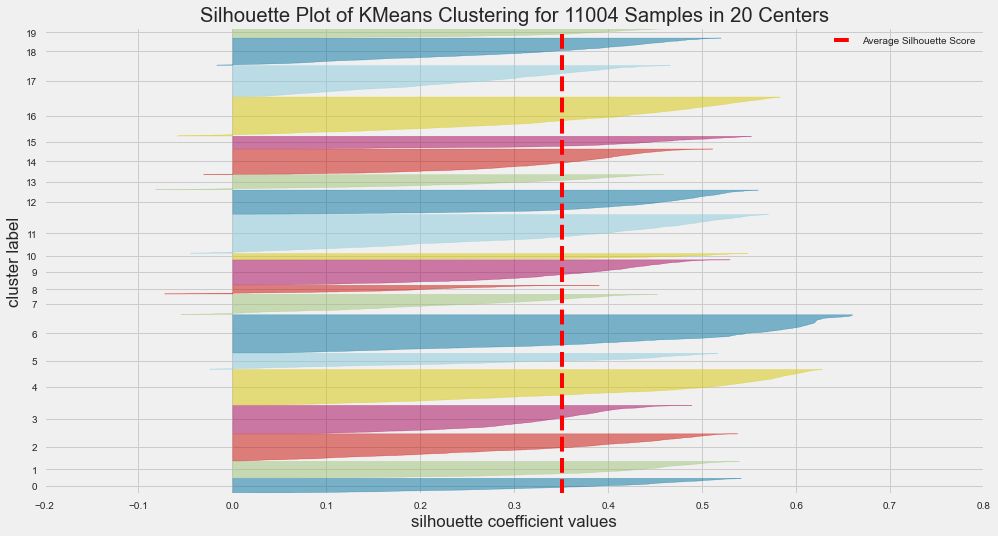

In [58]:
for k in range(2,21):
    kmeans = KMeans(n_clusters=k,random_state=10)
    kmeans.fit(df_online_shoppers_intention_num_scaled_norm)
    model = KMeans(n_clusters=k,random_state=10)
    visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(df_online_shoppers_intention_num_scaled_norm)
    visualizer.show()
    

In [59]:
# According to Silhouette coefficient and Elbow plot we can take k=10

### KMeans with optimal value of k value i.e k = 10

In [60]:
kmeans_optimal_k = KMeans(n_clusters=10,random_state=10)
kmeans_optimal_k.fit(df_online_shoppers_intention_num_scaled_norm)

KMeans(n_clusters=10, random_state=10)

In [61]:
result_optimal = kmeans_optimal_k.labels_
result = pd.DataFrame(result_optimal,columns=['cluster'])
obs = result.groupby('cluster').size()
obs

cluster
0    1615
1     904
2    1757
3     389
4    1312
5    1845
6     386
7     583
8    1204
9    1009
dtype: int64

In [62]:
len(kmeans_optimal_k.labels_)

11004

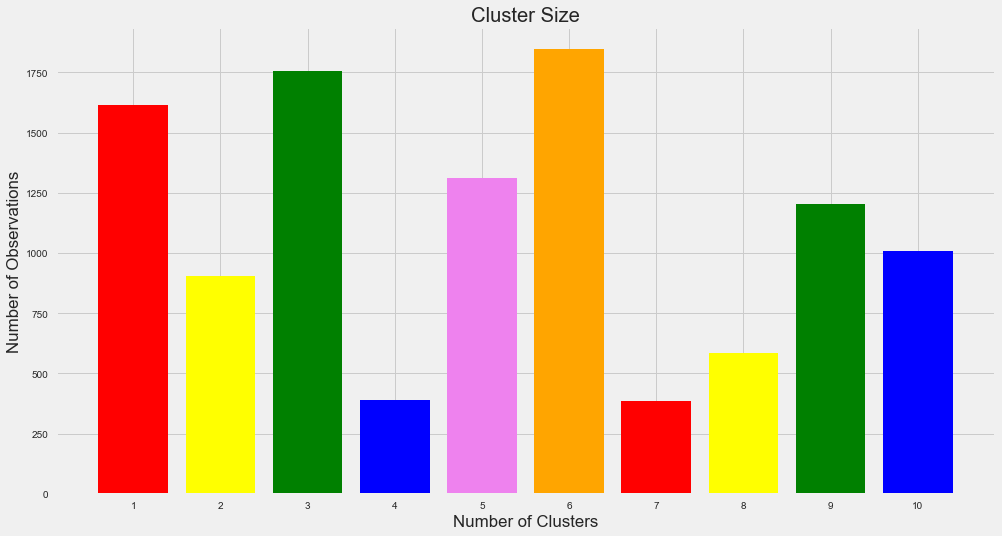

In [63]:
# write your code here
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,8))

plt.bar(range(1,11),obs,color=['red','yellow','green','blue','violet','orange'])

plt.title('Cluster Size')

plt.xlabel('Number of Clusters')
plt.ylabel('Number of Observations')

plt.xticks(range(1,11))
plt.show()

In [64]:
# We can see that cluster 6 have highest number of observation i.e. 1845
# Cluster 4 have least observation i.e. 389

# Adding Cluster to original data frame

In [65]:
df_online_shoppers_intention_cluster = pd.merge(df_online_shoppers_intention_num,df_online_shoppers_intention_cat_encoded,left_index=True,right_index=True)
df_online_shoppers_intention_cluster.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0         0.20       0.20        0.00        0.00                 1        1   
1         0.00       0.10        0.00        0.00                 2        2   
2         0.20       0.20        0.00        0.00                 4        1   
3         0.05       0.14        0.00        0.00                 3        2   
4         0.02       0.05        0.00        0.00                 3        3   

   Region  TrafficType  Month  VisitorType  Weekend  Revenue  
0       1            1   0.00         0.00     0.00     0.00  
1       1            2   0.00         0.00     0.00     0.00  
2       9            3   0.00         0.00     0.00     0.00  
3       2            4   0.00         0.00     0.00     0.00  
4       1            4   0.00         0.00     1.00     0.00

In [66]:
df_online_shoppers_intention_cluster.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
Month                      0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [67]:
df_online_shoppers_intention_cluster.shape

(12205, 18)

In [68]:
list1 = df_online_shoppers_intention_num_scaled_norm.index.to_list()

In [69]:
df_online_shoppers_intention_cluster2 = df_online_shoppers_intention.iloc[list1]

In [70]:
len(kmeans_optimal_k.labels_)

11004

In [71]:
df_online_shoppers_intention_cluster2['Clusters'] = kmeans.labels_
df_online_shoppers_intention_cluster2.reset_index(drop=True).head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               2                    64.00   
1                    0.00               2                     2.67   
2                    0.00              10                   627.50   
3                    0.00              19                   154.22   
4                    0.00               3                   738.00   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.00       0.10        0.00        0.00   Feb                 2   
1         0.05       0.14        0.00        0.00   Feb                 3   
2         0.02       0.05        0.00        0.00   Feb                 3   
3         0.02       0.02        0.00        0.00   Feb                 2   
4         0.00       0.02        0.00        0.40   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  Clusters  
0        2       1            2  Returning_Visitor    False    False         6  
1        2       2            4  Returning_Visitor    False    False         4  
2        3       1            4  Returning_Visitor     True    False         4  
3        2       1            3  Returning_Visitor    False    False        11  
4        4       1            2  Returning_Visitor    False    False        10

In [72]:
df_online_shoppers_intention_cluster2.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Clusters                   0
dtype: int64

In [73]:
# Final dataframe 11004 rows and 19 columns

In [74]:
#list_columns = df_online_shoppers_intention_cluster.columns.to_list()

In [75]:
"""fig,ax = plt.subplots(nrows=19,ncols=19,figsize=(50,50))

for var,subplot in zip(range(0,len(df_online_shoppers_intention_cluster.columns)),ax.flatten()):
    for i in range(0,len(df_online_shoppers_intention_cluster.columns)):
         sns.scatterplot(x=df_online_shoppers_intention_cluster.iloc[:,var],
                    y=df_online_shoppers_intention_cluster.iloc[:,i],ax=subplot,
                    hue=df_online_shoppers_intention_cluster['Clusters'])
         # subplot.set_xticks(range(0,var))
         # subplot.set_yticks(range(0,var+1))
         # subplot.set_xticklabels(labels=df_online_shoppers_intention_cluster.iloc[:,var].name,rotation=90,fontsize=5)
         # subplot.set_yticklabels(labels=df_online_shoppers_intention_cluster.iloc[:,var+1].name,rotation=45,fontsize=5)
plt.show()
"""

"fig,ax = plt.subplots(nrows=19,ncols=19,figsize=(50,50))\n\nfor var,subplot in zip(range(0,len(df_online_shoppers_intention_cluster.columns)),ax.flatten()):\n    for i in range(0,len(df_online_shoppers_intention_cluster.columns)):\n         sns.scatterplot(x=df_online_shoppers_intention_cluster.iloc[:,var],\n                    y=df_online_shoppers_intention_cluster.iloc[:,i],ax=subplot,\n                    hue=df_online_shoppers_intention_cluster['Clusters'])\n         # subplot.set_xticks(range(0,var))\n         # subplot.set_yticks(range(0,var+1))\n         # subplot.set_xticklabels(labels=df_online_shoppers_intention_cluster.iloc[:,var].name,rotation=90,fontsize=5)\n         # subplot.set_yticklabels(labels=df_online_shoppers_intention_cluster.iloc[:,var+1].name,rotation=45,fontsize=5)\nplt.show()\n"

# PCA

In [76]:
cov_mat = np.cov(df_online_shoppers_intention_num_scaled_norm.T)
cov_mat[0:5]

array([[ 0.98835216,  0.96241143,  0.31929711,  0.31277401,  0.33189933,
         0.2096452 , -0.01203045, -0.28514052,  0.29368099, -0.0801581 ],
       [ 0.96241143,  0.99249376,  0.32087885,  0.31522626,  0.32312124,
         0.21042165, -0.01619781, -0.29001417,  0.29180686, -0.07859937],
       [ 0.31929711,  0.32087885,  1.03824095,  0.97356582,  0.32141195,
         0.21830094,  0.11998922, -0.1107571 ,  0.21116705, -0.03492238],
       [ 0.31277401,  0.31522626,  0.97356582,  1.02986269,  0.31531684,
         0.21660058,  0.11116811, -0.12172569,  0.21959053, -0.03447261],
       [ 0.33189933,  0.32312124,  0.32141195,  0.31531684,  0.74316381,
         0.45612355,  0.20996734, -0.2774012 ,  0.27925391, -0.02287211]])

In [77]:
cov_mat.shape

(10, 10)

In [78]:
eigvalues,eigvectors = np.linalg.eig(cov_mat)

list_eigvalues = eigvalues.tolist()
list_eigvalues.sort(reverse = True)
print(list_eigvalues)

[3.229733856567492, 1.483862404488499, 1.038646476806902, 0.9359871279062245, 0.6815026590704212, 0.5885944018939963, 0.17417730099735776, 0.06393636122855703, 0.05936223429442937, 0.027405702307915756]


In [79]:
per_var = [] 

for i in list_eigvalues:
    variation = (i/sum(eigvalues))*100
    per_var.append(variation)
per_var

[38.99133827912947,
 17.9141017627328,
 12.539180603768,
 11.299813653342051,
 8.227520253381517,
 7.105874493894572,
 2.1027757596570282,
 0.7718791701458543,
 0.7166574898028808,
 0.33085853414582495]

In [80]:
np.cumsum(per_var[0:4])

array([38.99133828, 56.90544004, 69.44462065, 80.7444343 ])

In [81]:
# We can see that 4 clusters which cover 80 percent variation so we will take 4 principal compoments.

In [82]:
pca1 = PCA(n_components=4,random_state=10)
pca2 = pca1.fit_transform(df_online_shoppers_intention_num_scaled_norm) 

df_pca2 = pd.DataFrame(data=pca2,columns=['PC1','PC2','PC3','PC4'])
df_pca2.head()

PC1  PC2   PC3   PC4
0 -2.57 0.31  1.15 -0.28
1 -2.72 1.26 -0.44 -0.82
2 -1.82 0.97 -0.71  0.06
3 -1.67 0.78 -0.56  0.20
4 -2.18 0.27  0.74  0.21

In [83]:
df_pca2.shape

(11004, 4)

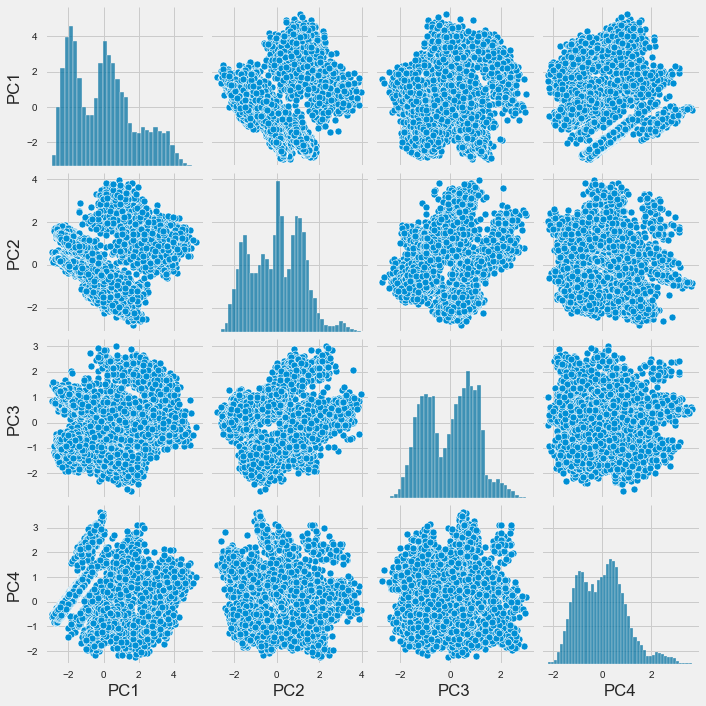

In [84]:
sns.pairplot(data=df_pca2)
plt.show()

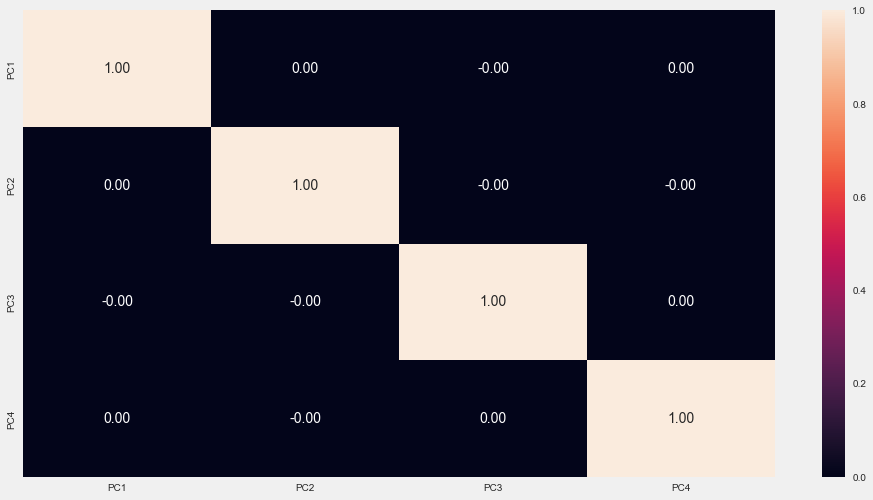

In [85]:
sns.heatmap(data=df_pca2.corr(),annot=True,fmt='.2f')
plt.show()

In [86]:
# We can see that there are no multicollinearity present in the above dataframe. 

In [87]:
# Now we will build the model using PCA.

# KMeans Model with PCA

In [88]:
pca_scores = pca1.transform(df_online_shoppers_intention_num_scaled_norm)
pca_scores

array([[-2.567312  ,  0.30716581,  1.15230302, -0.28346878],
       [-2.72042126,  1.26009274, -0.43778661, -0.8173756 ],
       [-1.81810529,  0.96747132, -0.70796096,  0.05943669],
       ...,
       [-2.12518075,  1.23920401, -0.90607988, -0.2933863 ],
       [-0.00413669, -1.51087429,  0.44743222, -0.93770525],
       [-2.48653304,  0.19908282,  1.23060647, -0.2115645 ]])

In [89]:
wcss_pca = []

for i in range(2,21):
    kmean_pca = KMeans(n_clusters=i,random_state=10)
    kmean_pca.fit(pca_scores)
    wcss_pca.append(kmean_pca.inertia_)
wcss_pca    

[47581.262484208804,
 29653.357905772245,
 24550.540787619295,
 19709.36312236272,
 16547.209985824004,
 13753.402034763949,
 11678.571913562611,
 9781.83307288531,
 8689.924767572882,
 7650.523592837529,
 7058.239520295058,
 6483.542430781415,
 6014.741013593315,
 5662.3422766624935,
 5373.255605353403,
 5053.992895985288,
 4868.780352979315,
 4496.117226177727,
 4343.709682752189]

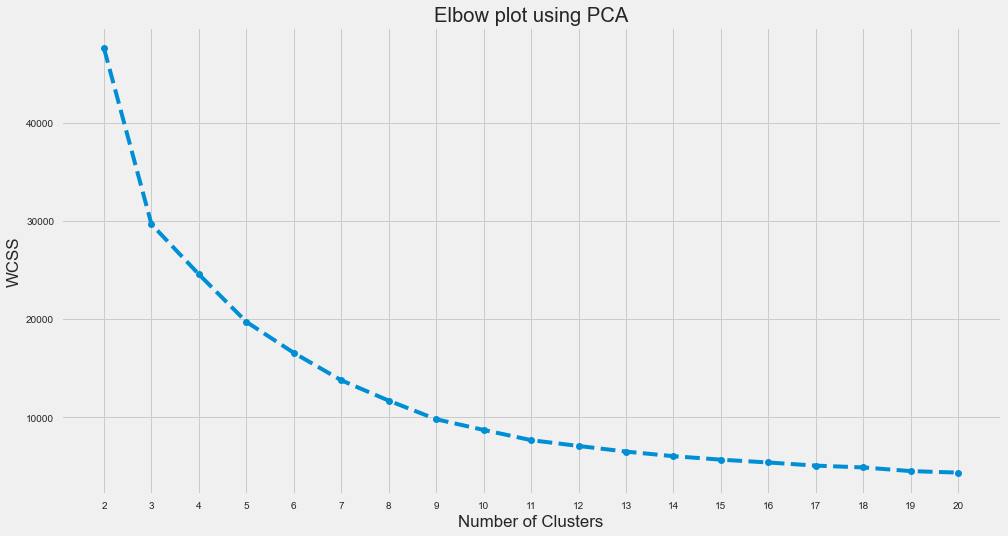

In [90]:
plt.plot(range(2,21),wcss_pca,marker='o',linestyle='--')

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow plot using PCA')
plt.xticks(range(2,21))
plt.show()

In [91]:
scores_pca = []

for i in range(2,21):
    kmean_pca = KMeans(n_clusters=i,random_state=10)
    kmean_pca.fit(pca_scores)
    score = silhouette_score(pca_scores,kmean_pca.labels_,random_state=10)
    scores_pca.append(score)
scores_pca    

[0.3557347514444687,
 0.4320649101272968,
 0.4300107404721715,
 0.44612347989610773,
 0.4785273582441247,
 0.47749491824825174,
 0.49541475461510937,
 0.5195865157169468,
 0.5312003950176415,
 0.5362680525152947,
 0.501230287684214,
 0.5063121631984961,
 0.4765413170293141,
 0.4790350288464017,
 0.44122183456411307,
 0.42290149483452,
 0.4058675663617694,
 0.4270268476477295,
 0.41360617474345973]

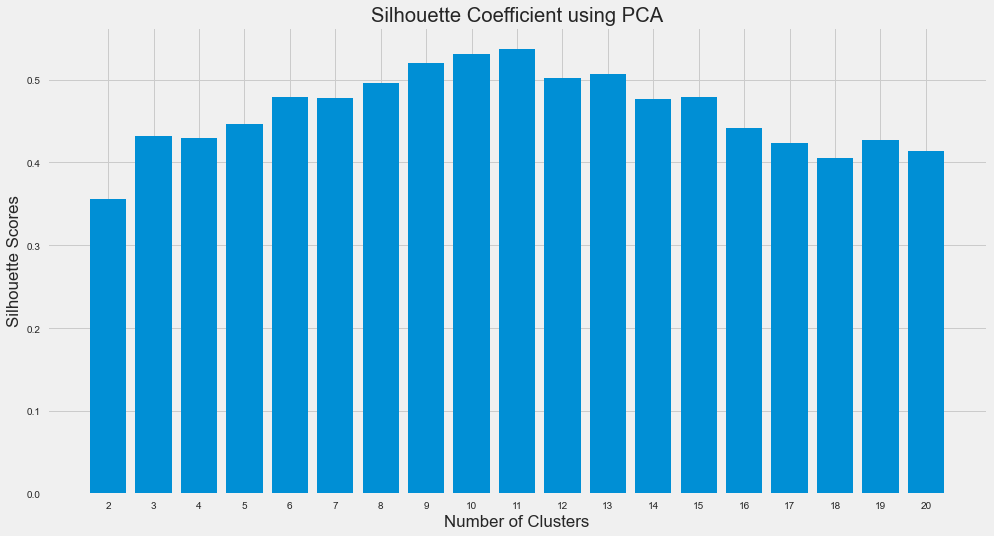

In [92]:
plt.bar(range(2,21),scores_pca)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Coefficient using PCA')
plt.xticks(range(2,21))
plt.show()

In [93]:
# From above elbow chart and silhouette coeficient value conclude that we should be building model with k = 11 clusters

# KMeans Model using Optimal value of k using PCA

In [94]:
kmean_pca_final = KMeans(n_clusters=11,random_state=10)
kmean_pca_final.fit(pca_scores)

KMeans(n_clusters=11, random_state=10)

In [95]:
len(kmean_pca_final.labels_)

11004

In [96]:
df_online_shoppers_intention_final = df_online_shoppers_intention.iloc[list1]
df_online_shoppers_intention_final.head()

Administrative  Administrative_Duration  Informational  \
1               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   
5               0                     0.00              0   
9               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                    0.00               2                    64.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   
5                    0.00              19                   154.22   
9                    0.00               3                   738.00   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1         0.00       0.10        0.00        0.00   Feb                 2   
3         0.05       0.14        0.00        0.00   Feb                 3   
4         0.02       0.05        0.00        0.00   Feb                 3   
5         0.02       0.02        0.00        0.00   Feb                 2   
9         0.00       0.02        0.00        0.40   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
1        2       1            2  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False  
5        2       1            3  Returning_Visitor    False    False  
9        4       1            2  Returning_Visitor    False    False

In [97]:
df_online_shoppers_intention_cluster_pca = pd.concat([df_online_shoppers_intention_final.reset_index(drop=True),pd.DataFrame(pca_scores)],axis=1)
df_online_shoppers_intention_cluster_pca.columns.values[-4:] = ['Component 1','Component 2','Component 3','Component 4']
df_online_shoppers_intention_cluster_pca['Clusters K Means PCA'] = kmean_pca_final.labels_
df_online_shoppers_intention_cluster_pca.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               2                    64.00   
1                    0.00               2                     2.67   
2                    0.00              10                   627.50   
3                    0.00              19                   154.22   
4                    0.00               3                   738.00   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.00       0.10        0.00        0.00   Feb                 2   
1         0.05       0.14        0.00        0.00   Feb                 3   
2         0.02       0.05        0.00        0.00   Feb                 3   
3         0.02       0.02        0.00        0.00   Feb                 2   
4         0.00       0.02        0.00        0.40   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        2       1            2  Returning_Visitor    False    False   
1        2       2            4  Returning_Visitor    False    False   
2        3       1            4  Returning_Visitor     True    False   
3        2       1            3  Returning_Visitor    False    False   
4        4       1            2  Returning_Visitor    False    False   

   Component 1  Component 2  Component 3  Component 4  Clusters K Means PCA  
0        -2.57         0.31         1.15        -0.28                     0  
1        -2.72         1.26        -0.44        -0.82                     8  
2        -1.82         0.97        -0.71         0.06                     8  
3        -1.67         0.78        -0.56         0.20                     8  
4        -2.18         0.27         0.74         0.21                     0

In [98]:
df_online_shoppers_intention_cluster_pca.shape

(11004, 23)

In [99]:
df_online_shoppers_intention_cluster_pca['Clusters K Means PCA'].value_counts(ascending=False)

8     2037
0     1952
6     1647
5     1361
3      879
2      672
1      620
4      618
9      416
7      408
10     394
Name: Clusters K Means PCA, dtype: int64

In [100]:
# The final dataframe has 23 columns and 11004 rows

# Comparison Of KMeans with PCA and KMeans without PCA

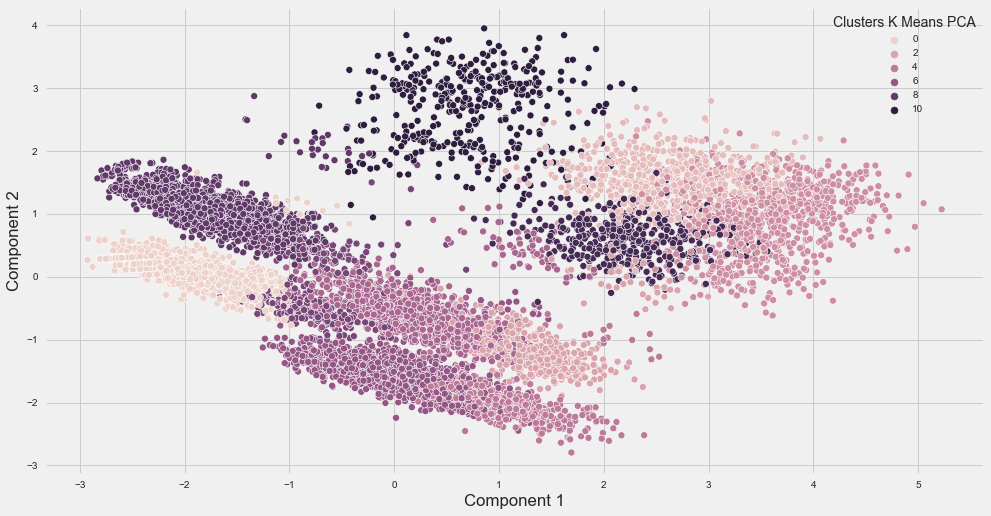

In [101]:
X_axis = df_online_shoppers_intention_cluster_pca['Component 1']
Y_axis = df_online_shoppers_intention_cluster_pca['Component 2']

sns.scatterplot(x=X_axis,y=Y_axis,hue=df_online_shoppers_intention_cluster_pca['Clusters K Means PCA'])

plt.show()

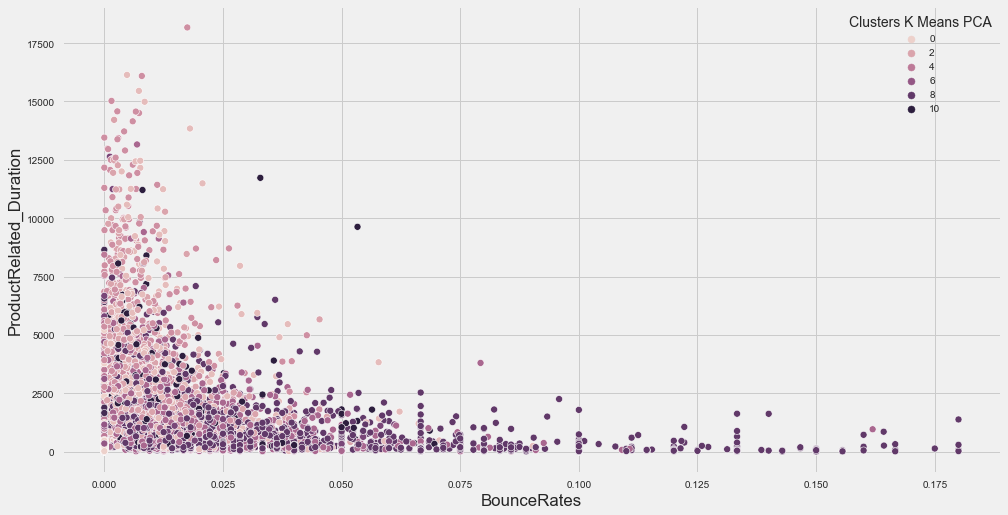

In [102]:
X_axis = df_online_shoppers_intention_cluster_pca['BounceRates']
Y_axis = df_online_shoppers_intention_cluster_pca['ProductRelated_Duration']

sns.scatterplot(x=X_axis,y=Y_axis,hue=df_online_shoppers_intention_cluster_pca['Clusters K Means PCA'])

plt.show()

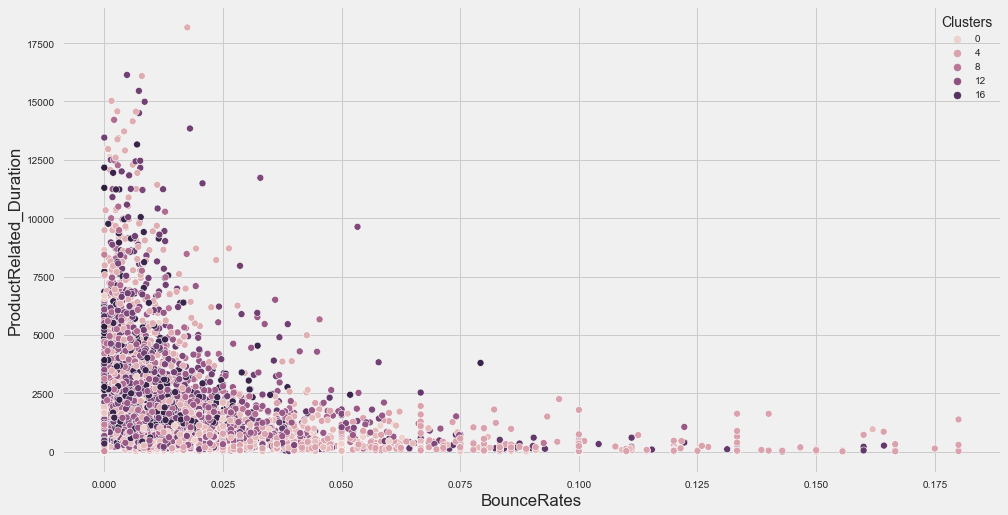

In [103]:
X_axis = df_online_shoppers_intention_cluster2['BounceRates']
Y_axis = df_online_shoppers_intention_cluster2['ProductRelated_Duration']

sns.scatterplot(x=X_axis,y=Y_axis,hue=df_online_shoppers_intention_cluster2['Clusters'])

plt.show()

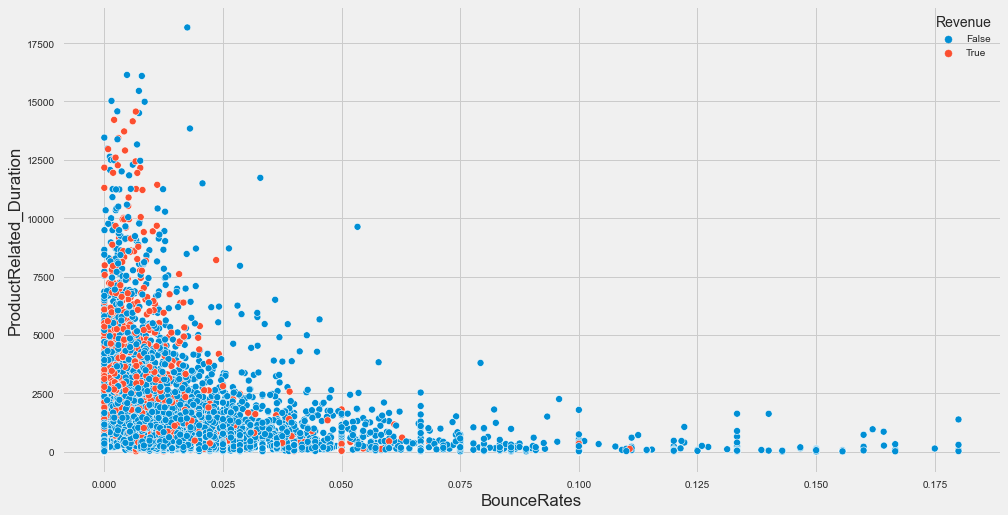

In [104]:
X_axis = df_online_shoppers_intention_cluster_pca['BounceRates']
Y_axis = df_online_shoppers_intention_cluster_pca['ProductRelated_Duration']

sns.scatterplot(x=X_axis,y=Y_axis,hue=df_online_shoppers_intention_cluster_pca['Revenue'])

plt.show()

In [105]:
df_online_shoppers_intention_cluster_pca.describe()

Administrative  Administrative_Duration  Informational  \
count        11004.00                 11004.00       11004.00   
mean             2.50                    86.54           0.53   
std              3.37                   175.37           1.28   
min              0.00                     0.00           0.00   
25%              0.00                     0.00           0.00   
50%              1.00                    18.20           0.00   
75%              4.00                   102.90           0.00   
max             26.00                  2720.50          16.00   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                11004.00        11004.00                 11004.00   
mean                    32.84           33.15                  1245.65   
std                    116.36           41.60                  1683.90   
min                      0.00            1.00                     0.50   
25%                      0.00            9.00                   244.13   
50%                      0.00           20.00                   674.34   
75%                      0.00           40.00                  1558.40   
max                   1307.00          409.00                 18171.79   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
count     11004.00   11004.00    11004.00    11004.00          11004.00   
mean          0.01       0.03        6.30        0.03              2.12   
std           0.02       0.03       19.05        0.12              0.90   
min           0.00       0.00        0.00        0.00              1.00   
25%           0.00       0.01        0.00        0.00              2.00   
50%           0.00       0.02        0.00        0.00              2.00   
75%           0.01       0.04        0.00        0.00              3.00   
max           0.18       0.19      361.76        0.60              8.00   

       Browser   Region  TrafficType  Component 1  Component 2  Component 3  \
count 11004.00 11004.00     11004.00     11004.00     11004.00     11004.00   
mean      2.36     3.14         3.99        -0.00         0.00        -0.00   
std       1.71     2.40         3.94         1.80         1.22         1.02   
min       1.00     1.00         1.00        -2.93        -2.79        -2.68   
25%       2.00     1.00         2.00        -1.64        -1.01        -0.90   
50%       2.00     3.00         2.00        -0.05         0.05         0.13   
75%       2.00     4.00         4.00         1.10         0.95         0.80   
max      13.00     9.00        20.00         5.22         3.95         3.01   

       Component 4  Clusters K Means PCA  
count     11004.00              11004.00  
mean          0.00                  4.60  
std           0.97                  3.09  
min          -2.23                  0.00  
25%          -0.78                  2.00  
50%          -0.01                  5.00  
75%           0.61                  8.00  
max           3.63                 10.00

In [106]:
obs2 = df_online_shoppers_intention_cluster_pca.groupby('Clusters K Means PCA').size()
obs2

Clusters K Means PCA
0     1952
1      620
2      672
3      879
4      618
5     1361
6     1647
7      408
8     2037
9      416
10     394
dtype: int64

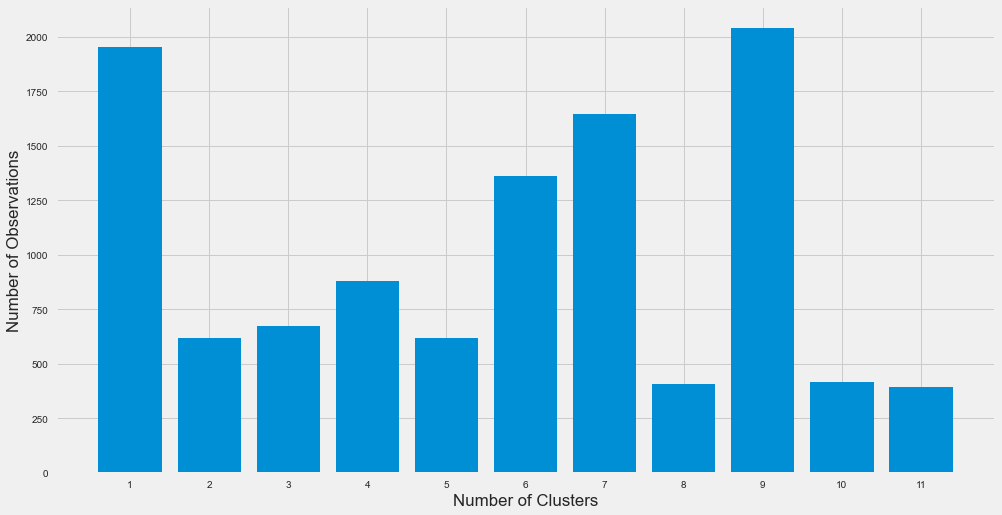

In [107]:
plt.bar(range(1,12),obs2)

plt.xlabel('Number of Clusters')
plt.ylabel('Number of Observations')
plt.xticks(range(1,12))
plt.show()

# Interpretation of final model

In [108]:
df1 = df_online_shoppers_intention_cluster_pca[df_online_shoppers_intention_cluster_pca['Clusters K Means PCA']==0]
df1.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
4               0                     0.00              0   
5               0                     0.00              0   
7               0                     0.00              0   
8               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               2                    64.00   
4                    0.00               3                   738.00   
5                    0.00               3                   395.00   
7                    0.00               7                   280.50   
8                    0.00               6                    98.00   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.00       0.10        0.00        0.00   Feb                 2   
4         0.00       0.02        0.00        0.40   Feb                 2   
5         0.00       0.07        0.00        0.00   Feb                 1   
7         0.00       0.03        0.00        0.00   Feb                 1   
8         0.00       0.07        0.00        0.00   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        2       1            2  Returning_Visitor    False    False   
4        4       1            2  Returning_Visitor    False    False   
5        1       3            3  Returning_Visitor    False    False   
7        1       1            3  Returning_Visitor    False    False   
8        5       1            3  Returning_Visitor    False    False   

   Component 1  Component 2  Component 3  Component 4  Clusters K Means PCA  
0        -2.57         0.31         1.15        -0.28                     0  
4        -2.18         0.27         0.74         0.21                     0  
5        -2.26         0.22         1.03         0.00                     0  
7        -1.97         0.03         1.05         0.27                     0  
8        -2.24         0.23         0.99         0.01                     0

In [109]:
df1.describe()

Administrative  Administrative_Duration  Informational  \
count         1952.00                  1952.00        1952.00   
mean             0.01                     0.00           0.01   
std              0.09                     0.00           0.09   
min              0.00                     0.00           0.00   
25%              0.00                     0.00           0.00   
50%              0.00                     0.00           0.00   
75%              0.00                     0.00           0.00   
max              1.00                     0.00           1.00   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                 1952.00         1952.00                  1952.00   
mean                     0.00           10.95                   411.80   
std                      0.00           10.62                   542.47   
min                      0.00            1.00                     0.50   
25%                      0.00            4.00                    87.50   
50%                      0.00            7.00                   222.75   
75%                      0.00           14.00                   512.50   
max                      0.00           69.00                  5208.65   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
count      1952.00    1952.00     1952.00     1952.00           1952.00   
mean          0.00       0.04        0.03        0.03              2.15   
std           0.00       0.03        0.80        0.11              1.01   
min           0.00       0.00        0.00        0.00              1.00   
25%           0.00       0.02        0.00        0.00              2.00   
50%           0.00       0.03        0.00        0.00              2.00   
75%           0.00       0.05        0.00        0.00              2.00   
max           0.00       0.13       26.85        0.60              8.00   

       Browser  Region  TrafficType  Component 1  Component 2  Component 3  \
count  1952.00 1952.00      1952.00      1952.00      1952.00      1952.00   
mean      2.43    3.16         4.04        -1.97         0.07         1.01   
std       1.84    2.47         4.04         0.42         0.22         0.24   
min       1.00    1.00         1.00        -2.93        -0.77         0.12   
25%       2.00    1.00         2.00        -2.30        -0.06         0.87   
50%       2.00    3.00         2.00        -1.97         0.06         1.05   
75%       2.00    4.00         4.00        -1.69         0.20         1.18   
max      13.00    9.00        20.00        -0.43         1.66         2.03   

       Component 4  Clusters K Means PCA  
count      1952.00               1952.00  
mean          0.26                  0.00  
std           0.38                  0.00  
min          -1.08                  0.00  
25%          -0.03                  0.00  
50%           0.25                  0.00  
75%           0.52                  0.00  
max           1.67                  0.00

In [110]:
df1.describe(include='object')

Month        VisitorType
count   1952               1952
unique    10                  3
top      May  Returning_Visitor
freq     492               1681

In [111]:
df2 = df_online_shoppers_intention_cluster_pca[df_online_shoppers_intention_cluster_pca['Clusters K Means PCA']==1]
df2.head()

Administrative  Administrative_Duration  Informational  \
78                6                   326.25              4   
115               2                    58.00              2   
133              10                   293.78              2   
136               3                  1226.00              5   
155               2                    49.00              1   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
78                    94.00             128                  5062.21   
115                   22.00              31                   829.17   
133                  153.00              96                  3283.17   
136                    3.00              24                  3230.25   
155                  127.00               4                   188.00   

     BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
78          0.00       0.02        0.00        0.00   Feb                 2   
115         0.03       0.04        0.00        0.00   Feb                 1   
133         0.00       0.01        0.00        0.00   Mar                 3   
136         0.04       0.10        0.00        0.00   Mar                 2   
155         0.03       0.04        0.00        0.00   Mar                 3   

     Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
78         5       1            3  Returning_Visitor    False    False   
115        1       1            1  Returning_Visitor     True    False   
133        2       6            2  Returning_Visitor     True    False   
136        2       1            2  Returning_Visitor    False    False   
155        2       3            2  Returning_Visitor    False    False   

     Component 1  Component 2  Component 3  Component 4  Clusters K Means PCA  
78          3.35         1.33         0.12        -0.83                     1  
115         2.05         1.72        -0.12        -1.30                     1  
133         3.28         1.24         0.16        -0.96                     1  
136         2.33         1.53        -0.57        -1.72                     1  
155         1.56         1.81         0.57        -1.82                     1

In [112]:
df2.describe()

Administrative  Administrative_Duration  Informational  \
count          620.00                   620.00         620.00   
mean             5.20                   181.73           2.50   
std              3.69                   244.86           1.82   
min              1.00                     0.00           1.00   
25%              2.00                    47.25           1.00   
50%              4.00                   109.70           2.00   
75%              7.00                   226.95           3.00   
max             23.00                  2720.50          14.00   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                  620.00          620.00                   620.00   
mean                   151.35           65.62                  2546.80   
std                    202.56           60.08                  2588.34   
min                      0.00            2.00                     5.33   
25%                     26.38           25.00                   804.43   
50%                     70.55           45.00                  1678.67   
75%                    187.25           88.00                  3386.78   
max                   1231.00          401.00                 16138.29   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
count       620.00     620.00      620.00      620.00            620.00   
mean          0.01       0.03        0.13        0.02              2.15   
std           0.01       0.02        1.32        0.10              0.84   
min           0.00       0.00        0.00        0.00              1.00   
25%           0.00       0.02        0.00        0.00              2.00   
50%           0.01       0.02        0.00        0.00              2.00   
75%           0.02       0.04        0.00        0.00              3.00   
max           0.09       0.12       21.58        0.60              8.00   

       Browser  Region  TrafficType  Component 1  Component 2  Component 3  \
count   620.00  620.00       620.00       620.00       620.00       620.00   
mean      2.14    3.11         3.61         2.59         1.57         0.07   
std       1.35    2.41         3.47         0.55         0.36         0.40   
min       1.00    1.00         1.00         0.83         0.09        -1.39   
25%       2.00    1.00         2.00         2.21         1.34        -0.18   
50%       2.00    3.00         2.00         2.56         1.54         0.09   
75%       2.00    4.00         4.00         2.96         1.80         0.33   
max      10.00    9.00        20.00         4.07         2.80         1.19   

       Component 4  Clusters K Means PCA  
count       620.00                620.00  
mean         -1.13                  1.00  
std           0.41                  0.00  
min          -2.23                  1.00  
25%          -1.39                  1.00  
50%          -1.14                  1.00  
75%          -0.87                  1.00  
max           0.29                  1.00

In [113]:
df2.describe(include='object')

Month        VisitorType
count    620                620
unique    10                  2
top      Nov  Returning_Visitor
freq     196                602

In [114]:
df9 = df_online_shoppers_intention_cluster_pca[df_online_shoppers_intention_cluster_pca['Clusters K Means PCA']==8]
df9.head()

Administrative  Administrative_Duration  Informational  \
1                0                     0.00              0   
2                0                     0.00              0   
3                0                     0.00              0   
6                0                     0.00              0   
17               0                     0.00              0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                     0.00               2                     2.67   
2                     0.00              10                   627.50   
3                     0.00              19                   154.22   
6                     0.00              16                   407.75   
17                    0.00               4                    76.00   

    BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1          0.05       0.14        0.00        0.00   Feb                 3   
2          0.02       0.05        0.00        0.00   Feb                 3   
3          0.02       0.02        0.00        0.00   Feb                 2   
6          0.02       0.03        0.00        0.40   Feb                 1   
17         0.05       0.10        0.00        0.00   Feb                 1   

    Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
1         2       2            4  Returning_Visitor    False    False   
2         3       1            4  Returning_Visitor     True    False   
3         2       1            3  Returning_Visitor    False    False   
6         1       4            3  Returning_Visitor    False    False   
17        1       1            3  Returning_Visitor    False    False   

    Component 1  Component 2  Component 3  Component 4  Clusters K Means PCA  
1         -2.72         1.26        -0.44        -0.82                     8  
2         -1.82         0.97        -0.71         0.06                     8  
3         -1.67         0.78        -0.56         0.20                     8  
6         -1.80         1.11        -1.10         0.19                     8  
17        -2.31         1.20        -0.68        -0.44                     8

In [115]:
df9.describe(include='object')

Month        VisitorType
count   2037               2037
unique    10                  2
top      May  Returning_Visitor
freq     590               1984

In [116]:
df11 = df_online_shoppers_intention_cluster_pca[df_online_shoppers_intention_cluster_pca['Clusters K Means PCA']==10]
df11.head()

Administrative  Administrative_Duration  Informational  \
81                0                     0.00              1   
104               0                     0.00              1   
130               0                     0.00             16   
188               0                     0.00              1   
251               0                     0.00              1   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
81                    93.00              30                  1045.83   
104                   19.00              10                   852.00   
130                 1210.40               5                   279.86   
188                 1220.00              28                  2389.33   
251                   24.00              27                  1547.50   

     BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
81          0.01       0.04        0.00        0.20   Feb                 1   
104         0.00       0.01        0.00        0.00   Feb                 2   
130         0.00       0.01        0.00        0.00   Mar                 2   
188         0.02       0.03        0.00        0.00   Mar                 2   
251         0.00       0.01        0.00        0.00   Mar                 3   

     Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
81         1       1            3  Returning_Visitor    False    False   
104        2       3            6  Returning_Visitor    False    False   
130        2       1            8  Returning_Visitor    False    False   
188        2       1            3  Returning_Visitor     True    False   
251        2       1            1  Returning_Visitor    False    False   

     Component 1  Component 2  Component 3  Component 4  Clusters K Means PCA  
81          0.40         3.39         0.14         0.06                    10  
104         0.19         1.82         2.37         0.33                    10  
130         0.93         3.59         2.07        -0.30                    10  
188         1.04         3.56         0.77         0.13                    10  
251         0.53         2.62         0.80         0.32                    10

In [117]:
df11.describe()

Administrative  Administrative_Duration  Informational  \
count          394.00                   394.00         394.00   
mean             0.04                     0.00           2.02   
std              0.20                     0.00           1.45   
min              0.00                     0.00           1.00   
25%              0.00                     0.00           1.00   
50%              0.00                     0.00           2.00   
75%              0.00                     0.00           2.00   
max              1.00                     0.00          16.00   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                  394.00          394.00                   394.00   
mean                   119.70           44.15                  1708.49   
std                    194.61           43.46                  1701.33   
min                      0.00            1.00                    31.17   
25%                     19.00           15.00                   546.75   
50%                     47.50           31.00                  1137.07   
75%                    115.55           57.75                  2281.25   
max                   1222.75          377.00                 11729.41   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
count       394.00     394.00      394.00      394.00            394.00   
mean          0.01       0.03        5.87        0.03              2.16   
std           0.01       0.02       19.76        0.11              0.95   
min           0.00       0.00        0.00        0.00              1.00   
25%           0.00       0.02        0.00        0.00              2.00   
50%           0.01       0.03        0.00        0.00              2.00   
75%           0.01       0.04        0.00        0.00              3.00   
max           0.07       0.10      177.77        0.60              8.00   

       Browser  Region  TrafficType  Component 1  Component 2  Component 3  \
count   394.00  394.00       394.00       394.00       394.00       394.00   
mean      2.33    2.99         3.99         0.73         2.65         1.01   
std       1.60    2.35         4.11         0.59         0.62         0.90   
min       1.00    1.00         1.00        -0.76         0.94        -0.66   
25%       2.00    1.00         2.00         0.28         2.14         0.34   
50%       2.00    2.00         2.00         0.73         2.78         0.72   
75%       2.00    4.00         4.00         1.14         3.11         1.93   
max      13.00    9.00        20.00         2.29         3.95         3.01   

       Component 4  Clusters K Means PCA  
count       394.00                394.00  
mean          0.59                 10.00  
std           0.86                  0.00  
min          -0.78                 10.00  
25%           0.05                 10.00  
50%           0.37                 10.00  
75%           0.75                 10.00  
max           3.13                 10.00

In [118]:
df11.describe(include='object')

Month        VisitorType
count    394                394
unique    10                  3
top      Nov  Returning_Visitor
freq     119                358

In [119]:
# Building classification model 

In [120]:
df_online_shoppers_intention2 =  df_online_shoppers_intention_cluster.iloc[list1]
df_online_shoppers_intention2.head()

Administrative  Administrative_Duration  Informational  \
1               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   
5               0                     0.00              0   
9               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                    0.00               2                    64.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   
5                    0.00              19                   154.22   
9                    0.00               3                   738.00   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
1         0.00       0.10        0.00        0.00                 2        2   
3         0.05       0.14        0.00        0.00                 3        2   
4         0.02       0.05        0.00        0.00                 3        3   
5         0.02       0.02        0.00        0.00                 2        2   
9         0.00       0.02        0.00        0.40                 2        4   

   Region  TrafficType  Month  VisitorType  Weekend  Revenue  
1       1            2   0.00         0.00     0.00     0.00  
3       2            4   0.00         0.00     0.00     0.00  
4       1            4   0.00         0.00     1.00     0.00  
5       1            3   0.00         0.00     0.00     0.00  
9       1            2   0.00         0.00     0.00     0.00

In [121]:
df_online_shoppers_intention2.shape

(11004, 18)

In [122]:
X = df_online_shoppers_intention2.drop('Revenue',axis=1)
X.head()

Administrative  Administrative_Duration  Informational  \
1               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   
5               0                     0.00              0   
9               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                    0.00               2                    64.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   
5                    0.00              19                   154.22   
9                    0.00               3                   738.00   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
1         0.00       0.10        0.00        0.00                 2        2   
3         0.05       0.14        0.00        0.00                 3        2   
4         0.02       0.05        0.00        0.00                 3        3   
5         0.02       0.02        0.00        0.00                 2        2   
9         0.00       0.02        0.00        0.40                 2        4   

   Region  TrafficType  Month  VisitorType  Weekend  
1       1            2   0.00         0.00     0.00  
3       2            4   0.00         0.00     0.00  
4       1            4   0.00         0.00     1.00  
5       1            3   0.00         0.00     0.00  
9       1            2   0.00         0.00     0.00

In [123]:
y = df_online_shoppers_intention2['Revenue']
y.value_counts()

0.00    9175
1.00    1829
Name: Revenue, dtype: int64

In [124]:
# We can see that target have highly imbalance data

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (8803, 17)
y_train:  (8803,)
X_test:  (2201, 17)
y_test:  (2201,)


In [126]:
random_forest_base_model = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=random_forest_base_model,X=X_train,y=y_train,cv=kf,scoring='roc_auc')
print(score)

print('Bias error',1-np.mean(score))
print('Variance error',np.std(score,ddof=1))

[0.91845204 0.9259891  0.90056063 0.91019221 0.92144276]
Bias error 0.08467265525366263
Variance error 0.010065542511165657


In [127]:
df = pd.DataFrame(kmean_pca_final.labels_,columns=['Clusters'])

In [128]:
len(df_online_shoppers_intention_num_scaled_norm)

11004

In [129]:
len(df)

11004

In [130]:
df_online_shoppers_intention_num_scaled_norm.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
dtype: int64

In [131]:
len(df_online_shoppers_intention_cat_encoded)

12205

In [132]:
len(df_online_shoppers_intention_cat_encoded.iloc[list1])

11004

In [133]:
df2 = df_online_shoppers_intention_cat_encoded.iloc[list1].reset_index(drop=True)
df2.head()

OperatingSystems  Browser  Region  TrafficType  Month  VisitorType  \
0                 2        2       1            2   0.00         0.00   
1                 3        2       2            4   0.00         0.00   
2                 3        3       1            4   0.00         0.00   
3                 2        2       1            3   0.00         0.00   
4                 2        4       1            2   0.00         0.00   

   Weekend  Revenue  
0     0.00     0.00  
1     0.00     0.00  
2     1.00     0.00  
3     0.00     0.00  
4     0.00     0.00

In [134]:
len(df2)

11004

In [135]:
df1 = df_online_shoppers_intention_num_scaled_norm.reset_index(drop=True)
df1.head()

Administrative  Administrative_Duration  Informational  \
0           -1.07                    -1.03          -0.52   
1           -1.07                    -1.03          -0.52   
2           -1.07                    -1.03          -0.52   
3           -1.07                    -1.03          -0.52   
4           -1.07                    -1.03          -0.52   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.49           -1.48                    -0.72   
1                   -0.49           -1.48                    -1.61   
2                   -0.49           -0.43                     0.18   
3                   -0.49            0.06                    -0.40   
4                   -0.49           -1.24                     0.25   

   BounceRates  ExitRates  PageValues  SpecialDay  
0        -1.07       1.24       -0.53       -0.34  
1         1.16       1.58       -0.53       -0.34  
2         0.91       0.57       -0.53       -0.34  
3         0.86      -0.06       -0.53       -0.34  
4        -1.07      -0.14       -0.53        2.83

In [136]:
df3 = (pd.merge(df1,df2,left_index=True,right_index=True))
df3.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
Month                      0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [137]:
df_online_shoppers_intention_cluster_pca2 = pd.merge(df3,df,left_index=True,right_index=True)
df_online_shoppers_intention_cluster_pca2.head()

Administrative  Administrative_Duration  Informational  \
0           -1.07                    -1.03          -0.52   
1           -1.07                    -1.03          -0.52   
2           -1.07                    -1.03          -0.52   
3           -1.07                    -1.03          -0.52   
4           -1.07                    -1.03          -0.52   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.49           -1.48                    -0.72   
1                   -0.49           -1.48                    -1.61   
2                   -0.49           -0.43                     0.18   
3                   -0.49            0.06                    -0.40   
4                   -0.49           -1.24                     0.25   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0        -1.07       1.24       -0.53       -0.34                 2        2   
1         1.16       1.58       -0.53       -0.34                 3        2   
2         0.91       0.57       -0.53       -0.34                 3        3   
3         0.86      -0.06       -0.53       -0.34                 2        2   
4        -1.07      -0.14       -0.53        2.83                 2        4   

   Region  TrafficType  Month  VisitorType  Weekend  Revenue  Clusters  
0       1            2   0.00         0.00     0.00     0.00         0  
1       2            4   0.00         0.00     0.00     0.00         8  
2       1            4   0.00         0.00     1.00     0.00         8  
3       1            3   0.00         0.00     0.00     0.00         8  
4       1            2   0.00         0.00     0.00     0.00         0

In [138]:
X_pca = df_online_shoppers_intention_cluster_pca2.drop('Revenue',axis=1)
y_pca = df_online_shoppers_intention_cluster_pca2['Revenue']
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y_pca,test_size=0.2,random_state=10)

print("X_train: ",X_train_pca.shape)
print("y_train: ",y_train_pca.shape)

print("X_test: ",X_test_pca.shape)
print("y_test: ",y_test_pca.shape)

X_train:  (8803, 18)
y_train:  (8803,)
X_test:  (2201, 18)
y_test:  (2201,)


In [139]:
random_forest_pca_model = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=random_forest_pca_model,X=X_train_pca,y=y_train_pca,cv=kf,scoring='roc_auc')
print(score)

print("Bias Error = ",1-np.mean(score))
print("Variance Error = ",np.std(score))

[0.91725032 0.92242385 0.90450397 0.91060503 0.91799703]
Bias Error =  0.08544396167971158
Variance Error =  0.006287391844483909


In [140]:
random_forest_pca_model = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=random_forest_pca_model,X=X_train_pca,y=y_train_pca,cv=kf,scoring='f1_weighted')
print(score)

print("Bias Error = ",1-np.mean(score))
print("Variance Error = ",np.std(score))

[0.88427495 0.89004145 0.88237821 0.8914607  0.89372857]
Bias Error =  0.11162322439343042
Variance Error =  0.004329695197600845


# HyperParameter Tuning 

In [142]:
params = {'n_estimators':range(2,50),'criterion':['gini','entropy']}
kf = KFold(n_splits=5,shuffle=True,random_state=10)
grid = GridSearchCV(estimator=random_forest_pca_model,param_grid=params,cv=kf,scoring='roc_auc')
grid.fit(X_train_pca,y_train_pca)
print("Best Paramters : ",grid.best_params_)

Best Paramters :  {'criterion': 'entropy', 'n_estimators': 44}


In [143]:
random_forest_pca_model_tuned = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],criterion=grid.best_params_['criterion'],random_state=10)
random_forest_pca_model_tuned.fit(X_train,y_train)

kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=random_forest_pca_model_tuned,X=X_train,y=y_train,cv=kf,scoring='roc_auc')

print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score,ddof=1))

[0.92199252 0.92153965 0.89751808 0.90404451 0.91384716]
bias error 0.088211616719029
variance error 0.01080577735853549


In [144]:
y_pred_random_forest_pca_model_tuned = random_forest_pca_model_tuned.predict(X_test)
print(classification_report(y_test,y_pred_random_forest_pca_model_tuned))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1820
         1.0       0.73      0.56      0.63       381

    accuracy                           0.89      2201
   macro avg       0.82      0.76      0.78      2201
weighted avg       0.88      0.89      0.88      2201



In [145]:
confusion_matrix(y_test,y_pred_random_forest_pca_model_tuned)

array([[1740,   80],
       [ 168,  213]], dtype=int64)

In [146]:
# handling imbalance data using SMOTE

In [147]:
sm = SMOTE(random_state=10)
sm_X_train,sm_y_train = sm.fit_resample(X_train_pca,y_train_pca.ravel())

In [148]:
sm_X_train.head()

Administrative  Administrative_Duration  Informational  \
0            0.64                     1.03          -0.52   
1            0.89                     0.89           1.70   
2            1.18                     1.18          -0.52   
3           -1.07                    -1.03          -0.52   
4            1.07                     0.92           1.70   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.49            0.86                     0.30   
1                   -0.49            1.76                     1.21   
2                   -0.49            0.10                     0.15   
3                   -0.49           -0.91                    -0.77   
4                    1.06            0.65                     0.42   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0        -1.07      -1.44       -0.53       -0.34                 2        2   
1         0.64      -0.67        2.15       -0.34                 2        2   
2         0.98       0.39       -0.53       -0.34                 2        2   
3         1.09       1.01       -0.53       -0.34                 2        4   
4         0.93      -0.31        1.78       -0.34                 3        2   

   Region  TrafficType  Month  VisitorType  Weekend  Clusters  
0       2            4   2.00         0.00     0.00         6  
1       1            2   8.00         0.00     0.00         2  
2       7            1   8.00         0.00     0.00         5  
3       1            1   1.00         0.00     1.00         8  
4       6            3   2.00         0.00     0.00         3

In [149]:
random_forest_pca_model_tuned.fit(sm_X_train,sm_y_train)
y_pred_random_forest_pca_model_tuned_2 =random_forest_pca_model_tuned.predict(X_test_pca)

In [150]:
print(classification_report(y_test,y_pred_random_forest_pca_model_tuned_2))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1820
         1.0       0.63      0.70      0.66       381

    accuracy                           0.88      2201
   macro avg       0.78      0.81      0.79      2201
weighted avg       0.88      0.88      0.88      2201



In [151]:
confusion_matrix(y_test,y_pred_random_forest_pca_model_tuned_2)

array([[1666,  154],
       [ 115,  266]], dtype=int64)

In [152]:
# There are some improve but still not enough.

# using PCA

In [154]:
pca2 = PCA(n_components=5)
X_train_pca2 = pca2.fit_transform(X_train_pca)
X_test_pca2 = pca2.transform(X_test_pca)

In [155]:
print(pca2.explained_variance_)
print(pca2.explained_variance_ratio_)

[15.60605733 10.08127761  9.68708413  5.80497562  3.15208407]
[0.29360577 0.1896649  0.18224871 0.10921236 0.05930198]


In [156]:
print(pca2.explained_variance_ratio_.cumsum())

[0.29360577 0.48327067 0.66551938 0.77473174 0.83403372]


In [157]:
random_forest_pca_model_tuned2 = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],criterion=grid.best_params_['criterion'],random_state=10)

random_forest_pca_model_tuned2.fit(X_train_pca2,y_train_pca)

RandomForestClassifier(criterion='entropy', n_estimators=44, random_state=10)

In [158]:
y_pred_random_forest_pca_model_tuned_3 = random_forest_pca_model_tuned2.predict(X_test_pca2)

print(classification_report(y_test_pca,y_pred_random_forest_pca_model_tuned_3))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1820
         1.0       0.65      0.50      0.56       381

    accuracy                           0.87      2201
   macro avg       0.78      0.72      0.74      2201
weighted avg       0.86      0.87      0.86      2201



In [159]:
confusion_matrix(y_test_pca,y_pred_random_forest_pca_model_tuned_3)

array([[1718,  102],
       [ 191,  190]], dtype=int64)

In [160]:
random_forest_pca_model2 = RandomForestClassifier()

In [161]:
params = {'n_estimators':range(2,50),'criterion':['gini','entropy']}
kf = KFold(n_splits=5,shuffle=True,random_state=10)
grid = GridSearchCV(estimator=random_forest_pca_model2,param_grid=params,cv=kf,scoring='roc_auc')
grid.fit(X_train_pca2,y_train_pca)
print("Best Paramters : ",grid.best_params_)

Best Paramters :  {'criterion': 'entropy', 'n_estimators': 37}


In [162]:
random_forest_pca_model_tuned3 = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],criterion=grid.best_params_['criterion'],random_state=10)

random_forest_pca_model_tuned3.fit(X_train_pca2,y_train_pca)

RandomForestClassifier(criterion='entropy', n_estimators=37, random_state=10)

In [163]:
y_pred_random_forest_pca_model_tuned_4 = random_forest_pca_model_tuned3.predict(X_test_pca2)

In [164]:
print(classification_report(y_test_pca,y_pred_random_forest_pca_model_tuned_4))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1820
         1.0       0.65      0.51      0.57       381

    accuracy                           0.87      2201
   macro avg       0.78      0.73      0.75      2201
weighted avg       0.86      0.87      0.86      2201



In [165]:
confusion_matrix(y_test_pca,y_pred_random_forest_pca_model_tuned_4)

array([[1715,  105],
       [ 186,  195]], dtype=int64)

# Using SMOTE and PCA

In [167]:
pca3 = PCA(n_components=5)
X_train_pca3 = pca3.fit_transform(X_train_pca)
X_test_pca3 = pca3.transform(X_test_pca)

In [168]:
sm2 = SMOTE(random_state=10)
sm_X_train2,sm_y_train2 = sm2.fit_resample(X_train_pca3,y_train_pca.ravel())

In [169]:
random_forest_pca_model3 = RandomForestClassifier(random_state=10)

kf = KFold(n_splits=5,shuffle=True,random_state=10)
grid2 = GridSearchCV(estimator=random_forest_pca_model3,param_grid=params,cv=kf,scoring='roc_auc')
grid.fit(sm_X_train2,sm_y_train2)
print("Best Paramters : ",grid.best_params_)

Best Paramters :  {'criterion': 'gini', 'n_estimators': 48}


In [170]:
random_forest_pca_model_tuned4 = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],criterion=grid.best_params_['criterion'],random_state=10)

random_forest_pca_model_tuned4.fit(sm_X_train2,sm_y_train2)

RandomForestClassifier(n_estimators=48, random_state=10)

In [171]:
y_pred_random_forest_pca_model_tuned_5 = random_forest_pca_model_tuned4.predict(X_test_pca3)

In [172]:
print(classification_report(y_test_pca,y_pred_random_forest_pca_model_tuned_5))

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      1820
         1.0       0.56      0.67      0.61       381

    accuracy                           0.85      2201
   macro avg       0.74      0.78      0.76      2201
weighted avg       0.86      0.85      0.86      2201



In [173]:
confusion_matrix(y_test_pca,y_pred_random_forest_pca_model_tuned_5)

array([[1618,  202],
       [ 126,  255]], dtype=int64)

In [174]:
# We can see that we not getting very accurate result so we are not removing the outlier and rebulding the model with full data set

# Rebuidling the model

In [175]:
df_online_shoppers_intention.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20        0.00        0.00   Feb                 1   
1         0.00       0.10        0.00        0.00   Feb                 2   
2         0.20       0.20        0.00        0.00   Feb                 4   
3         0.05       0.14        0.00        0.00   Feb                 3   
4         0.02       0.05        0.00        0.00   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [176]:
df_online_shoppers_intention_copy = df_online_shoppers_intention.copy()

In [177]:
# Label encoding revenue and and weekend columns

In [178]:
le = LabelEncoder()
df_online_shoppers_intention_copy['Revenue'] = le.fit_transform(df_online_shoppers_intention_copy['Revenue'])
df_online_shoppers_intention_copy['Weekend'] = le.fit_transform(df_online_shoppers_intention_copy['Weekend'])

In [179]:
dummy_list = ['Month',"OperatingSystems","Browser","Region","TrafficType","VisitorType"]

In [180]:
for i in dummy_list:
    df_online_shoppers_intention_copy[i] =  df_online_shoppers_intention_copy[i].astype('object')

In [181]:
dummy = pd.get_dummies(df_online_shoppers_intention_copy[dummy_list])
dummy.head()

Month_Aug  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  \
0          0          0          1          0           0          0   
1          0          0          1          0           0          0   
2          0          0          1          0           0          0   
3          0          0          1          0           0          0   
4          0          0          1          0           0          0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  \
0          0          0          0          0                   1   
1          0          0          0          0                   0   
2          0          0          0          0                   0   
3          0          0          0          0                   0   
4          0          0          0          0                   0   

   OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   0                   1   
3                   0                   1                   0   
4                   0                   1                   0   

   OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_8  Browser_1  Browser_2  Browser_3  Browser_4  Browser_5  \
0                   0          1          0          0          0          0   
1                   0          0          1          0          0          0   
2                   0          1          0          0          0          0   
3                   0          0          1          0          0          0   
4                   0          0          0          1          0          0   

   Browser_6  Browser_7  Browser_8  Browser_9  Browser_10  Browser_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Browser_12  Browser_13  Region_1  Region_2  Region_3  Region_4  Region_5  \
0           0           0         1         0         0         0         0   
1           0           0         1         0         0         0         0   
2           0           0         0         0         0         0         0   
3           0           0         0         1         0         0         0   
4           0           0         1         0         0         0         0   

   Region_6  Region_7  Region_8  Region_9  TrafficType_1  TrafficType_2  \
0         0         0         0         0              1              0   
1         0         0         0         0              0              1   
2         0         0         0         1              0              0   
3         0         0         0         0              0              0   
4         0         0         0         0              0              0   

   TrafficType_3  TrafficType_4  TrafficType_5  TrafficType_6  TrafficType_7  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              0              1              0              0              0   

   TrafficType_8  TrafficType_9  TrafficType_1

In [182]:
df_online_shoppers_intention_copy = df_online_shoppers_intention_copy.drop(dummy_list,axis=1)
df_online_shoppers_intention_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Revenue  
0         0.20       0.20        0.00        0.00        0        0  
1         0.00       0.10        0.00        0.00        0        0  
2         0.20       0.20        0.00        0.00        0        0  
3         0.05       0.14        0.00        0.00        0        0  
4         0.02       0.05        0.00        0.00        1        0

In [183]:
df_online_shoppers_intention_copy2 = pd.concat([df_online_shoppers_intention_copy,dummy],axis=1)
df_online_shoppers_intention_copy2.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Revenue  \
0         0.20       0.20        0.00        0.00        0        0   
1         0.00       0.10        0.00        0.00        0        0   
2         0.20       0.20        0.00        0.00        0        0   
3         0.05       0.14        0.00        0.00        0        0   
4         0.02       0.05        0.00        0.00        1        0   

   Month_Aug  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  \
0          0          0          1          0           0          0   
1          0          0          1          0           0          0   
2          0          0          1          0           0          0   
3          0          0          1          0           0          0   
4          0          0          1          0           0          0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  \
0          0          0          0          0                   1   
1          0          0          0          0                   0   
2          0          0          0          0                   0   
3          0          0          0          0                   0   
4          0          0          0          0                   0   

   OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   0                   1   
3                   0                   1                   0   
4                   0                   1                   0   

   OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_8  Browser_1  Browser_2  Browser_3  Browser_4  Browser_5  \
0                   0          1          0          0          0          0   
1                   0          0          1          0          0          0   
2                   0          1          0          0          0          0   
3                   0          0          1          0          0          0   
4                   0          0          0          1          0          0   

   Browser_6  Browser_7  Browser_8  Browser_9  Browser_10  Browser_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Browser_12  Browser_13  Region_1  Region_2  Region_3  Region_4  Region_5  \
0           0           0         1         0         0         0         0   
1           0           0         1         0         0         0         0   
2

In [184]:
df_online_shoppers_intention_copy2.shape

(12205, 75)

In [185]:
df_online_shoppers_intention_copy2.isna().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
Weekend                          0
Revenue                          0
Month_Aug                        0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
OperatingSystems_1               0
OperatingSystems_2               0
OperatingSystems_3               0
OperatingSystems_4               0
OperatingSystems_5               0
OperatingSystems_6               0
OperatingSystems_7  

In [186]:
X = df_online_shoppers_intention_copy2.drop('Revenue',axis=1)
y = df_online_shoppers_intention_copy2['Revenue']

In [187]:
scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(data=scaled,columns=X.columns)
X_scaled.head()

Administrative  Administrative_Duration  Informational  \
0           -0.70                    -0.46          -0.40   
1           -0.70                    -0.46          -0.40   
2           -0.70                    -0.46          -0.40   
3           -0.70                    -0.46          -0.40   
4           -0.70                    -0.46          -0.40   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.25           -0.70                    -0.63   
1                   -0.25           -0.67                    -0.60   
2                   -0.25           -0.70                    -0.63   
3                   -0.25           -0.67                    -0.63   
4                   -0.25           -0.49                    -0.30   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Month_Aug  \
0         3.97       3.43       -0.32       -0.31    -0.55      -0.19   
1        -0.45       1.27       -0.32       -0.31    -0.55      -0.19   
2         3.97       3.43       -0.32       -0.31    -0.55      -0.19   
3         0.65       2.13       -0.32       -0.31    -0.55      -0.19   
4        -0.01       0.18       -0.32       -0.31     1.81      -0.19   

   Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
0      -0.40       8.15      -0.19       -0.15      -0.42      -0.61   
1      -0.40       8.15      -0.19       -0.15      -0.42      -0.61   
2      -0.40       8.15      -0.19       -0.15      -0.42      -0.61   
3      -0.40       8.15      -0.19       -0.15      -0.42      -0.61   
4      -0.40       8.15      -0.19       -0.15      -0.42      -0.61   

   Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  OperatingSystems_2  \
0      -0.57      -0.22      -0.20                1.95               -1.07   
1      -0.57      -0.22      -0.20               -0.51                0.93   
2      -0.57      -0.22      -0.20               -0.51               -1.07   
3      -0.57      -0.22      -0.20               -0.51               -1.07   
4      -0.57      -0.22      -0.20               -0.51               -1.07   

   OperatingSystems_3  OperatingSystems_4  OperatingSystems_5  \
0               -0.51               -0.20               -0.02   
1               -0.51               -0.20               -0.02   
2               -0.51                4.95               -0.02   
3                1.96               -0.20               -0.02   
4                1.96               -0.20               -0.02   

   OperatingSystems_6  OperatingSystems_7  OperatingSystems_8  Browser_1  \
0               -0.04               -0.02               -0.08       2.01   
1               -0.04               -0.02               -0.08      -0.50   
2               -0.04               -0.02               -0.08       2.01   
3               -0.04               -0.02               -0.08      -0.50   
4               -0.04               -0.02               -0.08      -0.50   

   Browser_2  Browser_3  Browser_4  Browser_5  Browser_6  Browser_7  \
0      -1.35      -0.09      -0.25      -0.20      -0.12      -0.06   
1       0.74      -0.09      -0.25      -0.20      -0.12      -0.06   
2      -1.35      -0.09      -0.25      -0.20      -0.12      -0.06   
3       0.74      -0.09      -0.25      -0.20      -0.12      -0.06   
4      -1.35      10.73      -0.25      -0.20      -0.12      -0.06   

   Browser_8  Browser_9  Browser_10  Browser_11  Browser_12  Browser_13  \
0      -0.11      -0.01       -0.12       -0.02       -0.03       -0.07   
1      -0.11      -0.01       -0.12       -0.02       -0.03       -0.07   
2      -0.11      -0.01       -0.12       -0.02       -0.03       -0.07   
3      -0.11      -0.01       -0.12       -0.02       -0.03       -0.07   
4      -0.11      -0.01       -0.12       -0.02       -0.03       -0.07   

   Region_1  Region_2  Region_3  Region_4  Region_5  Region_6  Region_7  \
0      1.26     -0.32     -0.49     -0.33     -0.16     -0.27     -0.26  

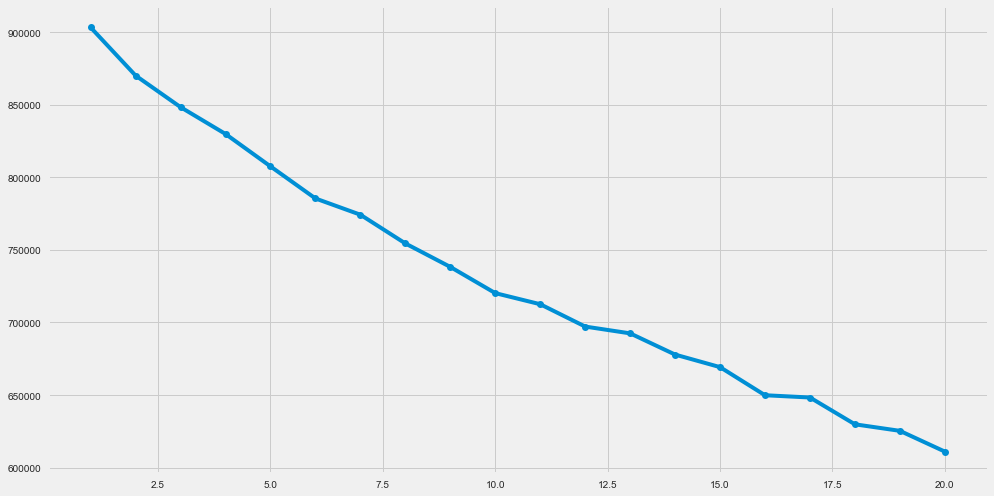

In [188]:
err = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i,random_state=1)
    kmeans.fit(X_scaled)
    err.append(kmeans.inertia_)
plt.plot(range(1,21),err,marker='o')
plt.show()

In [189]:
sil = 0
for i in range(2,21):
    kmean = KMeans(n_clusters=i,random_state=1)
    sil = silhouette_score(X_scaled,kmean.fit_predict(X_scaled))
    print("for cluster {} silhouette score: {:.4f}".format(i,sil))  

for cluster 2 silhouette score: 0.0655
for cluster 3 silhouette score: 0.0782
for cluster 4 silhouette score: 0.0585
for cluster 5 silhouette score: 0.0588
for cluster 6 silhouette score: 0.0664
for cluster 7 silhouette score: 0.0875
for cluster 8 silhouette score: 0.0288
for cluster 9 silhouette score: 0.0416
for cluster 10 silhouette score: 0.0672
for cluster 11 silhouette score: 0.0659
for cluster 12 silhouette score: 0.0557
for cluster 13 silhouette score: 0.0458
for cluster 14 silhouette score: 0.0565
for cluster 15 silhouette score: 0.0750
for cluster 16 silhouette score: 0.0687
for cluster 17 silhouette score: 0.0740
for cluster 18 silhouette score: 0.0872
for cluster 19 silhouette score: 0.0853
for cluster 20 silhouette score: 0.0797


In [190]:
# We can see that for k=7 silhouette score is highest so we will take 7 as intial clusters

In [191]:
km=KMeans(n_clusters=7,random_state=10)
km.fit(X_scaled)

KMeans(n_clusters=7, random_state=10)

In [192]:
df_online_shoppers_intention_k = X.copy()
df_online_shoppers_intention_k['Revenue'] = km.labels_

In [193]:
df_online_shoppers_intention_k.head()    

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Month_Aug  \
0         0.20       0.20        0.00        0.00        0          0   
1         0.00       0.10        0.00        0.00        0          0   
2         0.20       0.20        0.00        0.00        0          0   
3         0.05       0.14        0.00        0.00        0          0   
4         0.02       0.05        0.00        0.00        1          0   

   Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
0          0          1          0           0          0          0   
1          0          1          0           0          0          0   
2          0          1          0           0          0          0   
3          0          1          0           0          0          0   
4          0          1          0           0          0          0   

   Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  OperatingSystems_2  \
0          0          0          0                   1                   0   
1          0          0          0                   0                   1   
2          0          0          0                   0                   0   
3          0          0          0                   0                   0   
4          0          0          0                   0                   0   

   OperatingSystems_3  OperatingSystems_4  OperatingSystems_5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   OperatingSystems_6  OperatingSystems_7  OperatingSystems_8  Browser_1  \
0                   0                   0                   0          1   
1                   0                   0                   0          0   
2                   0                   0                   0          1   
3                   0                   0                   0          0   
4                   0                   0                   0          0   

   Browser_2  Browser_3  Browser_4  Browser_5  Browser_6  Browser_7  \
0          0          0          0          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          1          0          0          0          0   

   Browser_8  Browser_9  Browser_10  Browser_11  Browser_12  Browser_13  \
0          0          0           0           0           0           0   
1          0          0           0           0           0           0   
2          0          0           0           0           0           0   
3          0          0           0           0           0           0   
4          0          0           0           0           0           0   

   Region_1  Region_2  Region_3  Region_4  Region_5  Region_6  Region_7  \
0         1         0         0         0         0         0         0  

In [194]:
# Agglomerative Clustering

In [195]:
for i in ['single','complete','average','ward']:
    z=linkage(X_scaled,i)
    c,v=cophenet(z,pdist(X_scaled))
    print('for linkage ',i,'cophenet score:',c)

for linkage  single cophenet score: 0.9436569293495202
for linkage  complete cophenet score: 0.8918286825080984
for linkage  average cophenet score: 0.9627880551426786
for linkage  ward cophenet score: 0.3672960041744544


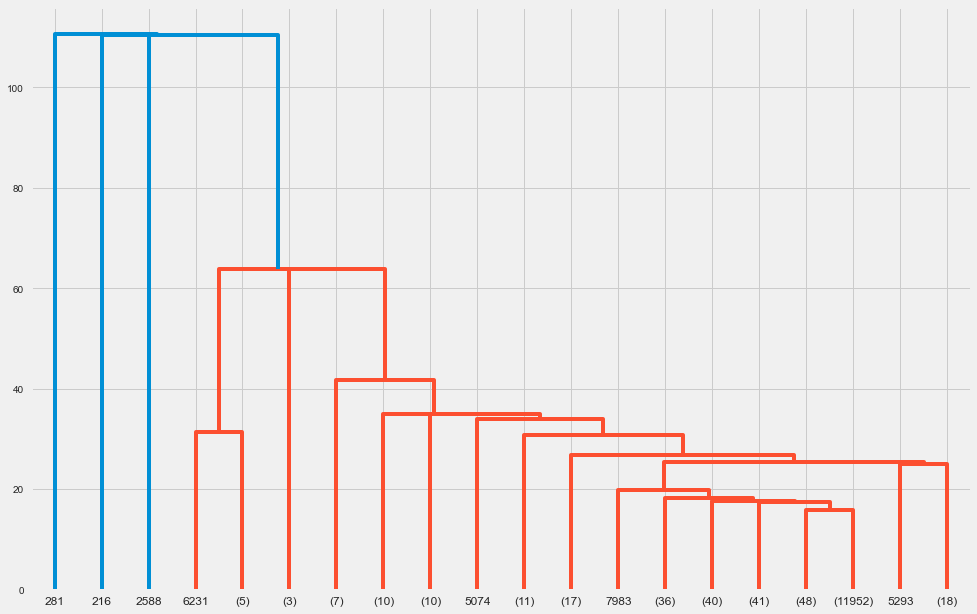

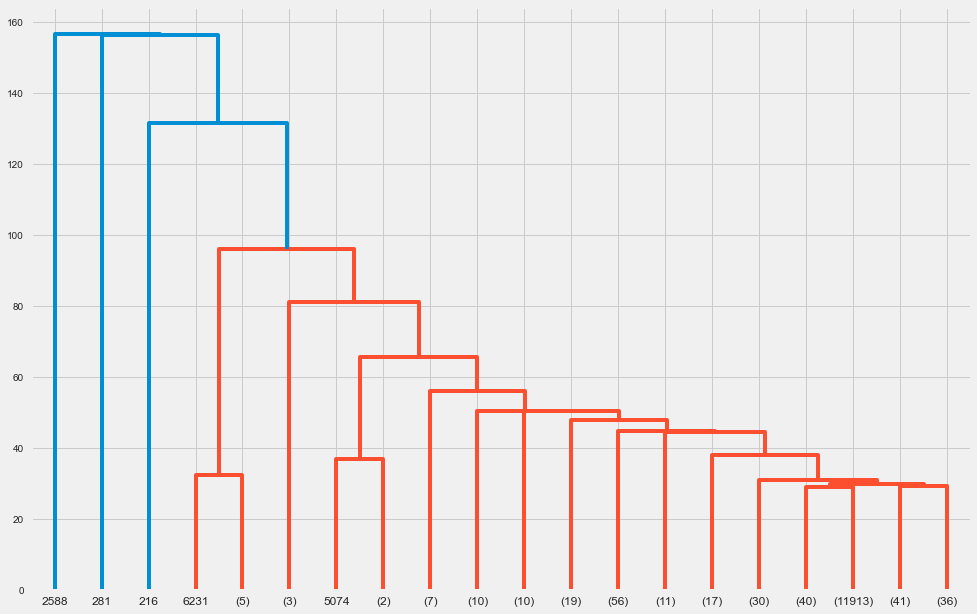

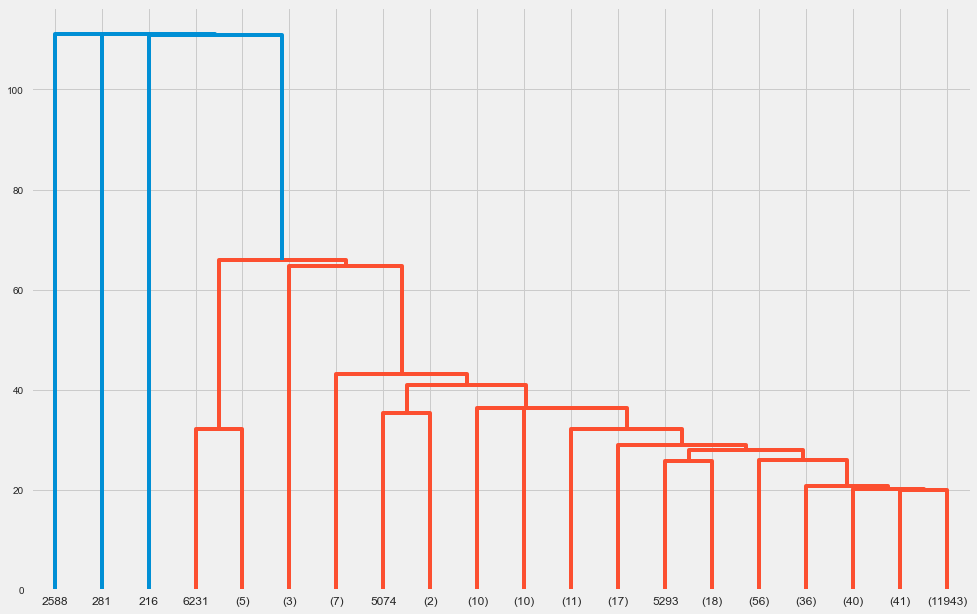

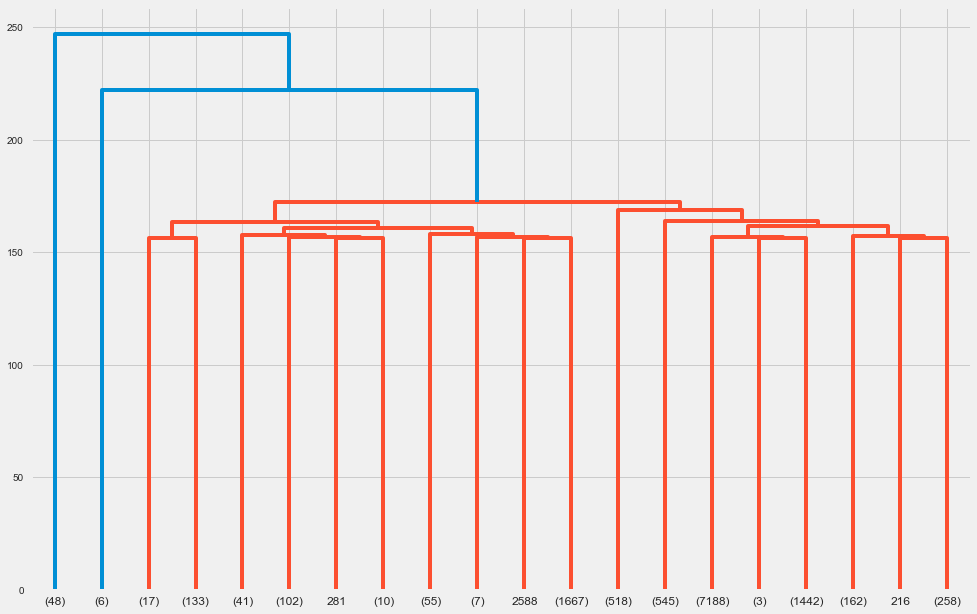

In [196]:

for i in ['single','complete','average','ward']:
    plt.figure(figsize=(15,10))
    z = linkage(X_scaled,i)
    dendrogram(z,p=20,truncate_mode='lastp')
    plt.show()

In [197]:
sil = 0
for i in range(2,21):
    agg = AgglomerativeClustering(n_clusters=i)
    sil = silhouette_score(X_scaled,agg.fit_predict(X_scaled))
    print("for cluster {} silhouette score: {:.4f}".format(i,sil))  

for cluster 2 silhouette score: 0.5989
for cluster 3 silhouette score: 0.6003
for cluster 4 silhouette score: 0.0990
for cluster 5 silhouette score: 0.0888
for cluster 6 silhouette score: 0.0885
for cluster 7 silhouette score: 0.0831
for cluster 8 silhouette score: 0.0885
for cluster 9 silhouette score: 0.0670
for cluster 10 silhouette score: 0.0475
for cluster 11 silhouette score: 0.0512
for cluster 12 silhouette score: 0.0575
for cluster 13 silhouette score: 0.0594
for cluster 14 silhouette score: 0.0540
for cluster 15 silhouette score: 0.0564
for cluster 16 silhouette score: 0.0576
for cluster 17 silhouette score: 0.0578
for cluster 18 silhouette score: 0.0605
for cluster 19 silhouette score: 0.0610
for cluster 20 silhouette score: 0.0584


In [198]:
agg=AgglomerativeClustering(n_clusters=3,linkage='ward')
agg.fit(X_scaled)

AgglomerativeClustering(n_clusters=3)

In [199]:
df_online_shoppers_intention_agg=X.copy()


In [200]:
df_online_shoppers_intention_agg['Revenue']=agg.labels_

In [201]:
df_online_shoppers_intention_agg.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Month_Aug  \
0         0.20       0.20        0.00        0.00        0          0   
1         0.00       0.10        0.00        0.00        0          0   
2         0.20       0.20        0.00        0.00        0          0   
3         0.05       0.14        0.00        0.00        0          0   
4         0.02       0.05        0.00        0.00        1          0   

   Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
0          0          1          0           0          0          0   
1          0          1          0           0          0          0   
2          0          1          0           0          0          0   
3          0          1          0           0          0          0   
4          0          1          0           0          0          0   

   Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  OperatingSystems_2  \
0          0          0          0                   1                   0   
1          0          0          0                   0                   1   
2          0          0          0                   0                   0   
3          0          0          0                   0                   0   
4          0          0          0                   0                   0   

   OperatingSystems_3  OperatingSystems_4  OperatingSystems_5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   OperatingSystems_6  OperatingSystems_7  OperatingSystems_8  Browser_1  \
0                   0                   0                   0          1   
1                   0                   0                   0          0   
2                   0                   0                   0          1   
3                   0                   0                   0          0   
4                   0                   0                   0          0   

   Browser_2  Browser_3  Browser_4  Browser_5  Browser_6  Browser_7  \
0          0          0          0          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          1          0          0          0          0   

   Browser_8  Browser_9  Browser_10  Browser_11  Browser_12  Browser_13  \
0          0          0           0           0           0           0   
1          0          0           0           0           0           0   
2          0          0           0           0           0           0   
3          0          0           0           0           0           0   
4          0          0           0           0           0           0   

   Region_1  Region_2  Region_3  Region_4  Region_5  Region_6  Region_7  \
0         1         0         0         0         0         0         0  

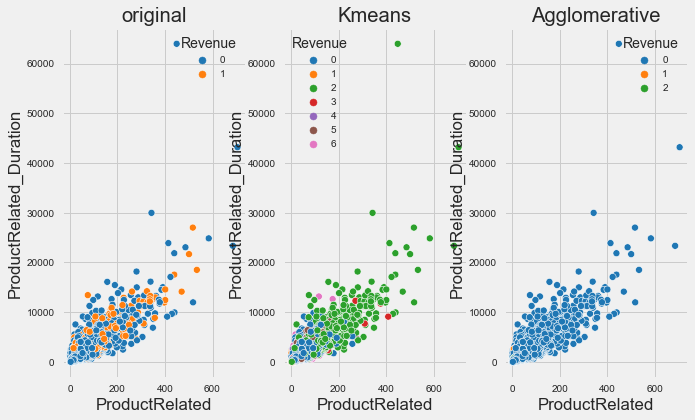

In [202]:
plt.figure(figsize=(10,6))
ax=plt.subplot(1,3,1)
sns.scatterplot(x=df_online_shoppers_intention_copy['ProductRelated'],y=df_online_shoppers_intention_copy['ProductRelated_Duration'],hue=y,palette='tab10',ax=ax)
plt.title('original')
ax1=plt.subplot(1,3,2)
sns.scatterplot(x=df_online_shoppers_intention_k['ProductRelated'],y=df_online_shoppers_intention_k['ProductRelated_Duration'],hue=df_online_shoppers_intention_k['Revenue'],palette='tab10',ax=ax1)
plt.title('Kmeans')
ax2=plt.subplot(1,3,3)
sns.scatterplot(x=df_online_shoppers_intention_agg['ProductRelated'],y=df_online_shoppers_intention_agg['ProductRelated_Duration'],hue=df_online_shoppers_intention_agg['Revenue'],palette='tab10',ax=ax2)
plt.title('Agglomerative')
plt.show()

In [203]:
cov_mat=np.cov(X_scaled.T)
eig_val,eig_vec=np.linalg.eig(cov_mat)
eig_val

array([ 3.66377971e+00,  3.14432868e+00,  2.88910186e+00,  2.48408362e+00,
        2.04409264e+00,  1.99487236e+00,  1.91858728e+00,  8.30993596e-02,
        1.21756809e-01,  1.43020938e-01,  2.10355734e-01,  3.46977883e-01,
        3.68319517e-01,  4.16527963e-01,  1.53498899e+00,  4.89409466e-01,
        1.49070305e+00,  1.43772724e+00,  1.35446462e+00,  6.50403059e-01,
        1.31784962e+00,  6.90503819e-01,  1.27533460e+00,  7.36679403e-01,
        7.40895403e-01,  7.92773095e-01,  1.19849027e+00,  8.26090742e-01,
        8.48503601e-01,  1.17459837e+00,  1.16889488e+00,  1.15769276e+00,
        1.13773041e+00,  8.82626572e-01,  1.12755220e+00,  8.93372568e-01,
        9.07543890e-01,  9.11381298e-01,  1.10284079e+00,  1.09988206e+00,
        1.09637644e+00,  1.07891523e+00,  1.07386337e+00,  1.06926379e+00,
        9.42034282e-01,  1.05296118e+00,  1.04700132e+00,  9.48215445e-01,
        1.03911458e+00,  9.56477972e-01,  9.58389231e-01,  9.62904343e-01,
        9.65552123e-01,  

In [204]:
var_per=sorted(eig_val,reverse=True)/sum(eig_val)*100
var_per

array([ 4.95064801e+00,  4.24874467e+00,  3.90387182e+00,  3.35659471e+00,
        2.76206103e+00,  2.69555258e+00,  2.59247309e+00,  2.07413949e+00,
        2.01429852e+00,  1.94271546e+00,  1.83020763e+00,  1.78073194e+00,
        1.72328393e+00,  1.61944875e+00,  1.58716504e+00,  1.57945825e+00,
        1.56432150e+00,  1.53734756e+00,  1.52359434e+00,  1.49020329e+00,
        1.48620533e+00,  1.48146840e+00,  1.45787410e+00,  1.45104781e+00,
        1.44483267e+00,  1.42280393e+00,  1.41475073e+00,  1.40409384e+00,
        1.39788267e+00,  1.39123470e+00,  1.38799174e+00,  1.36941071e+00,
        1.36339018e+00,  1.35905835e+00,  1.35579713e+00,  1.35121012e+00,
        1.34666270e+00,  1.34153895e+00,  1.33275759e+00,  1.32759428e+00,
        1.32299682e+00,  1.32005111e+00,  1.30469326e+00,  1.30111547e+00,
        1.29501447e+00,  1.29243190e+00,  1.28126724e+00,  1.27291500e+00,
        1.23149544e+00,  1.22631018e+00,  1.20716131e+00,  1.19264089e+00,
        1.14653254e+00,  

In [205]:
cum_per=np.cumsum(var_per)
cum_per

array([  4.95064801,   9.19939268,  13.1032645 ,  16.45985921,
        19.22192024,  21.91747282,  24.50994591,  26.5840854 ,
        28.59838392,  30.54109938,  32.37130701,  34.15203895,
        35.87532288,  37.49477163,  39.08193667,  40.66139493,
        42.22571643,  43.76306398,  45.28665833,  46.77686161,
        48.26306695,  49.74453534,  51.20240944,  52.65345725,
        54.09828993,  55.52109386,  56.93584459,  58.33993843,
        59.7378211 ,  61.1290558 ,  62.51704754,  63.88645825,
        65.24984843,  66.60890678,  67.96470391,  69.31591403,
        70.66257673,  72.00411568,  73.33687328,  74.66446756,
        75.98746438,  77.30751549,  78.61220875,  79.91332422,
        81.20833869,  82.50077059,  83.78203782,  85.05495282,
        86.28644826,  87.51275844,  88.71991975,  89.91256063,
        91.05909317,  92.17534055,  93.24656777,  94.24769574,
        95.24312688,  96.17616369,  97.05501473,  97.71632469,
        98.2791542 ,  98.77684249,  99.2456931 ,  99.52

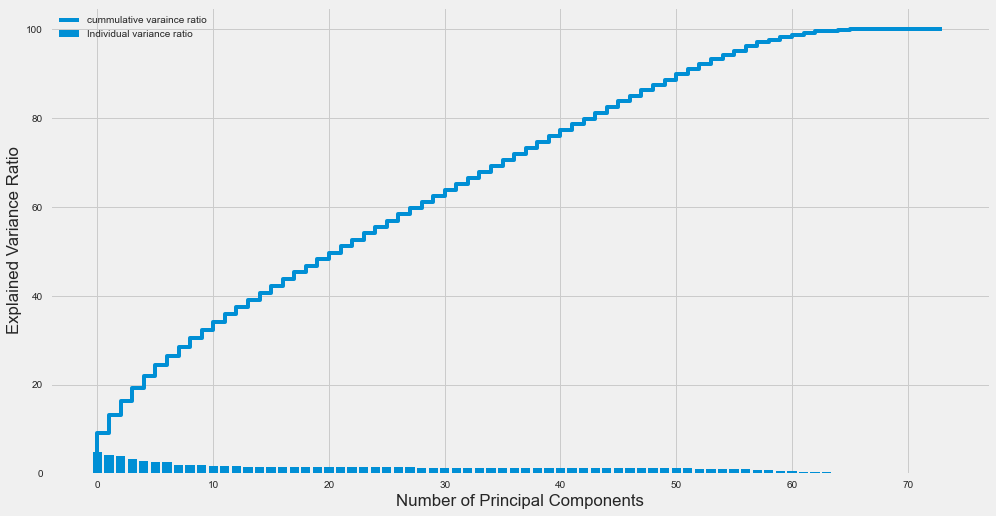

In [240]:
plt.bar(range(len(var_per)),var_per,label='Individual variance ratio')
plt.step(range(len(cum_per)),cum_per,label='cummulative varaince ratio')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.legend()
plt.show()

In [207]:
pca=PCA()
pca.fit(X_scaled)

PCA()

In [208]:
pca.explained_variance_ratio_

array([4.95064801e-02, 4.24874467e-02, 3.90387182e-02, 3.35659471e-02,
       2.76206103e-02, 2.69555258e-02, 2.59247309e-02, 2.07413949e-02,
       2.01429852e-02, 1.94271546e-02, 1.83020763e-02, 1.78073194e-02,
       1.72328393e-02, 1.61944875e-02, 1.58716504e-02, 1.57945825e-02,
       1.56432150e-02, 1.53734756e-02, 1.52359434e-02, 1.49020329e-02,
       1.48620533e-02, 1.48146840e-02, 1.45787410e-02, 1.45104781e-02,
       1.44483267e-02, 1.42280393e-02, 1.41475073e-02, 1.40409384e-02,
       1.39788267e-02, 1.39123470e-02, 1.38799174e-02, 1.36941071e-02,
       1.36339018e-02, 1.35905835e-02, 1.35579713e-02, 1.35121012e-02,
       1.34666270e-02, 1.34153895e-02, 1.33275759e-02, 1.32759428e-02,
       1.32299682e-02, 1.32005111e-02, 1.30469326e-02, 1.30111547e-02,
       1.29501447e-02, 1.29243190e-02, 1.28126724e-02, 1.27291500e-02,
       1.23149544e-02, 1.22631018e-02, 1.20716131e-02, 1.19264089e-02,
       1.14653254e-02, 1.11624738e-02, 1.07122722e-02, 1.00112797e-02,
      

In [209]:
np.cumsum(pca.explained_variance_ratio_*100)

array([  4.95064801,   9.19939268,  13.1032645 ,  16.45985921,
        19.22192024,  21.91747282,  24.50994591,  26.5840854 ,
        28.59838392,  30.54109938,  32.37130701,  34.15203895,
        35.87532288,  37.49477163,  39.08193667,  40.66139493,
        42.22571643,  43.76306398,  45.28665833,  46.77686161,
        48.26306695,  49.74453534,  51.20240944,  52.65345725,
        54.09828993,  55.52109386,  56.93584459,  58.33993843,
        59.7378211 ,  61.1290558 ,  62.51704754,  63.88645825,
        65.24984843,  66.60890678,  67.96470391,  69.31591403,
        70.66257673,  72.00411568,  73.33687328,  74.66446756,
        75.98746438,  77.30751549,  78.61220875,  79.91332422,
        81.20833869,  82.50077059,  83.78203782,  85.05495282,
        86.28644826,  87.51275844,  88.71991975,  89.91256063,
        91.05909317,  92.17534055,  93.24656777,  94.24769574,
        95.24312688,  96.17616369,  97.05501473,  97.71632469,
        98.2791542 ,  98.77684249,  99.2456931 ,  99.52

In [210]:
pca=PCA(.95)
X_scaled_pca=pca.fit_transform(X_scaled)

In [211]:
df_online_shoppers_intention_pca=pd.DataFrame(X_scaled_pca)
df_online_shoppers_intention_pca.head()

0     1     2     3     4     5     6     7     8     9     10    11  \
0 -4.78 -0.37 -2.17  2.72  0.02  0.03 -1.64  1.84  2.95 -1.64 -0.53 -0.31   
1 -1.17 -0.77  0.62 -0.50 -0.20  0.66 -0.92  2.24 -0.11 -0.58 -1.35 -0.61   
2 -4.87  0.60 -0.99  2.94 -0.31  0.45 -0.83  2.32  2.52 -1.01 -0.86 -1.51   
3 -2.67 -1.45  0.85  0.88 -0.11 -0.85  1.07 -0.30  0.36 -0.76 -0.26 -0.57   
4 -2.26 -0.70 -0.51  0.80  0.02 -1.49  1.71  0.15 -1.53 -2.71  0.48  2.14   

     12    13   14   15    16    17    18    19    20    21   22    23   24  \
0 -0.49  0.94 0.80 0.90 -0.30 -0.10  0.07 -0.69  0.97  0.48 2.07 -0.88 1.51   
1  0.11  0.58 2.21 1.78 -0.38 -0.46 -0.30 -0.93  0.86 -0.33 1.74 -0.53 0.93   
2  3.41 -0.57 1.16 0.23 -1.97  0.78  0.49 -2.25 -0.39  0.39 2.55 -0.94 0.52   
3  1.11 -0.40 0.42 2.13 -1.28  0.48 -2.71 -0.50  1.10 -0.60 2.10 -1.36 0.78   
4  3.07  3.98 0.13 6.82 -1.46  1.85 -2.11 -2.94  1.87  0.64 0.16 -0.35 0.90   

     25    26    27    28   29    30    31    32   33    34    35    36    37  \
0  0.32 -2.77 -0.21 -0.46 1.45 -0.22 -0.61  0.98 1.07 -0.69 -0.16 -0.86 -1.32   
1  0.36 -2.90  0.16 -0.65 1.09 -0.43 -0.50  1.25 0.93 -0.69 -0.22 -0.77 -1.22   
2 -1.01 -2.67  3.08 -0.35 2.19 -0.24 -1.08 -0.05 1.67  0.30 -0.50 -1.02 -0.49   
3  0.66 -3.12  0.38 -1.05 1.78 -0.84 -0.57  1.21 0.90 -0.56 -0.53 -0.65 -1.58   
4 -1.02 -2.58 -1.16  0.65 2.02 -1.01 -0.43  1.39 1.01 -1.38 -0.40 -1.96 -1.51   

     38    39   40   41    42    43    44    45    46    47   48    49    50  \
0 -0.03 -1.17 2.71 0.90 -1.62  0.70  0.04 -0.74 -1.46 -0.00 2.99 -1.57 -0.81   
1 -0.05 -0.78 2.57 0.53 -1.61  0.98  0.26 -0.79 -1.35  0.22 2.24 -2.57 -1.30   
2 -0.46 -0.83 2.20 0.35 -1.21 -1.17 -1.30 -0.12 -1.99  2.62 1.33 -1.59 -1.66   
3  0.31 -0.98 2.96 0.97 -2.37  0.89  1.00 -0.47 -1.71  0.60 1.99 -1.92 -1.28   
4 -0.78 -0.04 2.95 0.05 -2.20  0.78  1.16 -0.26 -0.39 -0.54 1.19 -0.05  1.02   

     51    52    53    54    55    56  
0 -1.83 -0.51 -0.07 -0.35 -0.77 -0.72  
1 -2.40 -0.33  0.19  0.52 -0.24  0.06  
2 -3.34 -2.72  0.12 -0.60 -0.01 -0.33  
3 -2.33  0.59  0.34 -0.81  0.85 -1.29  
4 -4.33 -1.42 -1.09  2.52 -2.39  1.69

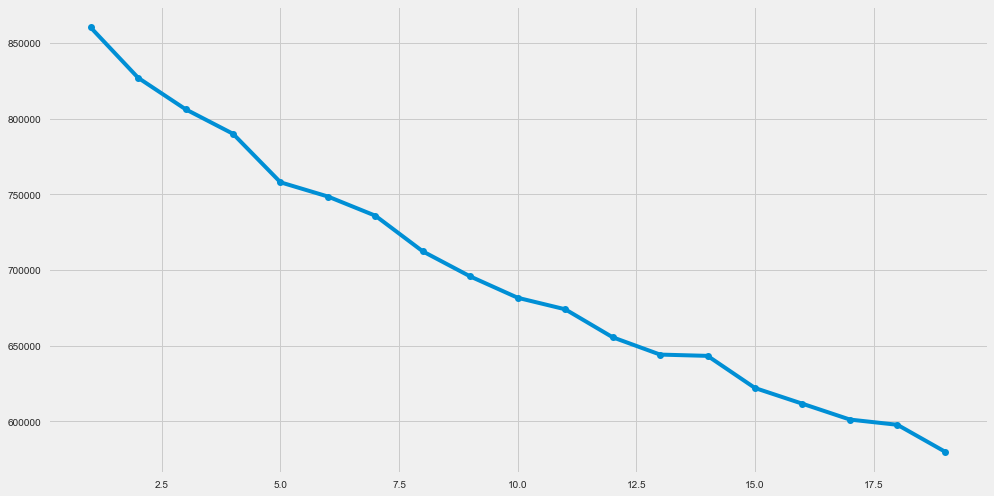

In [212]:
#optimal no of cluster
err=[]
for i in range(1,20):
    km=KMeans(i,random_state=10)
    km.fit(df_online_shoppers_intention_pca)
    err.append(km.inertia_)
plt.plot(range(1,20),err,marker='o')
plt.show()

In [213]:
for i in range(2,15):
    km=KMeans(i,random_state=10)
    sil=silhouette_score(df_online_shoppers_intention_pca,km.fit_predict(df_online_shoppers_intention_pca))
    print('for cluster {} silhoutte score: {:.4f}'.format(i,sil))

for cluster 2 silhoutte score: 0.0869
for cluster 3 silhoutte score: 0.0649
for cluster 4 silhoutte score: 0.0531
for cluster 5 silhoutte score: 0.0702
for cluster 6 silhoutte score: 0.0832
for cluster 7 silhoutte score: 0.0764
for cluster 8 silhoutte score: 0.0805
for cluster 9 silhoutte score: 0.0570
for cluster 10 silhoutte score: 0.0636
for cluster 11 silhoutte score: 0.0583
for cluster 12 silhoutte score: 0.0597
for cluster 13 silhoutte score: 0.0829
for cluster 14 silhoutte score: 0.0582


In [214]:
km=KMeans(3,random_state=10)
km.fit(df_online_shoppers_intention_pca)

KMeans(n_clusters=3, random_state=10)

In [215]:
df_online_shoppers_intention_k_pca=df_online_shoppers_intention_pca.copy()

In [216]:
df_online_shoppers_intention_k_pca['Revenue']=km.labels_
df_online_shoppers_intention_k_pca.head()

0     1     2     3     4     5     6     7     8     9    10    11  \
0 -4.78 -0.37 -2.17  2.72  0.02  0.03 -1.64  1.84  2.95 -1.64 -0.53 -0.31   
1 -1.17 -0.77  0.62 -0.50 -0.20  0.66 -0.92  2.24 -0.11 -0.58 -1.35 -0.61   
2 -4.87  0.60 -0.99  2.94 -0.31  0.45 -0.83  2.32  2.52 -1.01 -0.86 -1.51   
3 -2.67 -1.45  0.85  0.88 -0.11 -0.85  1.07 -0.30  0.36 -0.76 -0.26 -0.57   
4 -2.26 -0.70 -0.51  0.80  0.02 -1.49  1.71  0.15 -1.53 -2.71  0.48  2.14   

     12    13   14   15    16    17    18    19    20    21   22    23   24  \
0 -0.49  0.94 0.80 0.90 -0.30 -0.10  0.07 -0.69  0.97  0.48 2.07 -0.88 1.51   
1  0.11  0.58 2.21 1.78 -0.38 -0.46 -0.30 -0.93  0.86 -0.33 1.74 -0.53 0.93   
2  3.41 -0.57 1.16 0.23 -1.97  0.78  0.49 -2.25 -0.39  0.39 2.55 -0.94 0.52   
3  1.11 -0.40 0.42 2.13 -1.28  0.48 -2.71 -0.50  1.10 -0.60 2.10 -1.36 0.78   
4  3.07  3.98 0.13 6.82 -1.46  1.85 -2.11 -2.94  1.87  0.64 0.16 -0.35 0.90   

     25    26    27    28   29    30    31    32   33    34    35    36    37  \
0  0.32 -2.77 -0.21 -0.46 1.45 -0.22 -0.61  0.98 1.07 -0.69 -0.16 -0.86 -1.32   
1  0.36 -2.90  0.16 -0.65 1.09 -0.43 -0.50  1.25 0.93 -0.69 -0.22 -0.77 -1.22   
2 -1.01 -2.67  3.08 -0.35 2.19 -0.24 -1.08 -0.05 1.67  0.30 -0.50 -1.02 -0.49   
3  0.66 -3.12  0.38 -1.05 1.78 -0.84 -0.57  1.21 0.90 -0.56 -0.53 -0.65 -1.58   
4 -1.02 -2.58 -1.16  0.65 2.02 -1.01 -0.43  1.39 1.01 -1.38 -0.40 -1.96 -1.51   

     38    39   40   41    42    43    44    45    46    47   48    49    50  \
0 -0.03 -1.17 2.71 0.90 -1.62  0.70  0.04 -0.74 -1.46 -0.00 2.99 -1.57 -0.81   
1 -0.05 -0.78 2.57 0.53 -1.61  0.98  0.26 -0.79 -1.35  0.22 2.24 -2.57 -1.30   
2 -0.46 -0.83 2.20 0.35 -1.21 -1.17 -1.30 -0.12 -1.99  2.62 1.33 -1.59 -1.66   
3  0.31 -0.98 2.96 0.97 -2.37  0.89  1.00 -0.47 -1.71  0.60 1.99 -1.92 -1.28   
4 -0.78 -0.04 2.95 0.05 -2.20  0.78  1.16 -0.26 -0.39 -0.54 1.19 -0.05  1.02   

     51    52    53    54    55    56  Revenue  
0 -1.83 -0.51 -0.07 -0.35 -0.77 -0.72        1  
1 -2.40 -0.33  0.19  0.52 -0.24  0.06        0  
2 -3.34 -2.72  0.12 -0.60 -0.01 -0.33        1  
3 -2.33  0.59  0.34 -0.81  0.85 -1.29        2  
4 -4.33 -1.42 -1.09  2.52 -2.39  1.69        2

In [217]:
for i in ['single','complete','average','ward']:
    z=linkage(df_online_shoppers_intention_pca,i)
    c,v=cophenet(z,pdist(df_online_shoppers_intention_pca))
    print('for linkage ',i,'cophenet score:',c)
    

for linkage  single cophenet score: 0.9159593706520498
for linkage  complete cophenet score: 0.8772395549747122
for linkage  average cophenet score: 0.9607867691755242
for linkage  ward cophenet score: 0.367094954032027


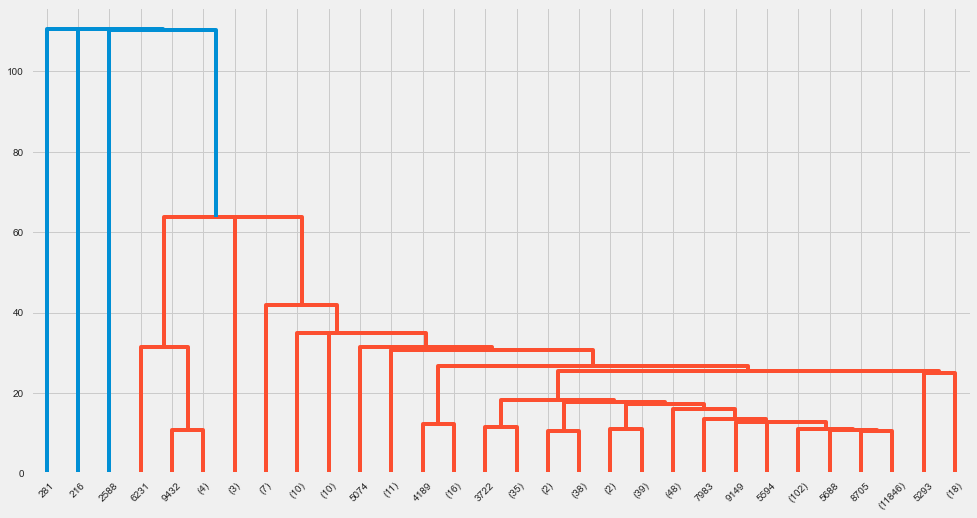

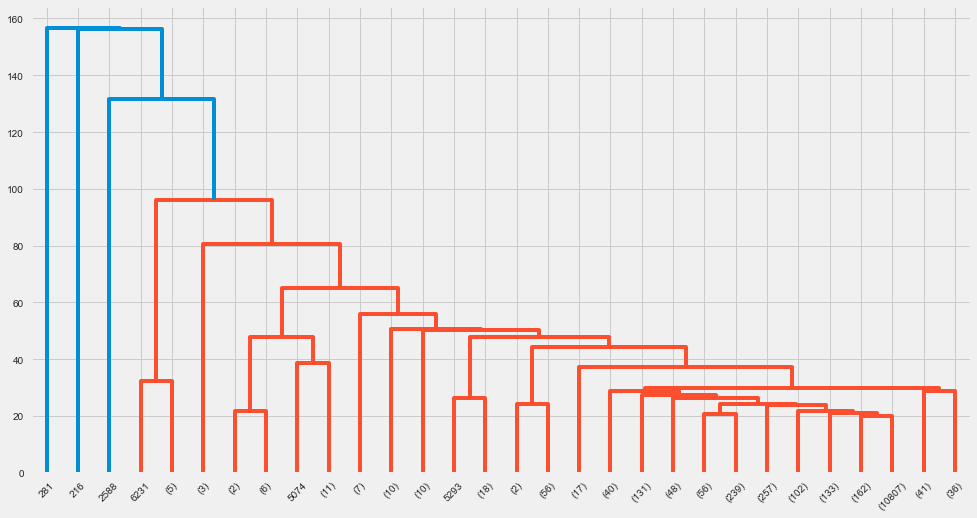

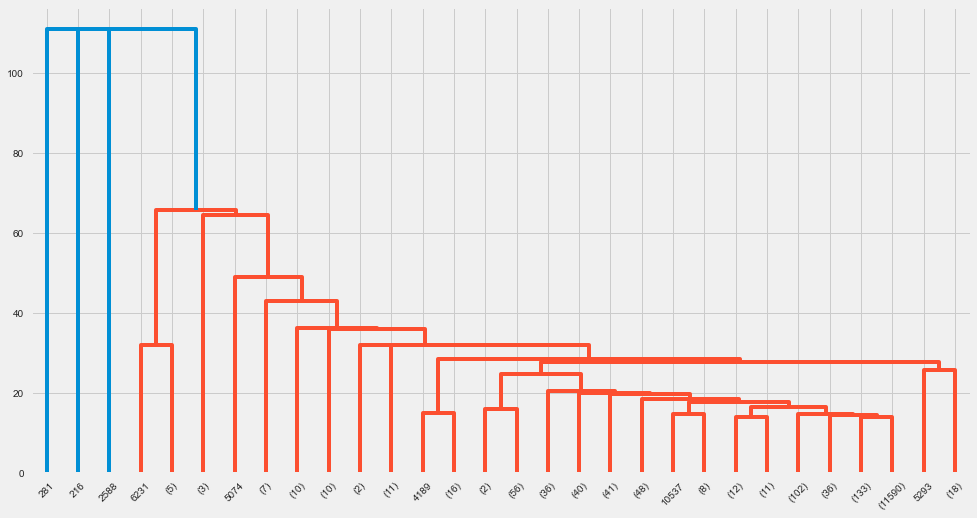

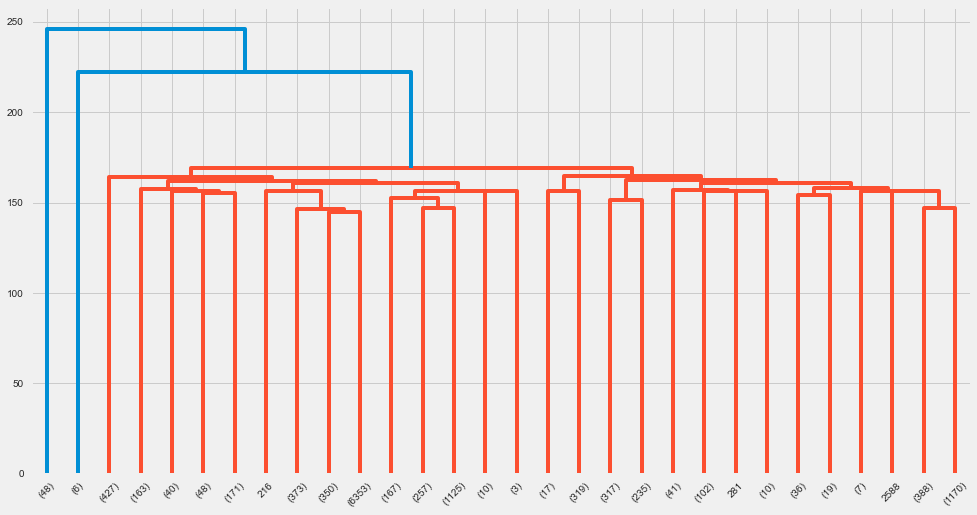

In [218]:
for i in ['single','complete','average','ward']:
    z=linkage(df_online_shoppers_intention_pca,i)
    dendrogram(z,p=30,truncate_mode='lastp')
    plt.show()

In [219]:
agg=AgglomerativeClustering(n_clusters=3,linkage='ward')
agg.fit(X_scaled)

AgglomerativeClustering(n_clusters=3)

In [220]:
df_online_shoppers_intention_agg_pca=df_online_shoppers_intention_pca.copy()

In [221]:
df_online_shoppers_intention_agg_pca['Revenue']=agg.labels_

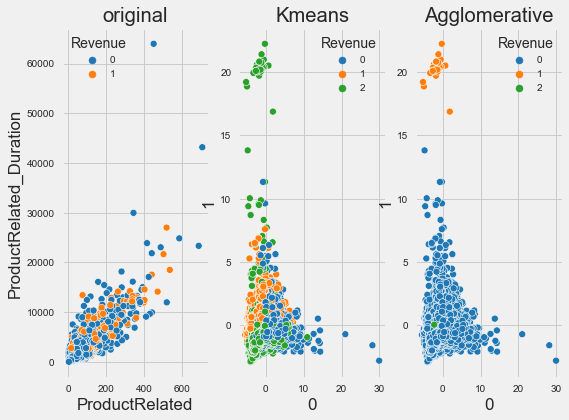

In [222]:
plt.figure(figsize=(8,6))
ax=plt.subplot(1,3,1)
sns.scatterplot(x=df_online_shoppers_intention_copy['ProductRelated'],y=df_online_shoppers_intention_copy['ProductRelated_Duration'],hue=y,palette='tab10',ax=ax)
plt.title('original')
ax1=plt.subplot(1,3,2)
sns.scatterplot(x=df_online_shoppers_intention_k_pca[0],y=df_online_shoppers_intention_k_pca[1],hue=df_online_shoppers_intention_k_pca['Revenue'],palette='tab10',ax=ax1)
plt.title('Kmeans')
ax2=plt.subplot(1,3,3)
sns.scatterplot(x=df_online_shoppers_intention_agg_pca[0],y=df_online_shoppers_intention_agg_pca[1],hue=df_online_shoppers_intention_agg_pca['Revenue'],palette='tab10',ax=ax2)
plt.title('Agglomerative')
plt.show()

In [223]:
df_online_shoppers_intention_copy2.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Revenue  \
0         0.20       0.20        0.00        0.00        0        0   
1         0.00       0.10        0.00        0.00        0        0   
2         0.20       0.20        0.00        0.00        0        0   
3         0.05       0.14        0.00        0.00        0        0   
4         0.02       0.05        0.00        0.00        1        0   

   Month_Aug  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  \
0          0          0          1          0           0          0   
1          0          0          1          0           0          0   
2          0          0          1          0           0          0   
3          0          0          1          0           0          0   
4          0          0          1          0           0          0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  \
0          0          0          0          0                   1   
1          0          0          0          0                   0   
2          0          0          0          0                   0   
3          0          0          0          0                   0   
4          0          0          0          0                   0   

   OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   0                   1   
3                   0                   1                   0   
4                   0                   1                   0   

   OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_8  Browser_1  Browser_2  Browser_3  Browser_4  Browser_5  \
0                   0          1          0          0          0          0   
1                   0          0          1          0          0          0   
2                   0          1          0          0          0          0   
3                   0          0          1          0          0          0   
4                   0          0          0          1          0          0   

   Browser_6  Browser_7  Browser_8  Browser_9  Browser_10  Browser_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Browser_12  Browser_13  Region_1  Region_2  Region_3  Region_4  Region_5  \
0           0           0         1         0         0         0         0   
1           0           0         1         0         0         0         0   
2

In [241]:
df_online_shoppers_intention_k_pca.head()

0     1     2     3     4     5     6     7     8     9    10    11  \
0 -4.78 -0.37 -2.17  2.72  0.02  0.03 -1.64  1.84  2.95 -1.64 -0.53 -0.31   
1 -1.17 -0.77  0.62 -0.50 -0.20  0.66 -0.92  2.24 -0.11 -0.58 -1.35 -0.61   
2 -4.87  0.60 -0.99  2.94 -0.31  0.45 -0.83  2.32  2.52 -1.01 -0.86 -1.51   
3 -2.67 -1.45  0.85  0.88 -0.11 -0.85  1.07 -0.30  0.36 -0.76 -0.26 -0.57   
4 -2.26 -0.70 -0.51  0.80  0.02 -1.49  1.71  0.15 -1.53 -2.71  0.48  2.14   

     12    13   14   15    16    17    18    19    20    21   22    23   24  \
0 -0.49  0.94 0.80 0.90 -0.30 -0.10  0.07 -0.69  0.97  0.48 2.07 -0.88 1.51   
1  0.11  0.58 2.21 1.78 -0.38 -0.46 -0.30 -0.93  0.86 -0.33 1.74 -0.53 0.93   
2  3.41 -0.57 1.16 0.23 -1.97  0.78  0.49 -2.25 -0.39  0.39 2.55 -0.94 0.52   
3  1.11 -0.40 0.42 2.13 -1.28  0.48 -2.71 -0.50  1.10 -0.60 2.10 -1.36 0.78   
4  3.07  3.98 0.13 6.82 -1.46  1.85 -2.11 -2.94  1.87  0.64 0.16 -0.35 0.90   

     25    26    27    28   29    30    31    32   33    34    35    36    37  \
0  0.32 -2.77 -0.21 -0.46 1.45 -0.22 -0.61  0.98 1.07 -0.69 -0.16 -0.86 -1.32   
1  0.36 -2.90  0.16 -0.65 1.09 -0.43 -0.50  1.25 0.93 -0.69 -0.22 -0.77 -1.22   
2 -1.01 -2.67  3.08 -0.35 2.19 -0.24 -1.08 -0.05 1.67  0.30 -0.50 -1.02 -0.49   
3  0.66 -3.12  0.38 -1.05 1.78 -0.84 -0.57  1.21 0.90 -0.56 -0.53 -0.65 -1.58   
4 -1.02 -2.58 -1.16  0.65 2.02 -1.01 -0.43  1.39 1.01 -1.38 -0.40 -1.96 -1.51   

     38    39   40   41    42    43    44    45    46    47   48    49    50  \
0 -0.03 -1.17 2.71 0.90 -1.62  0.70  0.04 -0.74 -1.46 -0.00 2.99 -1.57 -0.81   
1 -0.05 -0.78 2.57 0.53 -1.61  0.98  0.26 -0.79 -1.35  0.22 2.24 -2.57 -1.30   
2 -0.46 -0.83 2.20 0.35 -1.21 -1.17 -1.30 -0.12 -1.99  2.62 1.33 -1.59 -1.66   
3  0.31 -0.98 2.96 0.97 -2.37  0.89  1.00 -0.47 -1.71  0.60 1.99 -1.92 -1.28   
4 -0.78 -0.04 2.95 0.05 -2.20  0.78  1.16 -0.26 -0.39 -0.54 1.19 -0.05  1.02   

     51    52    53    54    55    56  Revenue  
0 -1.83 -0.51 -0.07 -0.35 -0.77 -0.72        1  
1 -2.40 -0.33  0.19  0.52 -0.24  0.06        0  
2 -3.34 -2.72  0.12 -0.60 -0.01 -0.33        1  
3 -2.33  0.59  0.34 -0.81  0.85 -1.29        2  
4 -4.33 -1.42 -1.09  2.52 -2.39  1.69        2

In [224]:
X=df_online_shoppers_intention_copy2.drop(columns='Revenue')
Y=df_online_shoppers_intention_copy2.Revenue

In [225]:
X=df_online_shoppers_intention_k_pca.drop(columns='Revenue')
Y=df_online_shoppers_intention_k_pca.Revenue

In [226]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [228]:
rf1=RandomForestClassifier()
kf1=KFold(n_splits=5,shuffle=True,random_state=10)
score=cross_val_score(rf1,x_train,y_train,cv=kf1,scoring='f1_weighted')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score,ddof=1))

[0.98099048 0.98207306 0.98102134 0.98463365 0.98873244]
bias error 0.016509805471823902
variance error 0.003284081478161763


In [229]:
params1={'n_estimators':range(1,100),'criterion':['gini','entropy']}
kf1=KFold(n_splits=5,shuffle=True,random_state=10)
gd1=GridSearchCV(RandomForestClassifier(),params1,cv=kf1,scoring='roc_auc')
gd1.fit(x_train,y_train)
gd1.best_params_

{'criterion': 'gini', 'n_estimators': 1}

In [252]:
rf2=RandomForestClassifier(n_estimators=gd1.best_params_['n_estimators'],criterion=gd1.best_params_['criterion'])
kf=KFold(n_splits=5,shuffle=True,random_state=10)
score=cross_val_score(rf2,x_train,y_train,cv=kf,scoring='roc_auc')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score,ddof=1))

[nan nan nan nan nan]
bias error nan
variance error nan


In [231]:
params2={'n_estimators':range(1,100),'criterion':['gini','entropy']}
kf2=KFold(n_splits=5,shuffle=True,random_state=10)
gd=GridSearchCV(RandomForestClassifier(),params2,cv=kf2,scoring='f1_weighted')
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini', 'n_estimators': 66}

In [253]:
rf2=RandomForestClassifier(n_estimators=gd.best_params_['n_estimators'],criterion=gd.best_params_['criterion'])
kf2=KFold(n_splits=5,shuffle=True,random_state=10)
score=cross_val_score(rf2,x_train,y_train,cv=kf2,scoring='f1_weighted')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score,ddof=1))

[0.97998442 0.97952107 0.98153919 0.98360686 0.98719246]
bias error 0.017631199218084204
variance error 0.0031338318773179645


In [233]:
rf1.fit(x_train,y_train)

RandomForestClassifier()

In [254]:
y_pred1 = rf1.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1314
           1       0.99      0.99      0.99       562
           2       0.99      0.98      0.98       565

    accuracy                           0.99      2441
   macro avg       0.99      0.99      0.99      2441
weighted avg       0.99      0.99      0.99      2441



In [255]:
confusion_matrix(y_test,y_pred1)

array([[1303,    6,    5],
       [   5,  555,    2],
       [  10,    0,  555]], dtype=int64)

In [256]:
rf2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=66)

In [257]:
y_pred2 = rf2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1314
           1       0.99      0.98      0.99       562
           2       0.98      0.99      0.98       565

    accuracy                           0.99      2441
   macro avg       0.99      0.99      0.99      2441
weighted avg       0.99      0.99      0.99      2441



In [238]:
confusion_matrix(y_test,y_pred2)

array([[1302,    6,    6],
       [   6,  554,    2],
       [  10,    1,  554]], dtype=int64)

In [ ]:
# We can see that we able to improve the overall performance the model.

In [242]:
df_online_shoppers_intention_k['Revenue'].value_counts()

0    4383
6    2277
5    2258
2    2067
1     743
3     419
4      58
Name: Revenue, dtype: int64

In [243]:
df_online_shoppers_intention_agg['Revenue'].value_counts()

0    12151
1       48
2        6
Name: Revenue, dtype: int64

In [245]:
df_online_shoppers_intention_k_pca['Revenue'].value_counts()

0    6610
2    2840
1    2755
Name: Revenue, dtype: int64

In [250]:
df_online_shoppers_intention_final = df_online_shoppers_intention.copy()

In [260]:
df_online_shoppers_intention_final['Clusters'] = km.labels_

In [261]:
df_online_shoppers_intention_final.head()

Administrative  Administrative_Duration  Informational  \
0               0                     0.00              0   
1               0                     0.00              0   
2               0                     0.00              0   
3               0                     0.00              0   
4               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00               1                     0.00   
1                    0.00               2                    64.00   
2                    0.00               1                     0.00   
3                    0.00               2                     2.67   
4                    0.00              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20        0.00        0.00   Feb                 1   
1         0.00       0.10        0.00        0.00   Feb                 2   
2         0.20       0.20        0.00        0.00   Feb                 4   
3         0.05       0.14        0.00        0.00   Feb                 3   
4         0.02       0.05        0.00        0.00   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  Clusters  
0        1       1            1  Returning_Visitor    False    False         1  
1        2       1            2  Returning_Visitor    False    False         0  
2        1       9            3  Returning_Visitor    False    False         1  
3        2       2            4  Returning_Visitor    False    False         2  
4        3       1            4  Returning_Visitor     True    False         2

In [275]:
df_online_shoppers_intention_final['Clusters'].value_counts()

0    6610
2    2840
1    2755
Name: Clusters, dtype: int64

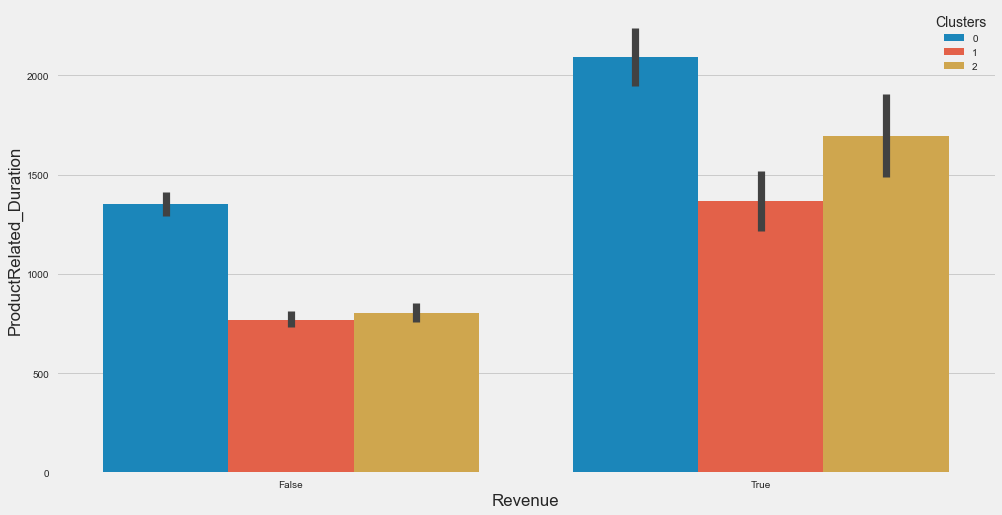

In [276]:
sns.barplot(data=df_online_shoppers_intention_final,x='Revenue',y='ProductRelated_Duration',hue='Clusters')
plt.show()

In [ ]:
# We can see that cluster 1 having maximum number of observation

In [262]:
df_1  = df_online_shoppers_intention_final[df_online_shoppers_intention_final['Clusters'] == 0]
df_1.head()

Administrative  Administrative_Duration  Informational  \
1               0                     0.00              0   
5               0                     0.00              0   
6               0                     0.00              0   
8               0                     0.00              0   
9               0                     0.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                    0.00               2                    64.00   
5                    0.00              19                   154.22   
6                    0.00               1                     0.00   
8                    0.00               2                    37.00   
9                    0.00               3                   738.00   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1         0.00       0.10        0.00        0.00   Feb                 2   
5         0.02       0.02        0.00        0.00   Feb                 2   
6         0.20       0.20        0.00        0.40   Feb                 2   
8         0.00       0.10        0.00        0.80   Feb                 2   
9         0.00       0.02        0.00        0.40   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  Clusters  
1        2       1            2  Returning_Visitor    False    False         0  
5        2       1            3  Returning_Visitor    False    False         0  
6        4       3            3  Returning_Visitor    False    False         0  
8        2       2            3  Returning_Visitor    False    False         0  
9        4       1            2  Returning_Visitor    False    False         0

In [271]:
df_1.describe().T

count    mean     std  min    25%    50%     75%  \
Administrative          6610.00    2.49    3.45 0.00   0.00   1.00    4.00   
Administrative_Duration 6610.00   80.86  182.32 0.00   0.00  14.00   87.00   
Informational           6610.00    0.53    1.31 0.00   0.00   0.00    0.00   
Informational_Duration  6610.00   39.92  157.85 0.00   0.00   0.00    0.00   
ProductRelated          6610.00   38.86   52.52 0.00  10.00  22.00   46.00   
ProductRelated_Duration 6610.00 1486.24 2310.93 0.00 267.65 781.11 1793.11   
BounceRates             6610.00    0.01    0.03 0.00   0.00   0.00    0.01   
ExitRates               6610.00    0.03    0.03 0.00   0.01   0.02    0.04   
PageValues              6610.00    7.10   20.35 0.00   0.00   0.00    1.82   
SpecialDay              6610.00    0.06    0.20 0.00   0.00   0.00    0.00   
OperatingSystems        6610.00    2.04    0.35 1.00   2.00   2.00    2.00   
Browser                 6610.00    2.75    1.63 1.00   2.00   2.00    2.00   
Region                  6610.00    3.21    2.44 1.00   1.00   3.00    4.00   
TrafficType             6610.00    3.62    3.60 1.00   2.00   2.00    4.00   
Clusters                6610.00    0.00    0.00 0.00   0.00   0.00    0.00   

                             max  
Administrative             27.00  
Administrative_Duration  3398.75  
Informational              24.00  
Informational_Duration   2549.38  
ProductRelated            705.00  
ProductRelated_Duration 63973.52  
BounceRates                 0.20  
ExitRates                   0.20  
PageValues                361.76  
SpecialDay                  1.00  
OperatingSystems            8.00  
Browser                    13.00  
Region                      9.00  
TrafficType                20.00  
Clusters                    0.00

In [269]:
df_1.describe(exclude=np.number)

Month        VisitorType Weekend Revenue
count   6610               6610    6610    6610
unique    10                  3       2       2
top      May  Returning_Visitor   False   False
freq    1870               5640    5358    5395

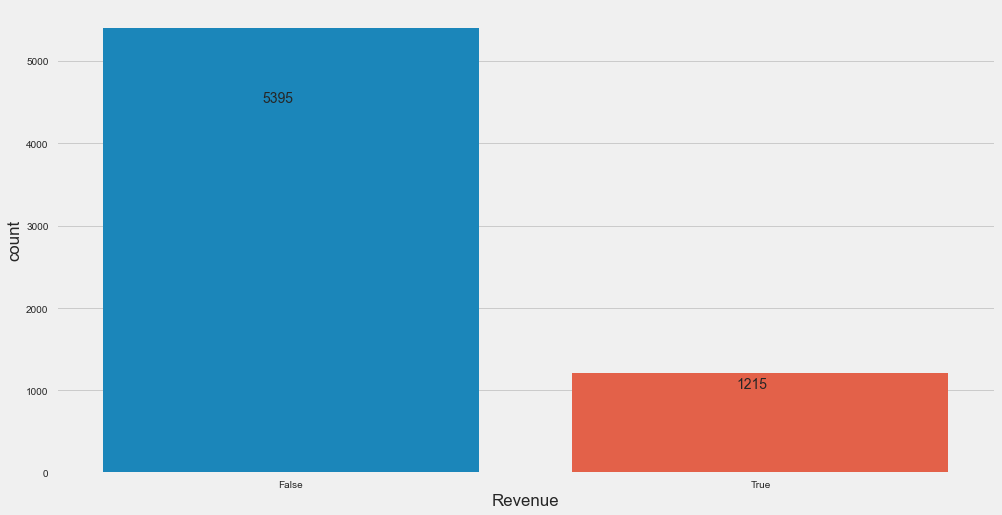

In [300]:
sns.countplot(data=df_1,x='Revenue')
plt.text(x=-0.06,y=4500,s=df_1['Revenue'].value_counts()[0])
plt.text(x=0.95,y=1025,s=df_1['Revenue'].value_counts()[1])
plt.show()

In [ ]:
# We can see that in people are spending highest average time in ProductRelated compared to other clusters ie around 1486
# Here Bounce rate and exit is overall average is lower as compared to other clusters.
# We can conlude that these people in the cluster are generate more revenue compare to other clusters.
# These record have highest overall average for PageValues 

In [264]:
df_2  = df_online_shoppers_intention_final[df_online_shoppers_intention_final['Clusters'] == 1]
df_2.head()

Administrative  Administrative_Duration  Informational  \
0                0                     0.00              0   
2                0                     0.00              0   
10               0                     0.00              0   
11               0                     0.00              0   
12               0                     0.00              0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.00               1                     0.00   
2                     0.00               1                     0.00   
10                    0.00               3                   395.00   
11                    0.00              16                   407.75   
12                    0.00               7                   280.50   

    BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0          0.20       0.20        0.00        0.00   Feb                 1   
2          0.20       0.20        0.00        0.00   Feb                 4   
10         0.00       0.07        0.00        0.00   Feb                 1   
11         0.02       0.03        0.00        0.40   Feb                 1   
12         0.00       0.03        0.00        0.00   Feb                 1   

    Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0         1       1            1  Returning_Visitor    False    False   
2         1       9            3  Returning_Visitor    False    False   
10        1       3            3  Returning_Visitor    False    False   
11        1       4            3  Returning_Visitor    False    False   
12        1       1            3  Returning_Visitor    False    False   

    Clusters  
0          1  
2          1  
10         1  
11         1  
12         1

In [272]:
df_2.describe().T

count   mean     std  min    25%    50%     75%  \
Administrative          2755.00   2.17    3.07 0.00   0.00   1.00    4.00   
Administrative_Duration 2755.00  80.83  165.60 0.00   0.00   6.00  101.90   
Informational           2755.00   0.46    1.17 0.00   0.00   0.00    0.00   
Informational_Duration  2755.00  27.26  117.28 0.00   0.00   0.00    0.00   
ProductRelated          2755.00  23.66   29.56 0.00   6.00  14.00   30.00   
ProductRelated_Duration 2755.00 858.25 1169.56 0.00 155.38 467.00 1097.09   
BounceRates             2755.00   0.02    0.05 0.00   0.00   0.00    0.02   
ExitRates               2755.00   0.04    0.05 0.00   0.01   0.03    0.05   
PageValues              2755.00   5.47   17.49 0.00   0.00   0.00    0.00   
SpecialDay              2755.00   0.05    0.18 0.00   0.00   0.00    0.00   
OperatingSystems        2755.00   1.34    1.00 1.00   1.00   1.00    1.00   
Browser                 2755.00   1.44    1.56 1.00   1.00   1.00    1.00   
Region                  2755.00   2.93    2.26 1.00   1.00   3.00    4.00   
TrafficType             2755.00   3.61    3.24 1.00   2.00   3.00    4.00   
Clusters                2755.00   1.00    0.00 1.00   1.00   1.00    1.00   

                             max  
Administrative             19.00  
Administrative_Duration  2156.17  
Informational              12.00  
Informational_Duration   2195.30  
ProductRelated            397.00  
ProductRelated_Duration 11940.02  
BounceRates                 0.20  
ExitRates                   0.20  
PageValues                246.76  
SpecialDay                  1.00  
OperatingSystems            8.00  
Browser                    10.00  
Region                      9.00  
TrafficType                20.00  
Clusters                    1.00

In [268]:
df_2.describe(exclude=np.number)

Month        VisitorType Weekend Revenue
count   2755               2755    2755    2755
unique    10                  3       2       2
top      Nov  Returning_Visitor   False   False
freq     702               2301    1946    2350

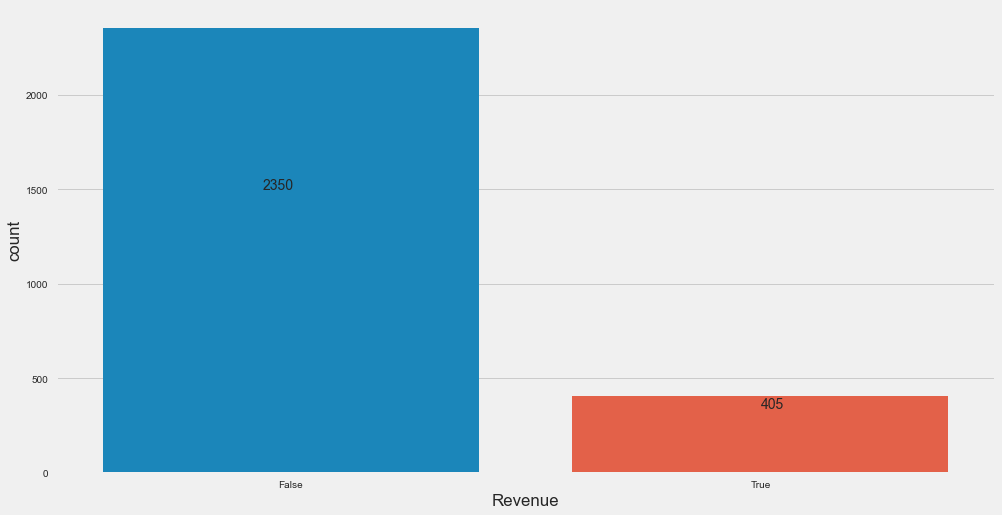

In [290]:
sns.countplot(data=df_2,x='Revenue')
plt.text(x=-0.06,y=1500,s=df_2['Revenue'].value_counts()[0])
plt.text(x=1,y=340,s=df_2['Revenue'].value_counts()[1])
plt.show()

In [ ]:
# We can see that in people are spending lowest  average time in ProductRelated compared to other clusters ie around 858.25
# Here Informational_Duration is overall average is lower as compared to other clusters.
# We can conlude that these people in the cluster are generate more revenue compare to other clusters.

In [266]:
df_3  = df_online_shoppers_intention_final[df_online_shoppers_intention_final['Clusters'] == 2]
df_3.head()

Administrative  Administrative_Duration  Informational  \
3                0                     0.00              0   
4                0                     0.00              0   
7                1                     0.00              0   
14               0                     0.00              0   
21               0                     0.00              0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
3                     0.00               2                     2.67   
4                     0.00              10                   627.50   
7                     0.00               0                     0.00   
14                    0.00               2                    68.00   
21                    0.00               2                     0.00   

    BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
3          0.05       0.14        0.00        0.00   Feb                 3   
4          0.02       0.05        0.00        0.00   Feb                 3   
7          0.20       0.20        0.00        0.00   Feb                 1   
14         0.00       0.10        0.00        0.00   Feb                 3   
21         0.20       0.20        0.00        0.00   Feb                 3   

    Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
3         2       2            4  Returning_Visitor    False    False   
4         3       1            4  Returning_Visitor     True    False   
7         2       1            5  Returning_Visitor     True    False   
14        2       3            3  Returning_Visitor    False    False   
21        3       1            3  Returning_Visitor    False    False   

    Clusters  
3          2  
4          2  
7          2  
14         2  
21         2

In [273]:
df_3.describe().T

count   mean     std  min    25%    50%     75%  \
Administrative          2840.00   2.15    3.28 0.00   0.00   0.00    3.00   
Administrative_Duration 2840.00  84.28  177.29 0.00   0.00   0.00  106.00   
Informational           2840.00   0.50    1.29 0.00   0.00   0.00    0.00   
Informational_Duration  2840.00  30.31  120.40 0.00   0.00   0.00    0.00   
ProductRelated          2840.00  24.32   32.31 0.00   5.00  13.00   30.00   
ProductRelated_Duration 2840.00 895.32 1297.83 0.00 106.38 423.34 1170.87   
BounceRates             2840.00   0.04    0.07 0.00   0.00   0.01    0.04   
ExitRates               2840.00   0.06    0.06 0.00   0.02   0.03    0.07   
PageValues              2840.00   3.73   15.05 0.00   0.00   0.00    0.00   
SpecialDay              2840.00   0.07    0.22 0.00   0.00   0.00    0.00   
OperatingSystems        2840.00   3.08    0.87 1.00   3.00   3.00    3.00   
Browser                 2840.00   2.34    1.70 2.00   2.00   2.00    2.00   
Region                  2840.00   3.24    2.43 1.00   1.00   3.00    4.00   
TrafficType             2840.00   5.57    5.11 1.00   2.00   3.00   10.00   
Clusters                2840.00   2.00    0.00 2.00   2.00   2.00    2.00   

                             max  
Administrative             26.00  
Administrative_Duration  2720.50  
Informational              14.00  
Informational_Duration   2252.03  
ProductRelated            377.00  
ProductRelated_Duration 11729.41  
BounceRates                 0.20  
ExitRates                   0.20  
PageValues                360.95  
SpecialDay                  1.00  
OperatingSystems            8.00  
Browser                    13.00  
Region                      9.00  
TrafficType                20.00  
Clusters                    2.00

In [270]:
df_3.describe(exclude=np.number)

Month        VisitorType Weekend Revenue
count   2840               2840    2840    2840
unique    10                  3       2       2
top      May  Returning_Visitor   False   False
freq     792               2490    2042    2552

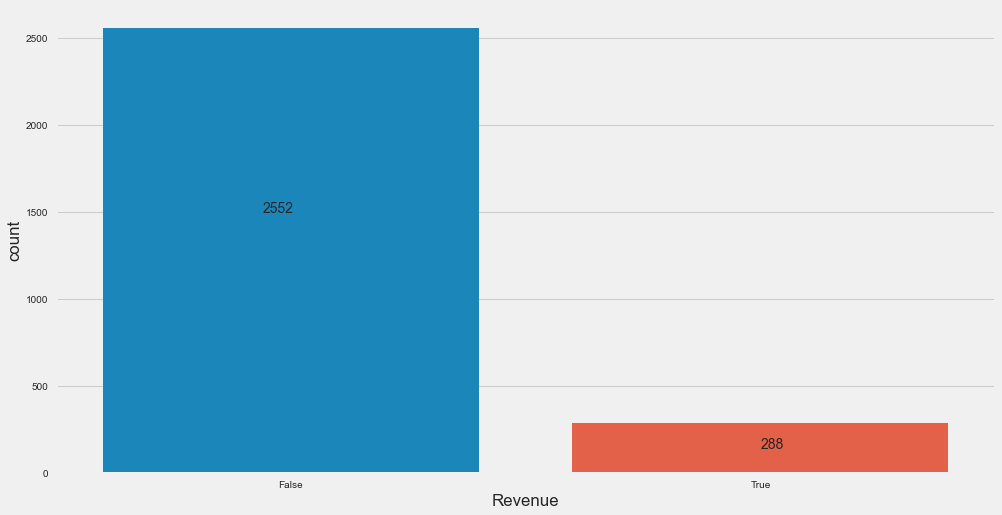

In [298]:
sns.countplot(data=df_3,x='Revenue')
plt.text(x=-0.06,y=1500,s=df_3['Revenue'].value_counts()[0])
plt.text(x=1,y=140,s=df_3['Revenue'].value_counts()[1])
plt.show()

In [ ]:
# We can see that in people are spending lowest average for SpecialDay compared to other clusters ie around 0.07
# Here Bounce rate and exit is overall average is lower as compared to other clusters.
# We can conlude that these people in the cluster have data of people who use the website on special day.